In [1]:
#Importing all the required modules
import numpy as np
import matplotlib.pyplot as plt
import wave
from playsound import playsound as play
%matplotlib inline

In [2]:
#Previously used functions

# This is the algorithm for computing DTFT of given signal
# The parameters for this Algorithm is a signal of shape (2, N) or  (N, )
# it has some default parameters like lower limit, higher limit and Number of points for omega axis

def dtft(signal, low_lim=-1*np.pi, high_lim=np.pi, N=100, endpoints=False):
    w = np.linspace(low_lim, high_lim, N, endpoint=endpoints)                  #Array of omega values
    e_jw = np.exp(w*1j)                                                    #computes e^{jw}
    
    # Creates a dictnationry to store dtft, Magnitude, Phase and omega
    dtft = dict()        
    # Creates a empty array for dtft
    dtft['complex'] = np.zeros(N, dtype=complex) 
    # Assiging omega values 
    dtft['omega'] = w
    
    # The following conditional statements are for checking whether the input(signal) is been provided with 
    # time stamps
    if signal.shape[0] == 2:
        for i in range(signal.shape[1]):
            dtft['complex'] += signal[0, i]*np.power(e_jw, -1*signal[1, i])
    else:
        for i in range(signal.shape[0]):
            dtft['complex'] += signal[i]*np.power(e_jw, -1*i)

    # Rounds-off the result upto 4 decimal places
    dtft['complex'] = np.round(dtft['complex'], decimals=4)
    # Finds the magnitude of the dtft computed above.
    dtft['magnitude'] = np.absolute(dtft['complex'])
    # Finds the phase of dtft in radians which lies in the range[-pi, pi]
    dtft['phase'] = np.angle(dtft['complex'], deg=0)
    return dtft
# This below function flips the w axis 
# Input:- X(e^jw) 
# Output:- X(e^-jw)
def negate_dtft(dtft):
    dtft['complex'] = np.flip(dtft['complex'])
    dtft['magnitude'] = np.absolute(dtft['complex'])
    dtft['phase'] = np.angle(dtft['complex'], deg=0)
    return dtft

# This below function finds the conjugate of dtft.
# Input:- X(e^jw) 
# Output:- X*(e^jw)
def conjugate(dtft):
    dtft['complex'] = np.conj(dtft['complex']) 
    dtft['phase'] = -1*dtft['phase']
    return dtft


# This function is used for plotting Real part, Imaginary part, Magnitude and Phase for a given DTFT

def dtft_plotter(dtft, title=None, complex_part=False):
    plt.rcParams['figure.figsize'] = [10, 4] #Setting the plotting area
    
    if complex_part:                         #For complex signals
        fig, ax = plt.subplots(2,2)

        if title != None:                    #Setting title
            fig.suptitle(title, fontweight="bold")
        #Plotting the real part
        ax[0, 0].title.set_text('Real Part')
        ax[0, 0].stem(dtft['omega'], np.real(dtft['complex']),use_line_collection=True)
        ax[0, 0].set(ylabel='$Re\{X(e^{j \omega})\}$')
        #Plotting the Imaginary part
        ax[0, 1].title.set_text('Imaginary Part')
        ax[0, 1].stem(dtft['omega'], np.imag(dtft['complex']), 'tab:red',use_line_collection=True)
        ax[0, 1].yaxis.tick_right()
        ax[0, 1].set(ylabel='$Im\{X(e^{j \omega})\}$')
        #Plotting the Magnitude of DTFT
        ax[1, 0].title.set_text('Magnitude')
        ax[1, 0].stem(dtft['omega'], dtft['magnitude'], 'tab:orange',use_line_collection=True)
        ax[1, 0].set(xlabel='$\omega$', ylabel='$|X(e^{j \omega})|$')
        #Plotting the Phase of DTFT
        ax[1, 1].title.set_text('Phase')
        ax[1, 1].stem(dtft['omega'], dtft['phase'], 'tab:green',use_line_collection=True)
        ax[1, 1].yaxis.tick_right()        
        ax[1, 1].set(ylabel='$\phi$')
    else:                                   #For Real signal
        #Plotting the Magnitude of DTFT
        fig, (ax1, ax2) = plt.subplots(1, 2)
        if title != None:                    #Setting title
            fig.suptitle(title, fontweight="bold")
        ax1.stem(dtft['omega'],dtft['magnitude'],use_line_collection=True)
        ax1.set(xlabel='$\omega$', ylabel='$X(e^{j \omega})$')
        ax1.title.set_text('Magnitude')
        #Plotting the Phase of DTFT
        ax2.stem(dtft['omega'],dtft['phase'], 'tab:green',use_line_collection=True)
        ax2.plot(xlabel = 'n', ylabel=r'$\phi$')
        ax2.title.set_text('Phase')
        
        
#This below function will take a file as .wav audio file as input and that verbose default parameter which will
#helpful for printing Specifications of audio file such as #frames, framerate, duration, etc.
#Output of this function will return audio signal array, time duration and Number of frames

def wavfile_to_nparray(FILE, verbose=0, time_len=None, normalise=False):
    audio_file = wave.open(FILE, 'rb')             #Opening the .wav file
    params = audio_file.getparams()                #Getting parameters of the audio file
    fr = params[2]
    if time_len != None:
        nframes = int(time_len*fr)
    else:
        nframes = params[3]
    audio_frame = audio_file.readframes(nframes)        #Reading all frames of the audio file 
    audio = np.zeros(nframes)                    #Creating an empty array for storing the values
    
    # Since the frames are3 being stores as bytes format each value will be a size of 1Byte(*bits)
    # Thus we get values ranging from 0 to 255
    # To avoid large values of dtft magnitude so we are normalizing signal from -1 to 1 
    # the audio signal to have better representation in time domain
    
    for i in range(len(audio_frame)):              
        audio[i] = audio_frame[i]                  #Storing the byte value in int array

    duration = nframes/fr                 #Time duration of the signal
    #Normalising the wave amplitude
    if normalise:
        audio = audio/2**7 - 1
    #Printing all the parameters of the wave
    if verbose:
        print('Channels=',params[0], ', SampleWidth=', params[1],'\bbytes' 
              ,', Framerate=', fr, '\bHz', ', Frames=', nframes, '\nDuration:', time_len if time_len else 
              duration, '\bs\n')
    return audio, duration, nframes, fr

#This below function will Plot the Time signal. Computes DTFT and also plots Magnitude and phase

def analyise_wav_file(file, normalise, time_len=None, verbose=0):
    #Reading the wave file, and converting to array
    audio, t, frames, _ = wavfile_to_nparray(file, verbose=verbose, time_len=time_len, normalise=normalise)
    time = np.linspace(0, t, frames)          #Time scale
    
    dtft_audio = dtft(audio, N=100)           #Finding the DTFT of the wave file
    
    plt.rcParams['figure.figsize'] = [20, 4]  #Setting the plotting area
    plt.rc('axes', labelsize=12)              #Setting the labels size
    
    plt.figure()                                            #Plotting Time signal
    plt.title(file, fontsize='large', fontweight='bold')
    plt.plot(time, audio, color='green')

#                                                             #Plotting Magnitude and Phase
    fig, (ax1, ax2) = plt.subplots(1,2)
    plt.suptitle("DTFT of "+file)
    ax1.title.set_text('Magnitude')
    ax1.stem(dtft_audio['omega'], dtft_audio['magnitude'],use_line_collection=True)
    ax1.set(xlabel='$\omega$', ylabel='$|X(e^{j \omega})|$')

    ax2.title.set_text('Phase')
    ax2.set(xlabel='$\omega$', ylabel='$\phi$')
    ax2.stem(dtft_audio['omega'], dtft_audio['phase'], 'tab:red',use_line_collection=True)
#     dtft_plotter(dtft_audio)


#Function for doing convolution
#Method adopted : Shift and Overlap; Moving window-h
def convolve(x, h, plot=True):
    n  =  x.shape[0]#Finding the length of the x input
    m = h.shape[0]#Finding the length of the impulse function
    print("x[n]: ", x)#Input Sequence
    print("h[n]: ", h)#Impulse response
    h = np.flip(h)#Flipping the impulse response
    pads = np.zeros(m-1)#Padding for the input array for calculation purpose
    x =  np.hstack((pads, x, pads))#Padding the input signal at the start and end
    y = np.array([np.dot(x[i:i+m], h) for i in range(n+m-1)])#Summing the overlapped region

    print("y[n] = x[n]*h[n]: ", y)#Output sequence
    #Plot
    if plot:
        l = 15 #Range of plot
        n = np.linspace(-1*l, l, 2*l+1)#n-x-axis
        x = np.hstack((np.zeros(l), x, np.zeros(l+1-x.shape[0])))#input sequence with padded zeros
        h = np.hstack((np.zeros(l), h, np.zeros(l+1-h.shape[0])))#Impulse sequence with padded zeros
        y = np.hstack((np.zeros(l), y, np.zeros(l+1-y.shape[0])))#output sequence with padded zeros

        plt.rcParams['figure.figsize'] = [10, 4]#Setting the plot area
        plt.rc('axes', labelsize=12)#Setting the label siz
        #Plot of Input sequence
        fig, (ax1,ax2) = plt.subplots(1, 2)
        ax1.stem(n, x,use_line_collection=True)
        #Plot of impulse response
        ax1.set(xlabel='n', ylabel='x[n]')
        ax2.stem(n, h,use_line_collection=True)
        ax2.set(xlabel='n', ylabel='h[n]')
        #Plot of output sequence
        plt.figure()
        plt.stem(n, y,use_line_collection=True)
        plt.xlabel('n')
        plt.ylabel('y[n]')
    
    return y

#Function which convolves the data from a wave file and creates a new wave file with
#data resulting from the convolution of original signals data and given impulse response
def audio_convolve(i, h, normalisation, o, time_len=None):
    #Reading and extracting data from the original signal  
    x, t, nframes, fr = wavfile_to_nparray(i, time_len=time_len, normalise=normalisation)    
    #Creating the newfile
    y_file = o
    y_filep = wave.open(y_file, 'wb')
    #Setting the wave file parameters
    y_filep.setnchannels(1)
    y_filep.setsampwidth(1)
    y_filep.setframerate(fr)
    #Finding the convolution data 
    y = convolve(x, h, plot=False)
    #Normalising the data 
    if normalisation:
        y = np.clip(y, -1, 1)
        y = (y+1)*(2**7)
    else:
        y = np.clip(y, 0, 255)
    #Converting the byte code to nparray
    y = y.astype(np.uint8)
    y = y.tobytes()
    y_filep.writeframesraw(y)#Writing the new framesdata
    y_filep.close()#Closing the wave file

    return y_file

In [3]:
#Function for plotting the impulse responses

def impulse_plot(n,h):
    H = dtft(h)                               #Finding the DTFT of the impulse response
    #For plotting the impulse response
    plt.rcParams['figure.figsize'] = [20, 4]  #Setting the plotting area
    plt.rc('axes', labelsize=12)              #Setting the labels size
    plt.figure()                                            #Plotting Time signal
    plt.title('Impulse Response', fontsize='large', fontweight='bold')
    plt.stem(n,h,use_line_collection=True)
    plt.xlabel('n')
    plt.ylabel('h[n]')

#                                                             #Plotting Magnitude and Phase
    fig, (ax1, ax2) = plt.subplots(1,2)
    plt.suptitle("DTFT of h[n]")
    ax1.title.set_text('Magnitude')
    ax1.stem(H['omega'], H['magnitude'],use_line_collection=True)
    ax1.set(xlabel='$\omega$', ylabel='$|H(e^{j \omega})|$')

    ax2.title.set_text('Phase')
    ax2.set(xlabel='$\omega$', ylabel='$\phi$')
    ax2.stem(H['omega'], H['phase'], 'tab:red',use_line_collection=True)
    

x[n]:  [1 1 1 1 1 0 0 0 0 0]
h[n]:  [1 0 0]
y[n] = x[n]*h[n]:  [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
The property is true for magnitudes, |Y|=|H||X|
The property is true for phase, phase(Y)=phase(H)+phase(X)


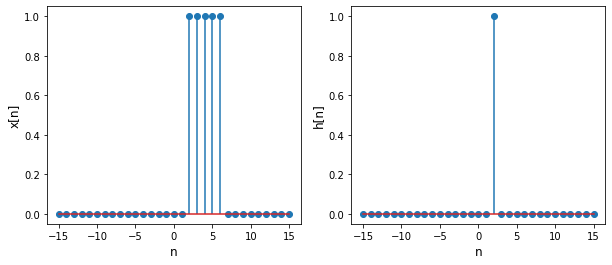

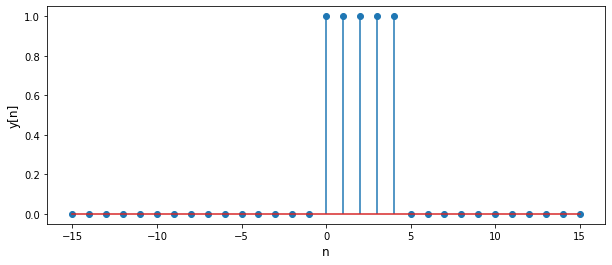

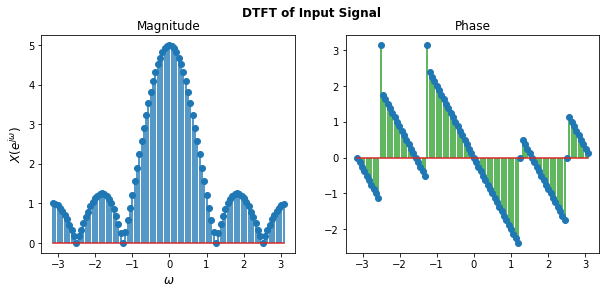

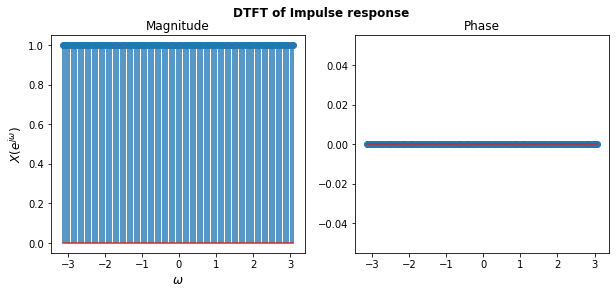

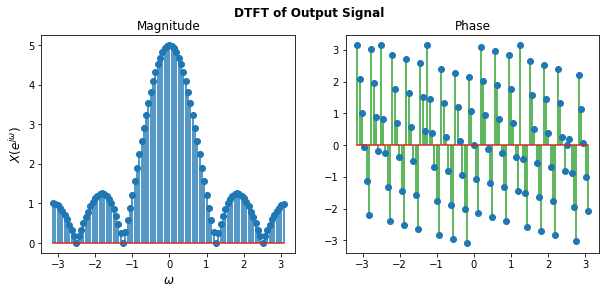

In [4]:
#Problem-1: Verify experimentally that if y[n] = x[n] ∗ h[n], then Y(e^jω) = X(e^jω)H(e^jω). 
#Choose appropriate x[n], h[n] to demonstrate this result.

# x[n] = (
# 1; 0 ≤ n ≤ 5
# 0; else)
x = np.array([1,1,1,1,1,0,0,0,0,0])#Input Signal
# h[n] = δ[n]
h = np.array([1, 0, 0])#Impulse Response
#Finding the convoluted signal
y = convolve(x,h)
#Finding DTFT
X = dtft(x)
dtft_plotter(X,title='DTFT of Input Signal')
H = dtft(h)
dtft_plotter(H,title='DTFT of Impulse response')
Y = dtft(y)
dtft_plotter(Y,title='DTFT of Output Signal ')
#Finding the equality 
Hv = H['magnitude']*X['magnitude']
Pv = X['phase']+H['phase']
#Check for MAGNITUES
if Y['magnitude'].all()==Hv.all():
    print('The property is true for magnitudes, |Y|=|H||X|')
else: 
    print('The property is false for magnitudes,|Y|!=|H||X| ')
#Check for PHASE
if Y['magnitude'].all()==Hv.all():
    print('The property is true for phase, phase(Y)=phase(H)+phase(X)')
else: 
    print('The property is false for phase, phase(Y)!=phase(H)+phase(X)')

OBSERVATIONS :- 
1 : The Magnitude is one over all frequency(w) and hence when convolved with a signal, the output magnitude spectrum would resemble to that of input. 
2 : The Phase of the impulse response is also 0, hence when convolved, the phase spectrum of input and output remain same.


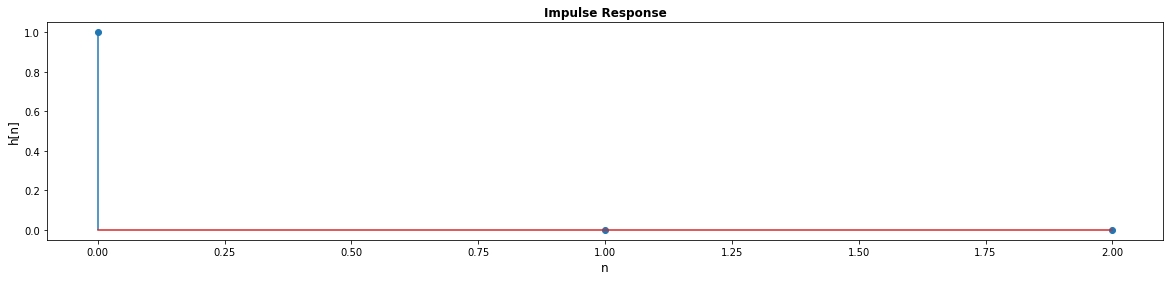

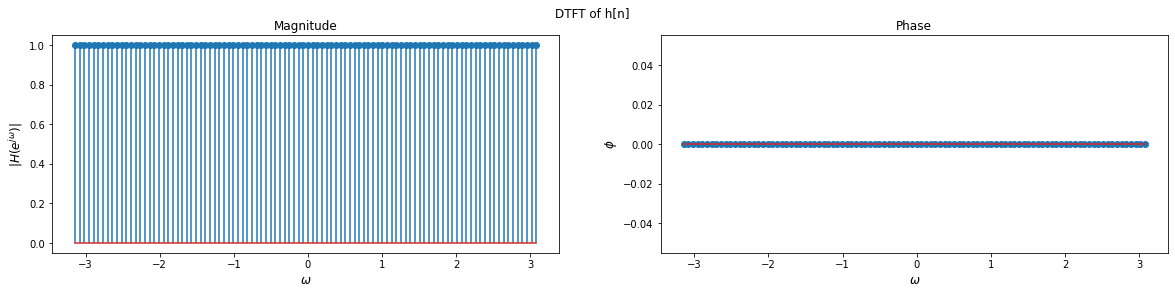

In [5]:
#PROBLEM-2 : Plotting of Impulse Responses

# ha = h[n] = δ[n]
ha = np.array([1,0,0]) 
na = [i for i in range(len(ha))]            #Time scale
impulse_plot(na,ha)
print('OBSERVATIONS :- ')
print('1 : The Magnitude is one over all frequency(w) and hence when convolved with a signal, the output magnitude spectrum would resemble to that of input. ')
print('2 : The Phase of the impulse response is also 0, hence when convolved, the phase spectrum of input and output remain same.')

OBSERVATIONS :- 
1 : The magnitude is sin(w/2), zero at w=0 and climbs up to 1 |w|=pi, acting like approximate high pass filter. 
2 : The phase is linear when w>0 or w<0, at w=0, phase is 0; w>0 it is pi-w/2; w<0 it is -pi-w/2, hence when convolved the output will have different phase from input.


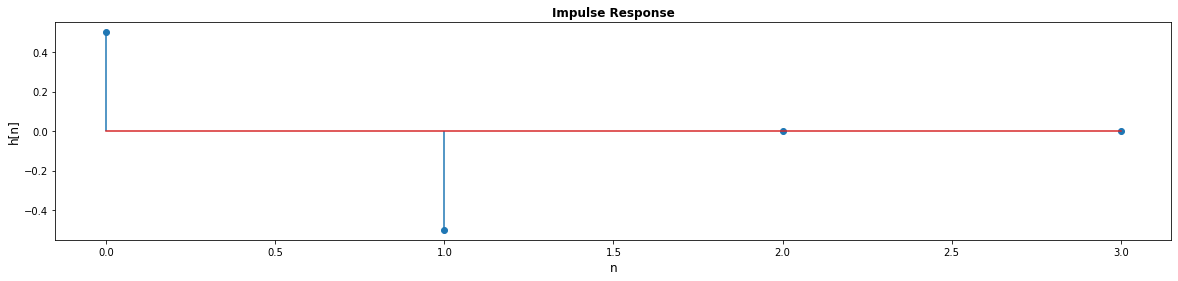

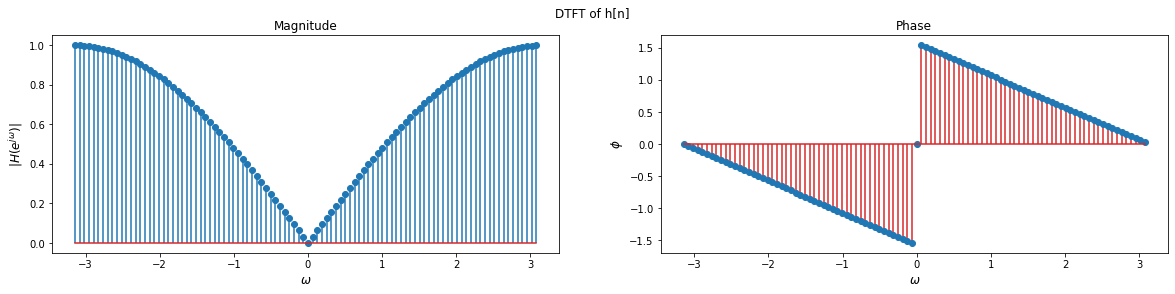

In [6]:
#h[n] = 0.5δ[n] − 0.5δ[n − 1]
hb = np.array([0.5,-0.5,0,0])
nb = [i for i in range(len(hb))]            #Time scale
impulse_plot(nb,hb)
print('OBSERVATIONS :- ')
print('1 : The magnitude is sin(w/2), zero at w=0 and climbs up to 1 |w|=pi, acting like approximate high pass filter. ')
print('2 : The phase is linear when w>0 or w<0, at w=0, phase is 0; w>0 it is pi-w/2; w<0 it is -pi-w/2, hence when convolved the output will have different phase from input.')

OBSERVATIONS :- 
1 : The magnitude is cos(w/2), symmetric(even) over w with max 1 at w=0, acting like approximate low pass filter. 
2 : The phase is linear, variating as -w/2, hence when convolved the output will have different phase from input.


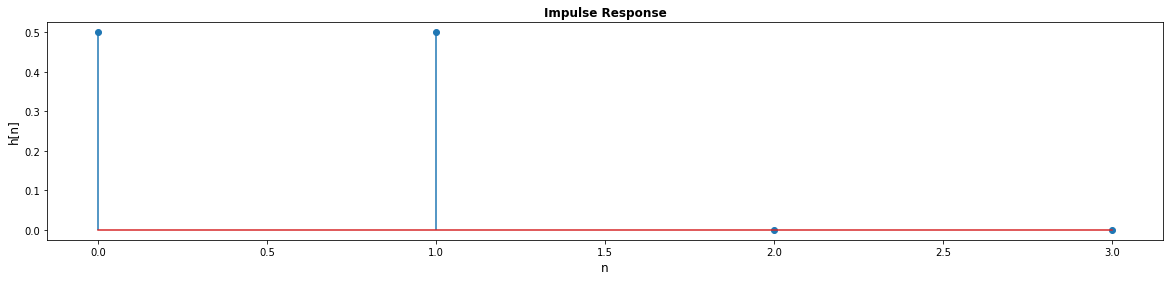

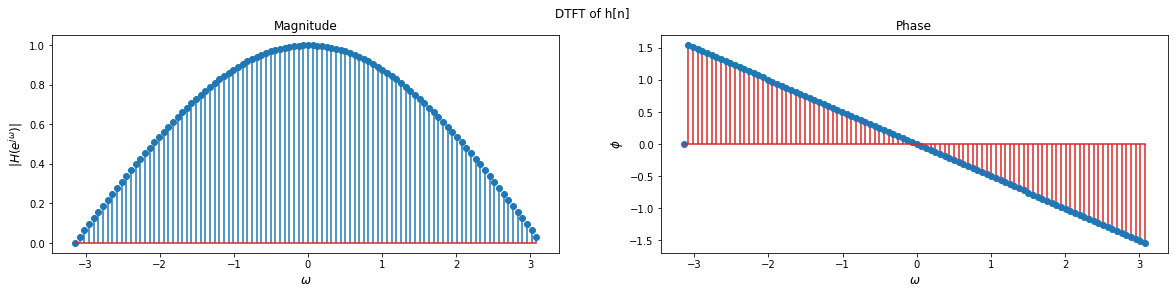

In [7]:
#h[n] = 0.5δ[n] + 0.5δ[n − 1]
hc = np.array([0.5,0.5,0,0]) 
nc = [i for i in range(len(hc))]            #Time scale
impulse_plot(nc,hc)
print('OBSERVATIONS :- ')
print('1 : The magnitude is cos(w/2), symmetric(even) over w with max 1 at w=0, acting like approximate low pass filter. ')
print('2 : The phase is linear, variating as -w/2, hence when convolved the output will have different phase from input.')

OBSERVATIONS :- 
1 : The magnitude behaviour of this system is similar to the earlier impulse response but with some additional sidebands whose amplitude is less than the central band.
2 : The magnitude is symmetric(even) over w with global max 1 at w=0 and local maxima at -pi and +pi, acting like approximate band stop filter. 
3 : The phase is linear in different ranges:[-2pi/3,2pi/3],[2pi/3,pi],[-pi,-2pi/3], hence when convolved the output will have different phase from input.


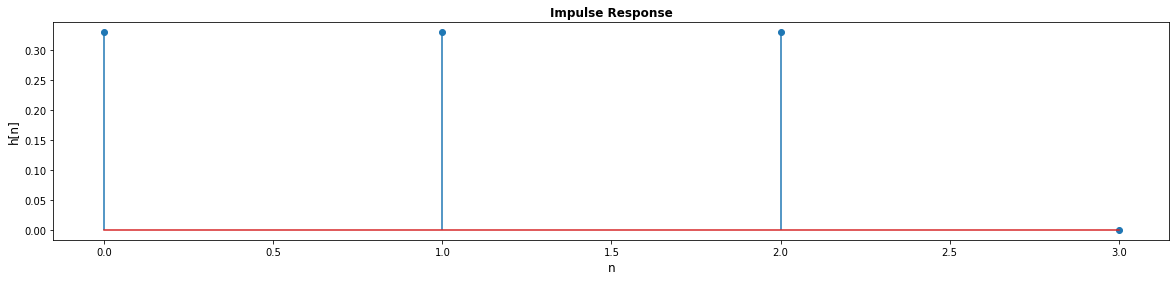

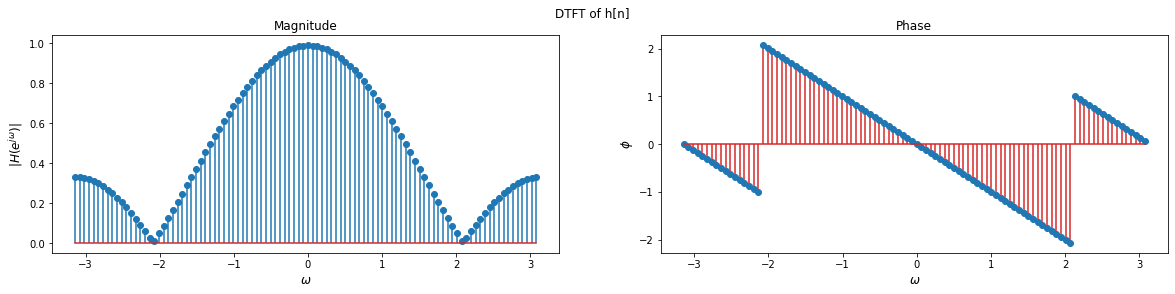

In [8]:
#h[n] = 0.33δ[n] + 0.33δ[n − 1] + 0.33δ[n − 2]
hd = np.array([0.33,0.33,0.33,0]) 
nd = [i for i in range(len(hd))]            #Time scale
impulse_plot(nd,hd)
print('OBSERVATIONS :- ')
print('1 : The magnitude behaviour of this system is similar to the earlier impulse response but with some additional sidebands whose amplitude is less than the central band.')
print('2 : The magnitude is symmetric(even) over w with global max 1 at w=0 and local maxima at -pi and +pi, acting like approximate band stop filter. ')
print('3 : The phase is linear in different ranges:[-2pi/3,2pi/3],[2pi/3,pi],[-pi,-2pi/3], hence when convolved the output will have different phase from input.')

OBSERVATIONS :- 
1 : The magnitude behaviour of this system is similar to the impulse response observed in (a) but has much smoother as it varies as sin^2(w/2).
2 : This could act as better highpass filter than (a) as the magnitude here for lower frequencies is even lower.
3 : The Phase variation is also linear and varies as -w, hence the higher frequency higher the phase shift.


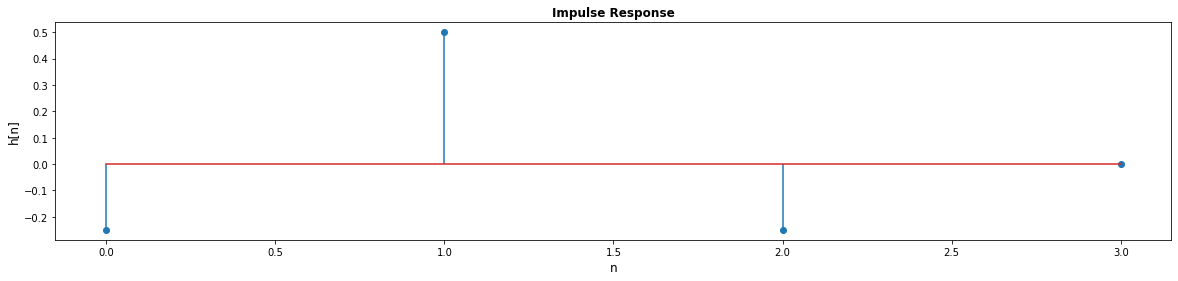

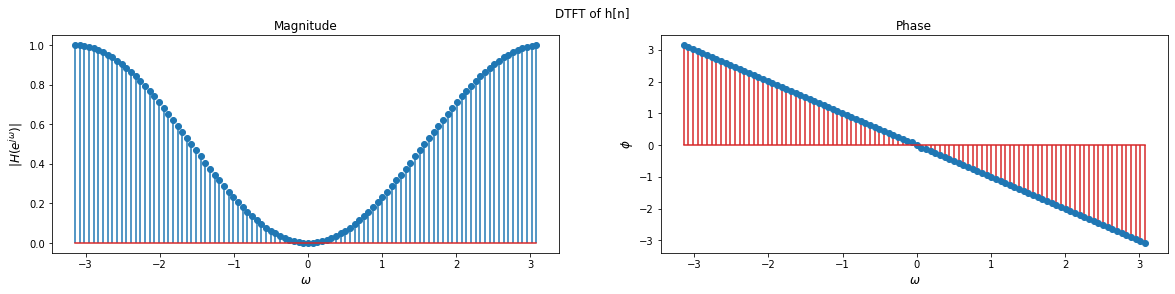

In [9]:
#h[n] = −0.25δ[n] + 0.50δ[n − 1] − 0.25δ[n − 2]
he = np.array([-0.25,0.5,-0.25,0]) 
ne = [i for i in range(len(he))]            #Time scale
impulse_plot(ne,he)
print('OBSERVATIONS :- ')
print('1 : The magnitude behaviour of this system is similar to the impulse response observed in (a) but has much smoother as it varies as sin^2(w/2).')
print('2 : This could act as better highpass filter than (a) as the magnitude here for lower frequencies is even lower.')
print('3 : The Phase variation is also linear and varies as -w, hence the higher frequency higher the phase shift.')

OBSERVATIONS :- 
1 : The magnitude of the impulse response has even more side bands to that of (d) and is an even function of w
2 : The peak of the magnitude of the central band is 6(w=0) and other side band amplitudes are around 1-2 
3 : This system can be used for amplification of low frequency component of a signal.
4 : The phase of the impulse response is non-linear, odd function of w.
5 : There will be a phase shift for output depending on the frequency component it has.


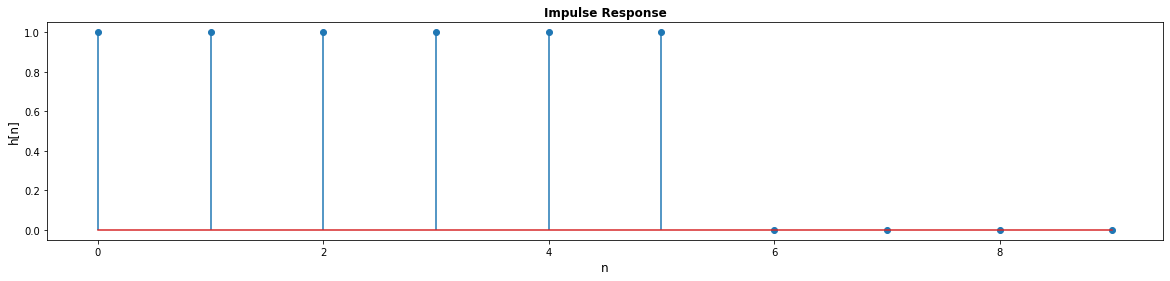

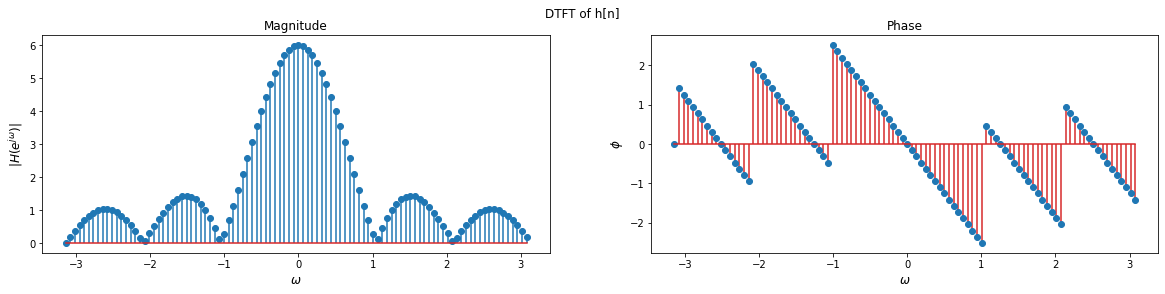

In [10]:
# h[n] = (
# 1; 0 ≤ n ≤ 5
# 0; else
# )
hf = np.array([1,1,1,1,1,1,0,0,0,0]) 
nf = [i for i in range(len(hf))]            #Time scale
impulse_plot(nf,hf)
print('OBSERVATIONS :- ')
print('1 : The magnitude of the impulse response has even more side bands to that of (d) and is an even function of w')
print('2 : The peak of the magnitude of the central band is 6(w=0) and other side band amplitudes are around 1-2 ')
print('3 : This system can be used for amplification of low frequency component of a signal.')
print('4 : The phase of the impulse response is non-linear, odd function of w.')
print('5 : There will be a phase shift for output depending on the frequency component it has.')


OBSERVATIONS :- 
1 : The magnitude of the impulse response similar to above one, but much amplified and is an even function of w
2 : The peak of the magnitude of the central band is 15(w=0) and other side band amplitudes are around 2-4 
3 : This system can be used for amplification of low frequency component of a signal and as the other frequencies are also amplified, the system in (f) could be better .
4 : The phase of the impulse response is non-linear, odd function of w, but is much uniform than hf.
5 : There will be a phase shift for output depending on the frequency component it has.


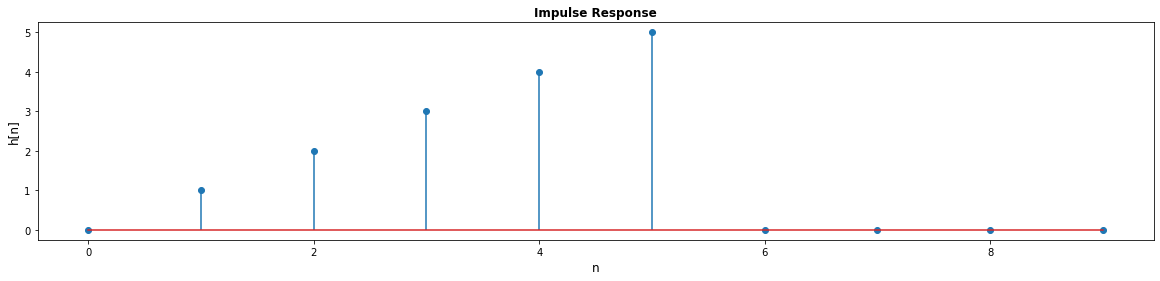

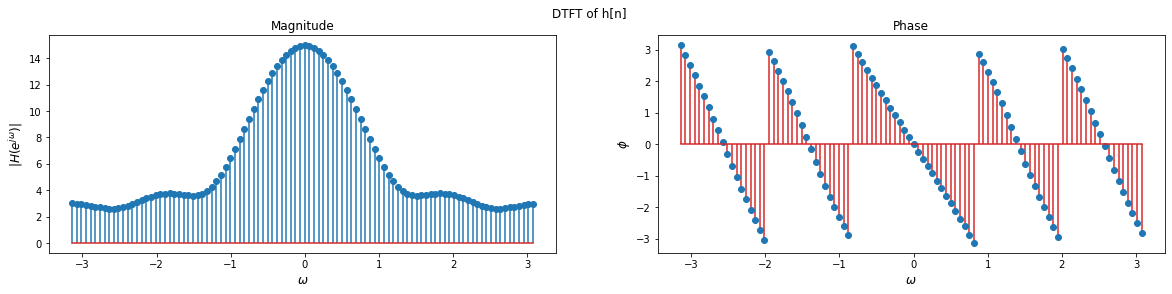

In [11]:
# h[n] = (
# n; 0 ≤ n ≤ 5
# 0; else
# )
hg = np.array([0,1,2,3,4,5,0,0,0,0]) 
ng = [i for i in range(len(hg))]            #Time scale
impulse_plot(ng,hg)
print('OBSERVATIONS :- ')
print('1 : The magnitude of the impulse response similar to above one, but much amplified and is an even function of w')
print('2 : The peak of the magnitude of the central band is 15(w=0) and other side band amplitudes are around 2-4 ')
print('3 : This system can be used for amplification of low frequency component of a signal and as the other frequencies are also amplified, the system in (f) could be better .')
print('4 : The phase of the impulse response is non-linear, odd function of w, but is much uniform than hf.')
print('5 : There will be a phase shift for output depending on the frequency component it has.')

OBSERVATIONS :- 
1 : The magnitude of the impulse response similar to above ones, but much amplified and is an even function of w
2 : The peak of the magnitude of the central band is 6(w=0) and other side band amplitudes are around 1-2 
3 : This system can be used for amplification of low frequency component of a signal and as all the other frequencies are not amplified much, this system is best suited .
4 : The phase of the impulse response is non-linear, odd function of w, similar to hg.
5 : There will be a phase shift for output depending on the frequency component it has.


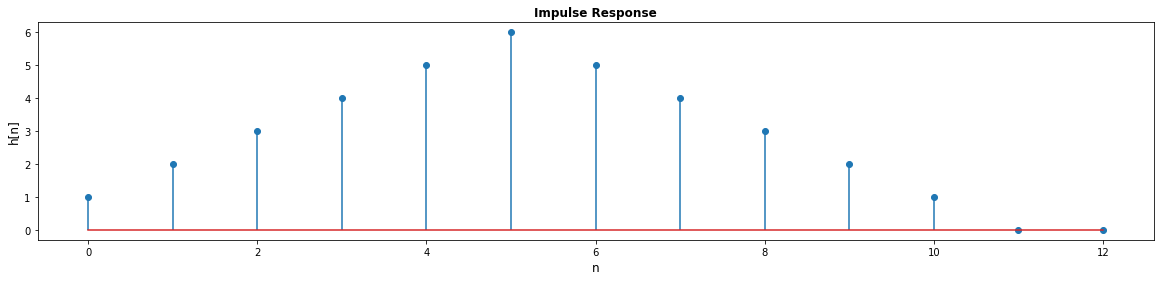

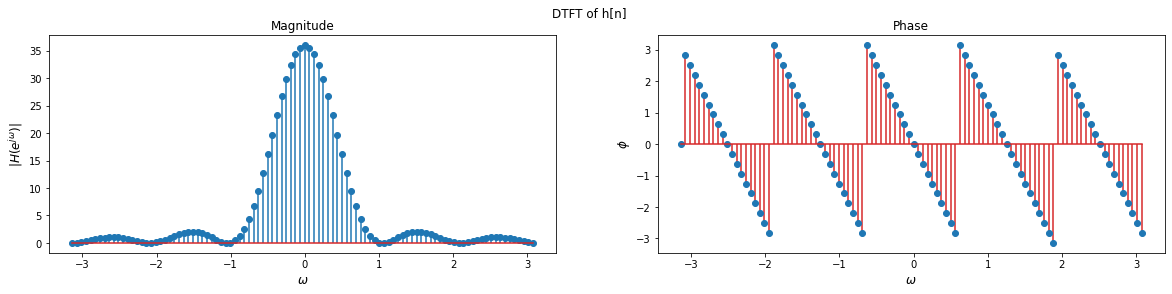

In [12]:
#h[n] = n + 1; 0 ≤ n ≤ 5; h[n] = h[10 − n]; 5 < n ≤ 10; h[n] = 0; for all other n
hh = np.zeros([13])
for i in range(13):
    if i<=5:
        hh[i]=i+1
    elif i<=10:
        hh[i]=hh[10-i]
    else:
        hh[i]=0
nh = [i for i in range(len(hh))]            #Time scale
impulse_plot(nh,hh)
print('OBSERVATIONS :- ')
print('1 : The magnitude of the impulse response similar to above ones, but much amplified and is an even function of w')
print('2 : The peak of the magnitude of the central band is 6(w=0) and other side band amplitudes are around 1-2 ')
print('3 : This system can be used for amplification of low frequency component of a signal and as all the other frequencies are not amplified much, this system is best suited .')
print('4 : The phase of the impulse response is non-linear, odd function of w, similar to hg.')
print('5 : There will be a phase shift for output depending on the frequency component it has.')

OBSERVATIONS :- 
1 : In magnitude spectrum, there are two major spikes around pi and -pi with max magnitude 13, multiple ripples in between with smaller magnitudes. 
2 : The magnitude spectrum is even function of w, and can used for extracting particular high frequency component.
3 : The Phase spectrum is odd function of w, non linear and output would have phase shift accordingly.


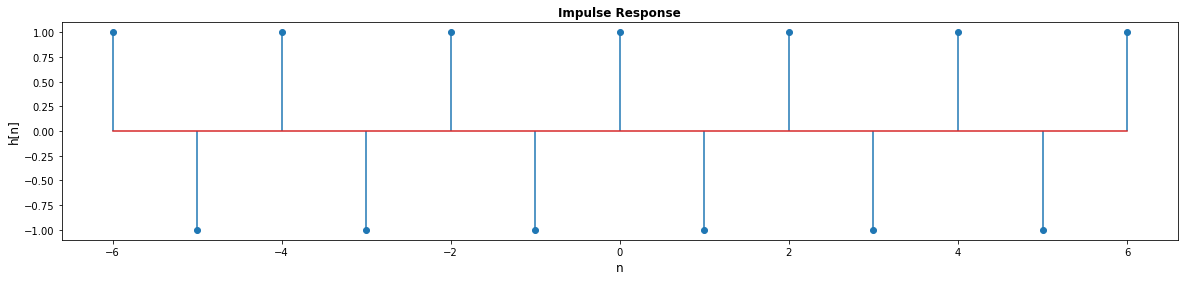

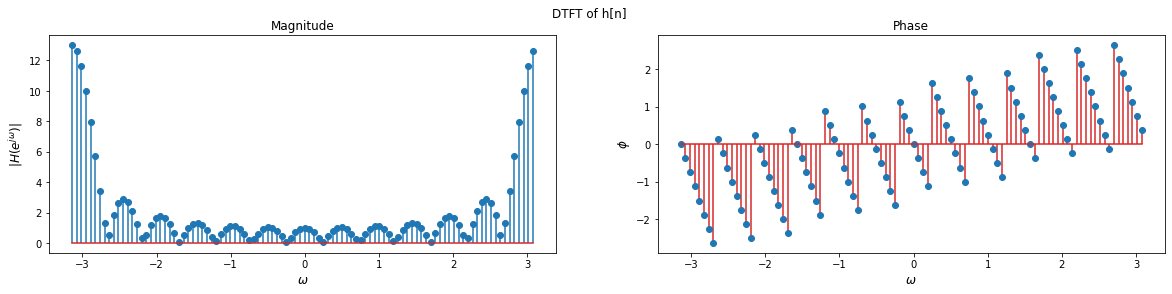

In [13]:
#h[n] = cos(πn); −N ≤ n ≤ N. Experiment with three different values of N of your choice.
N1 = 6
ni1 = np.arange(-N1,N1+1)
hi1 = np.cos(np.pi*ni1)
impulse_plot(ni1,hi1)
print('OBSERVATIONS :- ')
print('1 : In magnitude spectrum, there are two major spikes around pi and -pi with max magnitude 13, multiple ripples in between with smaller magnitudes. ')
print('2 : The magnitude spectrum is even function of w, and can used for extracting particular high frequency component.')
print('3 : The Phase spectrum is odd function of w, non linear and output would have phase shift accordingly.')

OBSERVATIONS :- 
1 : In magnitude spectrum, there are two major spikes around pi and -pi with max magnitude 26, multiple ripples in between with smaller magnitudes. 
2 : The magnitude spectrum is even function of w, and can used for extracting particular high frequency component.
3 : This response has finer spectrum to that compared to previous one, with in between ripples having very low magnitude and having sharp impulses at ends.
4 : The Phase spectrum is odd function of w, non linear and output would have phase shift accordingly.


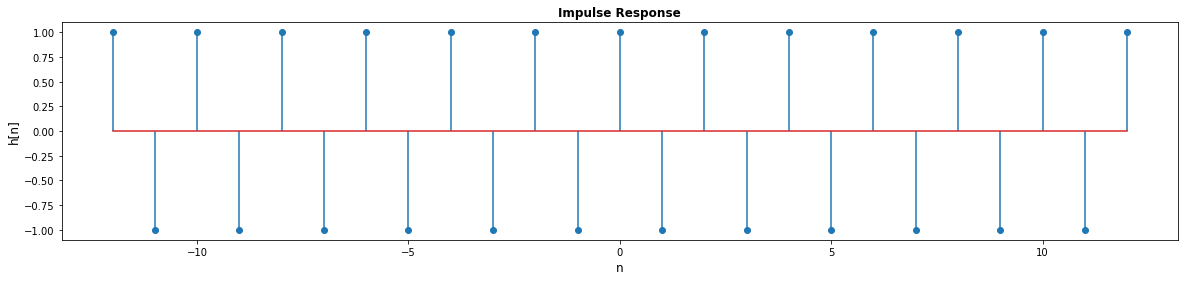

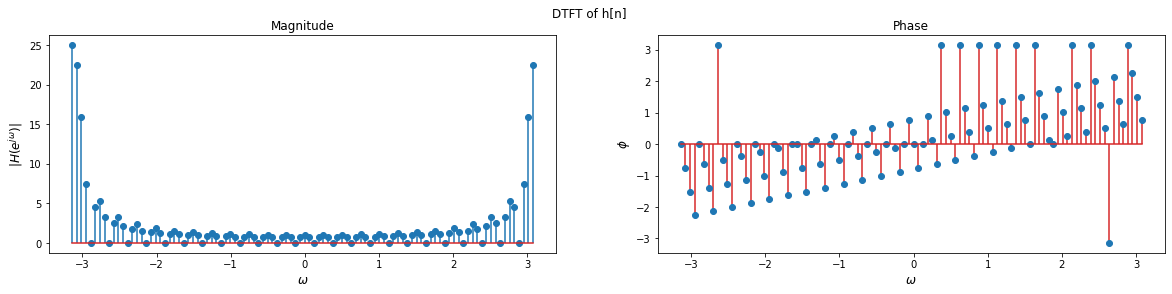

In [14]:
N2 = 12
ni2 = np.arange(-N2,N2+1)
hi2 = np.cos(np.pi*ni2)
impulse_plot(ni2,hi2)
print('OBSERVATIONS :- ')
print('1 : In magnitude spectrum, there are two major spikes around pi and -pi with max magnitude 26, multiple ripples in between with smaller magnitudes. ')
print('2 : The magnitude spectrum is even function of w, and can used for extracting particular high frequency component.')
print('3 : This response has finer spectrum to that compared to previous one, with in between ripples having very low magnitude and having sharp impulses at ends.')
print('4 : The Phase spectrum is odd function of w, non linear and output would have phase shift accordingly.')

OBSERVATIONS :- 
1 : In magnitude spectrum, there are two major spikes around pi and -pi with max magnitude 26, multiple ripples in between with smaller magnitudes. 
2 : The magnitude spectrum is even function of w, and can used for extracting particular high frequency component.
3 : This response has finer spectrum to that compared to previous one, with in between ripples having very low magnitude and having sharp impulses at ends. Hence more number of data points of cosine, the sharper the impulses would be at pi,-pi
4 : The Phase spectrum is odd function of w, non linear and output would have phase shift accordingly.


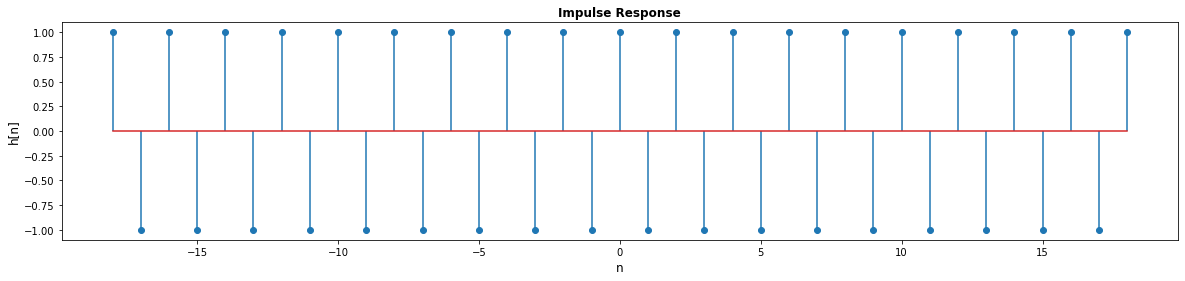

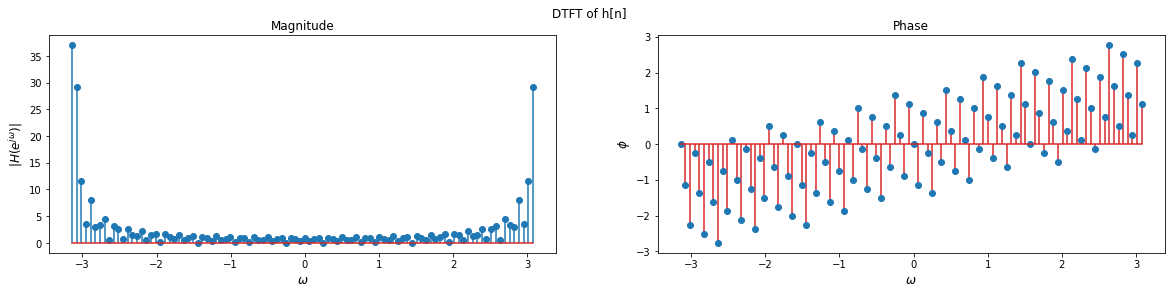

In [15]:
N3 = 18
ni3 = np.arange(-N3,N3+1)
hi3 = np.cos(np.pi*ni3)
impulse_plot(ni3,hi3)
print('OBSERVATIONS :- ')
print('1 : In magnitude spectrum, there are two major spikes around pi and -pi with max magnitude 26, multiple ripples in between with smaller magnitudes. ')
print('2 : The magnitude spectrum is even function of w, and can used for extracting particular high frequency component.')
print('3 : This response has finer spectrum to that compared to previous one, with in between ripples having very low magnitude and having sharp impulses at ends. Hence more number of data points of cosine, the sharper the impulses would be at pi,-pi')
print('4 : The Phase spectrum is odd function of w, non linear and output would have phase shift accordingly.')

OBSERVATIONS :- 
1 : We can observe that the h[n] has few larger spikes greater than zero.
2 : In magnitude spectrum, there is a central band of frequencies with higher magnitude and other frequencies with lower but non-zero magnitude. 
3 : The magnitude spectrum is even function of w with similar shape of PI function, and can used as a low pass filter
4 : The Phase spectrum is odd function of w, non linear and output would have phase shift accordingly.


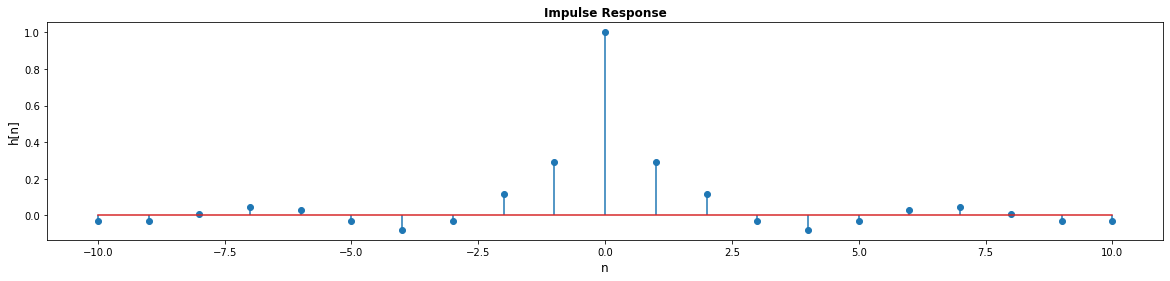

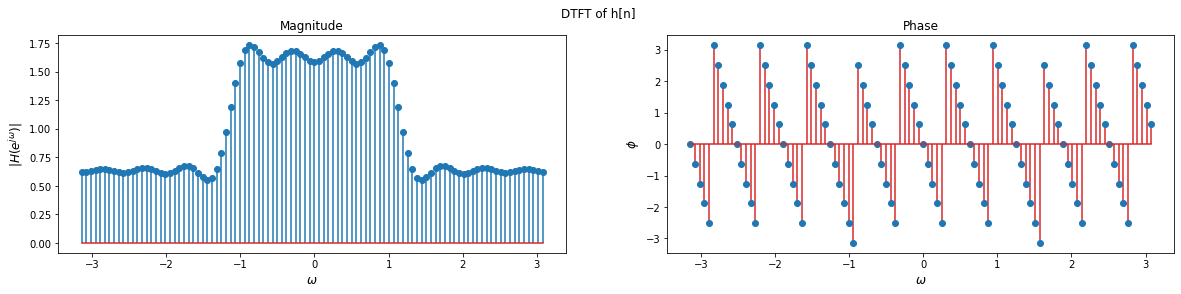

In [16]:
#h[n] = sin(ω0n)/πn ; −M ≤ n ≤ M. Ensure that h[0] = 1. Experiment with two different values each of ω0, M.
w1 = 20
w2 = 50
M1 = 10
M2 = 25
#w=20,M=10
hj1 = np.zeros([2*(M1)+1])
nj1 = np.arange(-M1,M1+1)
for i in range(2*M1+1):
    if nj1[i] == 0:
        hj1[i]=1
    elif nj1[i]>=-M1 and nj1[i]<=M1:
        hj1[i]= np.sin(w1*nj1[i])/(np.pi*nj1[i])
    else:
        hj1[i]=0

impulse_plot(nj1,hj1)
print('OBSERVATIONS :- ')
print('1 : We can observe that the h[n] has few larger spikes greater than zero.')
print('2 : In magnitude spectrum, there is a central band of frequencies with higher magnitude and other frequencies with lower but non-zero magnitude. ')
print('3 : The magnitude spectrum is even function of w with similar shape of PI function, and can used as a low pass filter')
print('4 : The Phase spectrum is odd function of w, non linear and output would have phase shift accordingly.')

OBSERVATIONS :- 
1 : We can observe that the h[n] has few larger spikes greater than zero.
2 : In magnitude spectrum, there is a central band of frequencies with higher magnitude and other frequencies with lower but non-zero magnitude. 
3 : The magnitude spectrum is even function of w with similar shape of PI function, and can used as a low pass filter
4 : The magnitude spectrum here has much better sharper boundary than earlier impulse response. So more the number of data points for a given w,finer will be the rectangle in magnitude spectrum. 
5 : The Phase spectrum is odd function of w, non linear and output would have phase shift accordingly.


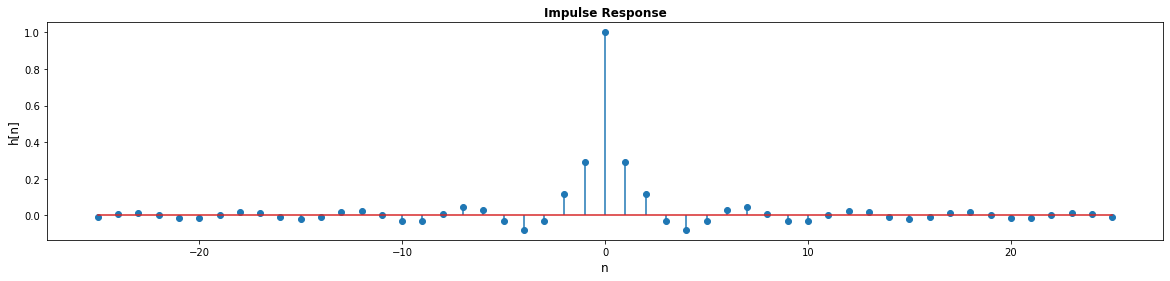

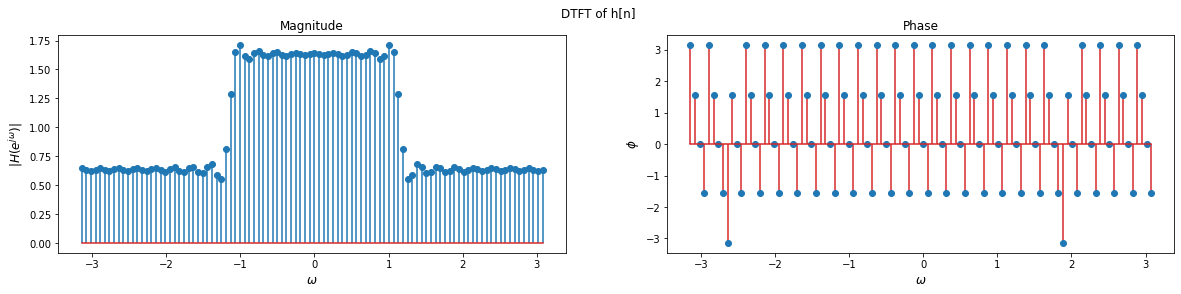

In [17]:
#w=20,M=25
hj2 = np.zeros([2*(M2)+1])
nj2 = np.arange(-M2,M2+1)
for i in range(2*M2+1):
    if nj2[i] == 0:
        hj2[i]=1
    elif nj2[i]>=-M2 and nj2[i]<=M2:
        hj2[i]= np.sin(w1*nj2[i])/(np.pi*nj2[i])
    else:
        hj2[i]=0

impulse_plot(nj2,hj2)
print('OBSERVATIONS :- ')
print('1 : We can observe that the h[n] has few larger spikes greater than zero.')
print('2 : In magnitude spectrum, there is a central band of frequencies with higher magnitude and other frequencies with lower but non-zero magnitude. ')
print('3 : The magnitude spectrum is even function of w with similar shape of PI function, and can used as a low pass filter')
print('4 : The magnitude spectrum here has much better sharper boundary than earlier impulse response. So more the number of data points for a given w,finer will be the rectangle in magnitude spectrum. ')
print('5 : The Phase spectrum is odd function of w, non linear and output would have phase shift accordingly.')

OBSERVATIONS :- 
1 : With higher w, the sinc gets to its first zero for lesser n, as we observe only one positive spike and rest all negative spikes in h[n] .
2 : The magnitude spectrum has around zero magnitude at lower frequencies and higher magnitude for higher frequencies.
3 : The system acts like a High pass filter but with blunt boundary and has smaller variation even in higher frequencies.
4 : Hence sinc with larger w can be used as high pass filter whereas with lower w can be used as low pass filter. It all depends on the number of positive spikes we have in the central region of sinc.
5 : The Phase spectrum is odd function of w, non linear and output would have phase shift accordingly.


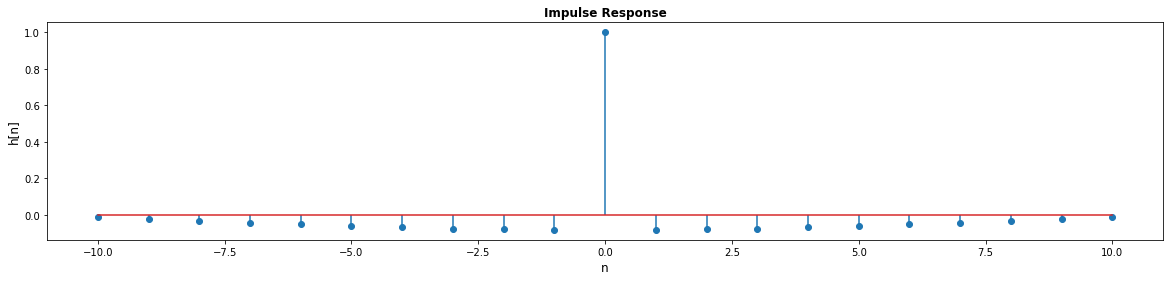

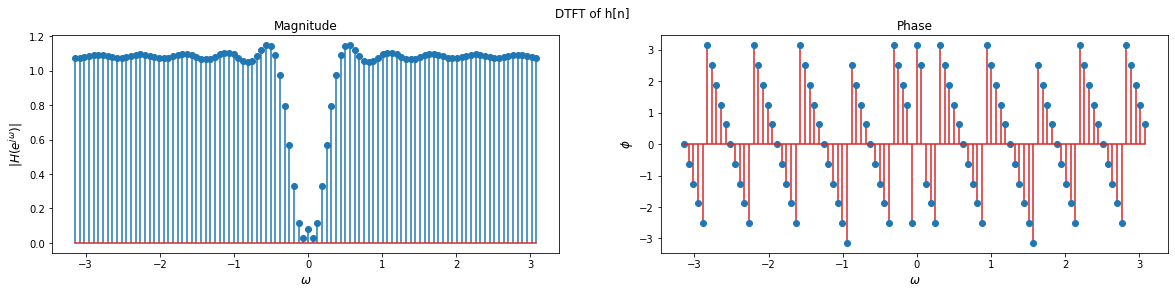

In [18]:
#w=50,M=10
hj4 = np.zeros([2*(M1)+1])
nj4 = np.arange(-M1,M1+1)
for i in range(2*M1+1):
    if nj4[i] == 0:
        hj4[i]=1
    elif nj4[i]>=-M1 and nj4[i]<=M1:
        hj4[i]= np.sin(w2*nj4[i])/(np.pi*nj4[i])
    else:
        hj4[i]=0

impulse_plot(nj4,hj4)
print('OBSERVATIONS :- ')
print('1 : With higher w, the sinc gets to its first zero for lesser n, as we observe only one positive spike and rest all negative spikes in h[n] .')
print('2 : The magnitude spectrum has around zero magnitude at lower frequencies and higher magnitude for higher frequencies.')
print('3 : The system acts like a High pass filter but with blunt boundary and has smaller variation even in higher frequencies.')
print('4 : Hence sinc with larger w can be used as high pass filter whereas with lower w can be used as low pass filter. It all depends on the number of positive spikes we have in the central region of sinc.')
print('5 : The Phase spectrum is odd function of w, non linear and output would have phase shift accordingly.')

OBSERVATIONS :- 
1 : With higher w, the sinc gets to its first zero for lesser n, as we observe only one positive spike and rest all negative spikes in h[n] .
2 : The magnitude spectrum has around zero magnitude at lower frequencies and higher magnitude for higher frequencies.
3 : The system acts like a better High pass filter but with sharper boundary and has almost fixed magnitude for higher frequencies.
4 : Hence with larger number datapoints, we can get finer filter.
5 : The Phase spectrum is odd function of w, non linear and output would have phase shift accordingly.


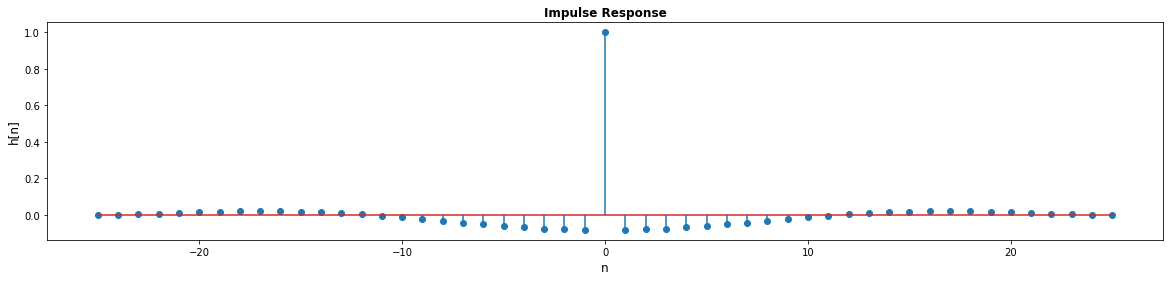

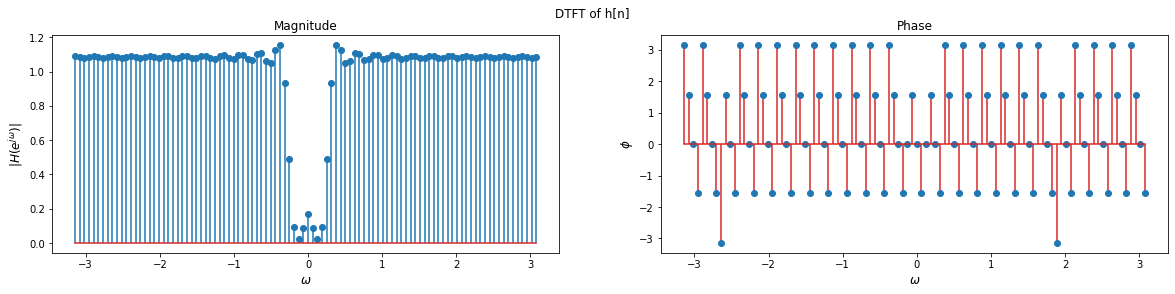

In [19]:
#w=50,M=25
hj3 = np.zeros([2*(M2)+1])
nj3 = np.arange(-M2,M2+1)
for i in range(2*M2+1):
    if nj3[i] == 0:
        hj3[i]=1
    elif nj3[i]>=-M2 and nj3[i]<=M2:
        hj3[i]= np.sin(w2*nj3[i])/(np.pi*nj3[i])
    else:
        hj3[i]=0
impulse_plot(nj3,hj3)
print('OBSERVATIONS :- ')
print('1 : With higher w, the sinc gets to its first zero for lesser n, as we observe only one positive spike and rest all negative spikes in h[n] .')
print('2 : The magnitude spectrum has around zero magnitude at lower frequencies and higher magnitude for higher frequencies.')
print('3 : The system acts like a better High pass filter but with sharper boundary and has almost fixed magnitude for higher frequencies.')
print('4 : Hence with larger number datapoints, we can get finer filter.')
print('5 : The Phase spectrum is odd function of w, non linear and output would have phase shift accordingly.')

x[n]:  [-0.0078125 -0.0078125 -0.0078125 ... -0.0078125 -0.0078125 -0.0078125]
h[n]:  [1 0 0]
y[n] = x[n]*h[n]:  [-0.0078125 -0.0078125 -0.0078125 ... -0.0078125  0.         0.       ]
OBSERVATIONS :-
1 : As we saw that the magnitude and phase spectrum of delta doesn't change the input, it will be same in output, which can seen and heard here.


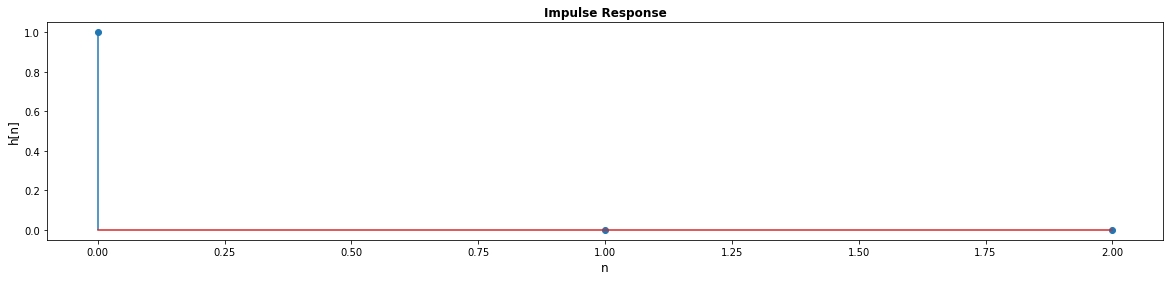

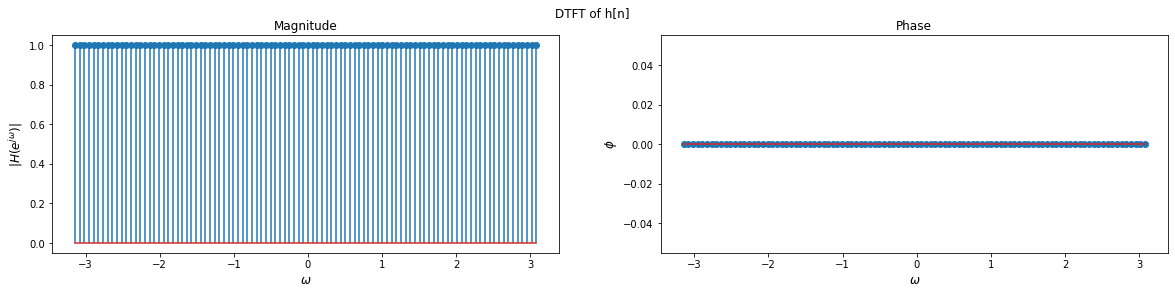

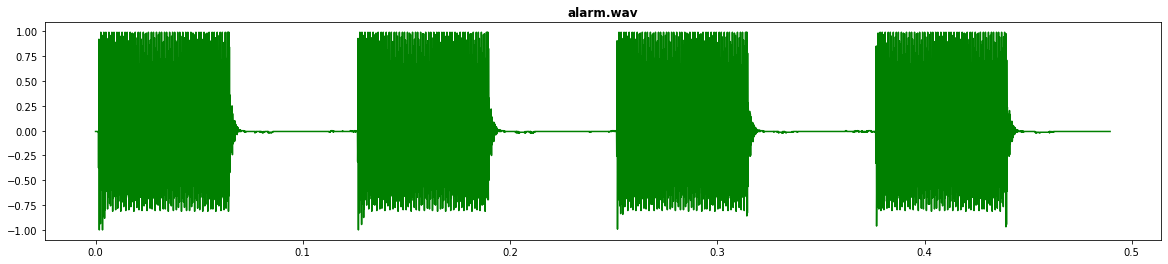

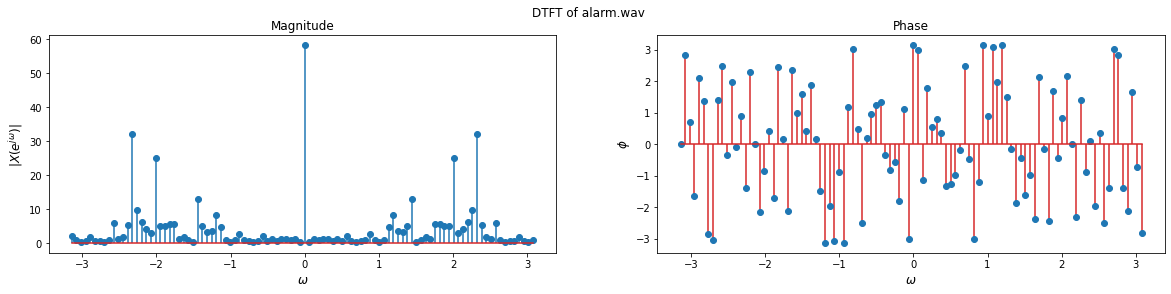

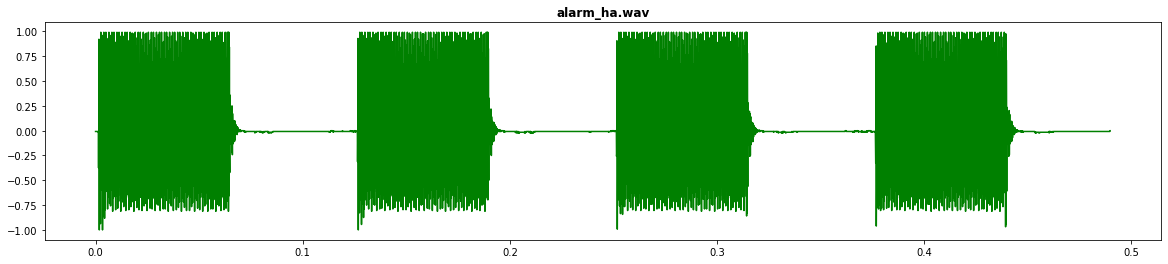

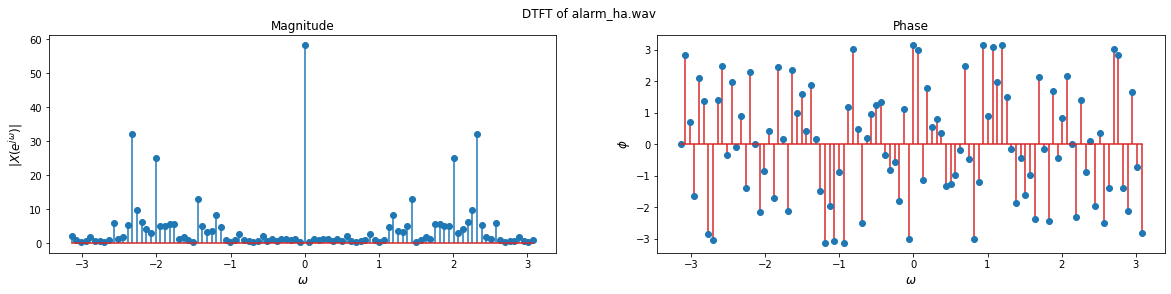

In [21]:
#Problem-3 : Now apply each of the above systems to the alarm, cry wave files and note your observations about
#the output. In other words, convolve each of the above systems with these two wave files and note your 
#observations. You can observe the DTFT spectrum of the output signal to help you with your observations.
#You can also playback the output files to understand the effect of the system on the input.

# ha = h[n] = δ[n]
impulse_plot(na,ha)
#Operating on Alarm File
file = 'alarm.wav'
#Getting the convolved wave file
op = audio_convolve(file, ha, normalisation=True, o=file[:-4] + "_ha.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATIONS :-')
print('1 : As we saw that the magnitude and phase spectrum of delta doesn\'t change the input, it will be same in output, which can seen and heard here.')


x[n]:  [0.0078125 0.0078125 0.0078125 ... 0.        0.        0.       ]
h[n]:  [1 0 0]
y[n] = x[n]*h[n]:  [0.0078125 0.0078125 0.0078125 ... 0.        0.        0.       ]
OBSERVATIONS :-
1 : As we saw that the magnitude and phase spectrum of delta doesn't change the input, it will be same in output, which can seen and heard here.


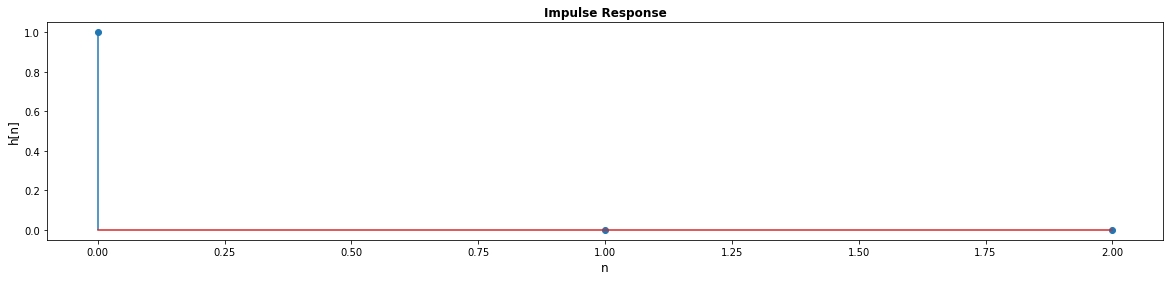

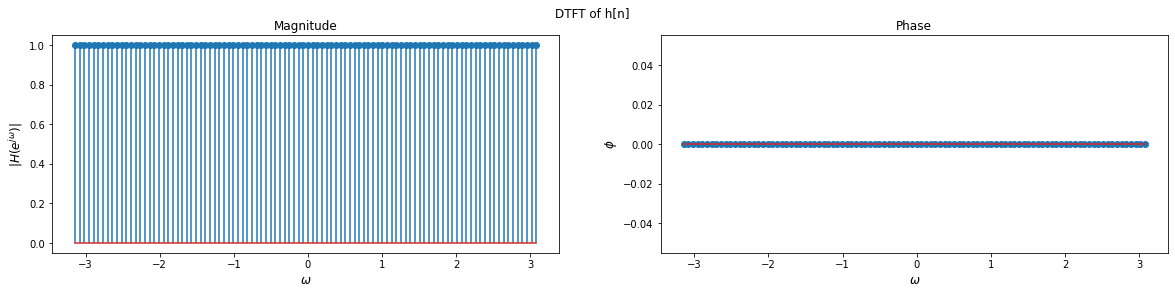

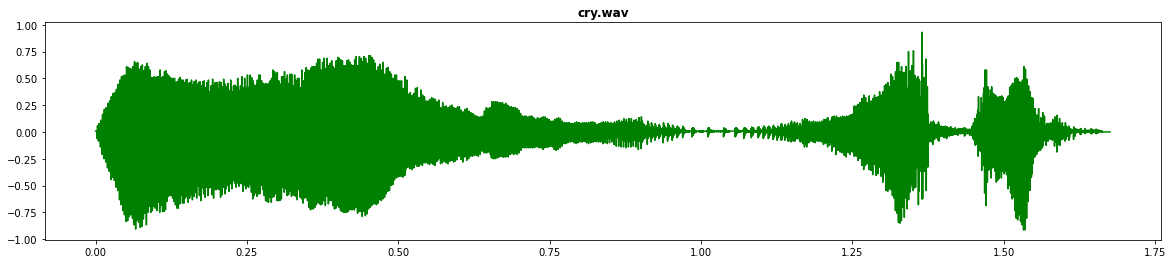

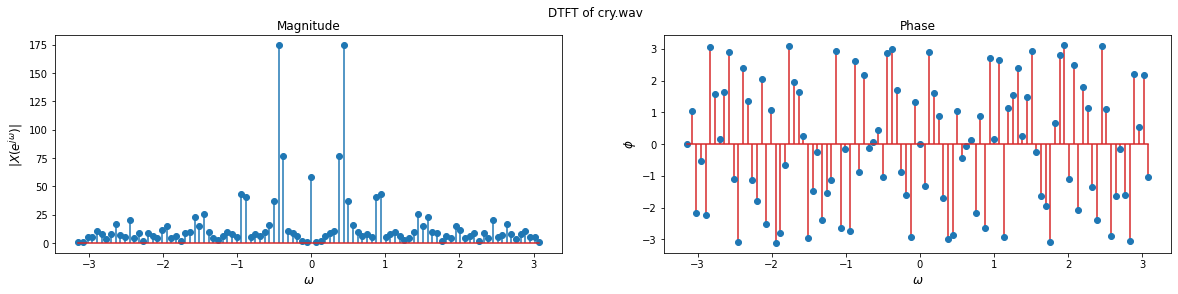

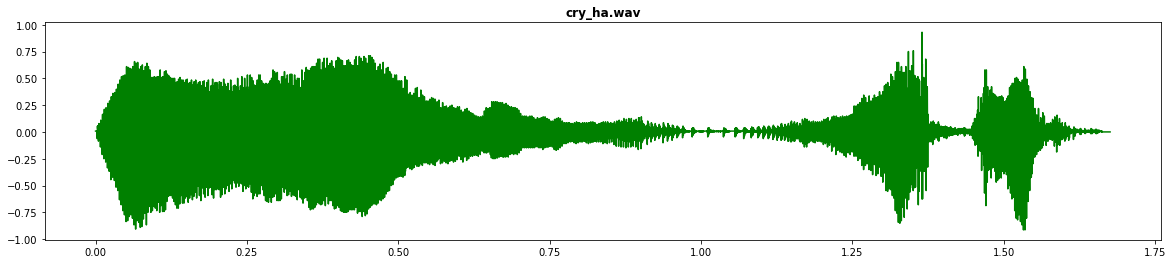

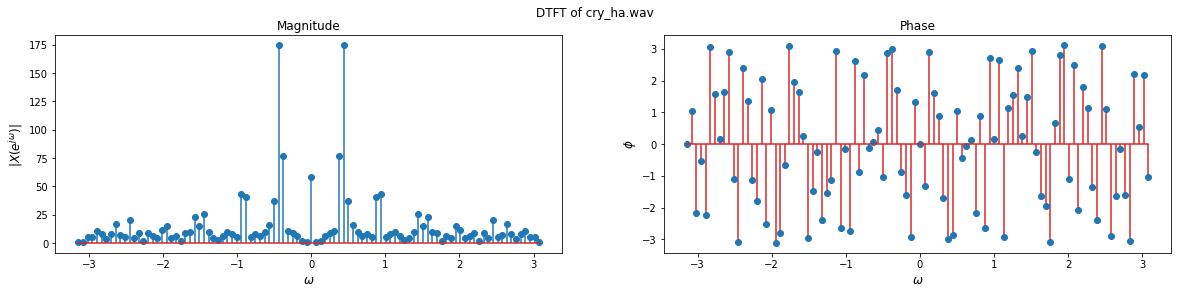

In [21]:
# ha = h[n] = δ[n]
impulse_plot(na,ha)
#Operating on Cry File
file = 'cry.wav'
#Getting the convolved wave file
op = audio_convolve(file, ha, normalisation=True, o=file[:-4] + "_ha.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATIONS :-')
print('1 : As we saw that the magnitude and phase spectrum of delta doesn\'t change the input, it will be same in output, which can seen and heard here.')


x[n]:  [-0.0078125 -0.0078125 -0.0078125 ... -0.0078125 -0.0078125 -0.0078125]
h[n]:  [ 0.5 -0.5  0.   0. ]
y[n] = x[n]*h[n]:  [-0.00390625  0.          0.         ...  0.00390625  0.
  0.        ]
OBSERVATIONS :-
1 : As can be seen th magnitude is reduced for the lower frequencies and the higher frequency components almost remain same.
2 : The phase is also altered, the phase values are nullified by the impulse response phase spectra.
3 : This can be heard reduced intensity of sound.


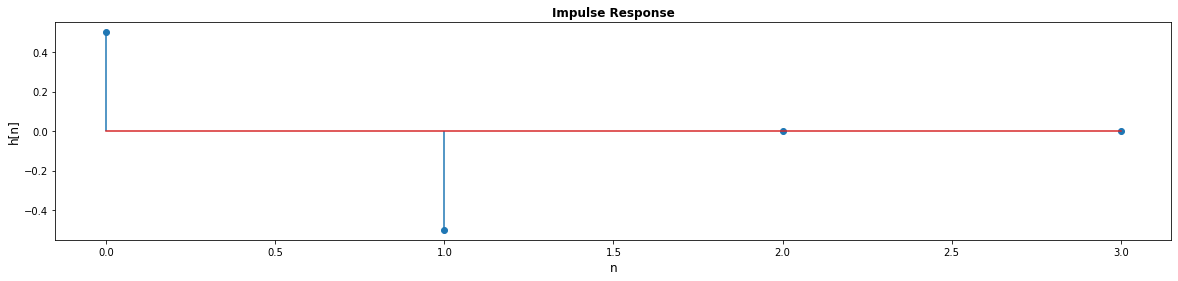

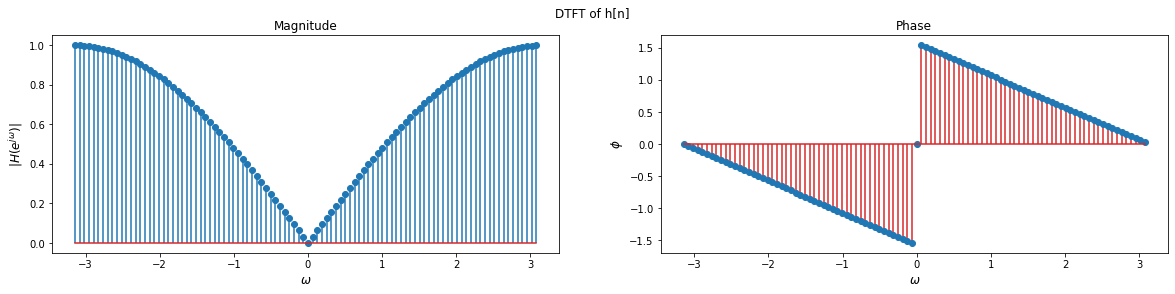

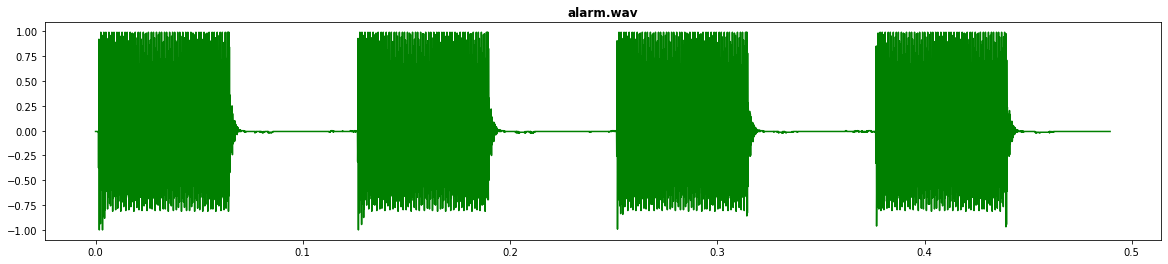

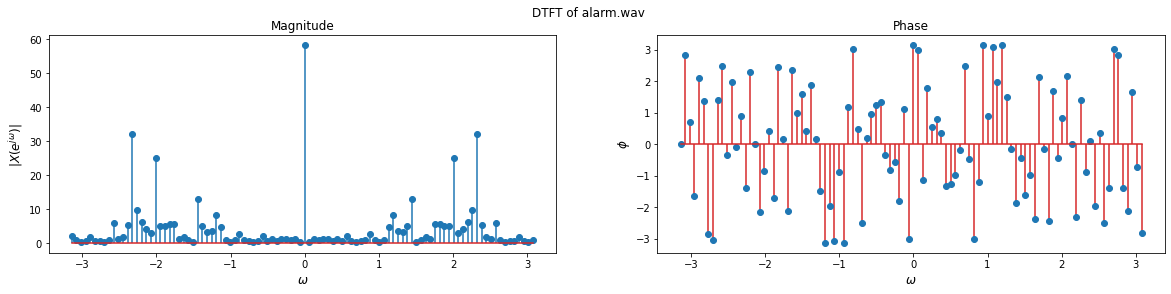

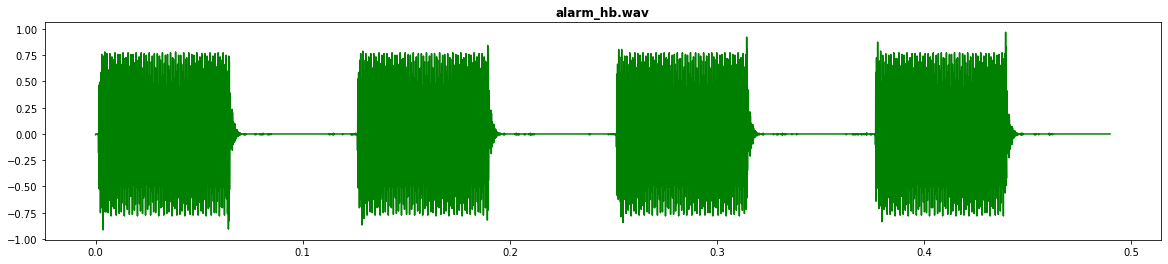

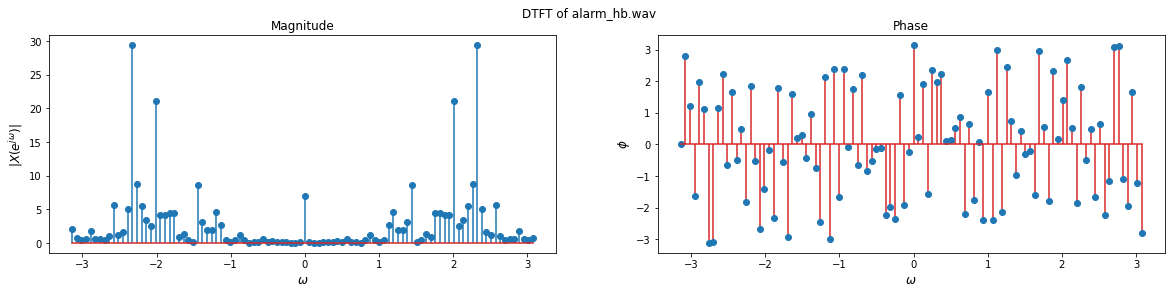

In [22]:
# hb = h[n] = 0.5δ[n] − 0.5δ[n − 1]
impulse_plot(nb,hb)
#Operating on Alarm File
file = 'alarm.wav'
#Getting the convolved wave file
op = audio_convolve(file, hb, normalisation=True, o=file[:-4] + "_hb.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATIONS :-')
print('1 : As can be seen th magnitude is reduced for the lower frequencies and the higher frequency components almost remain same.')
print('2 : The phase is also altered, the phase values are nullified by the impulse response phase spectra.')
print('3 : This can be heard reduced intensity of sound.')

x[n]:  [0.0078125 0.0078125 0.0078125 ... 0.        0.        0.       ]
h[n]:  [ 0.5 -0.5  0.   0. ]
y[n] = x[n]*h[n]:  [0.00390625 0.         0.         ... 0.         0.         0.        ]
OBSERVATIONS :-
1 : As can be seen th magnitude is reduced for the lower frequencies and the higher frequency components almost remain same.
2 : The phase is also altered, the phase values are nullified by the impulse response phase spectra.
3 : As majority of the signal is in low frequency component, this can heard with a lighter intensity.


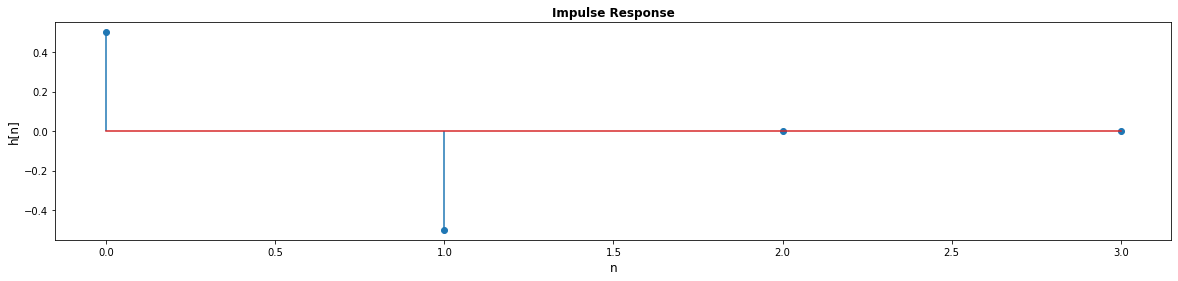

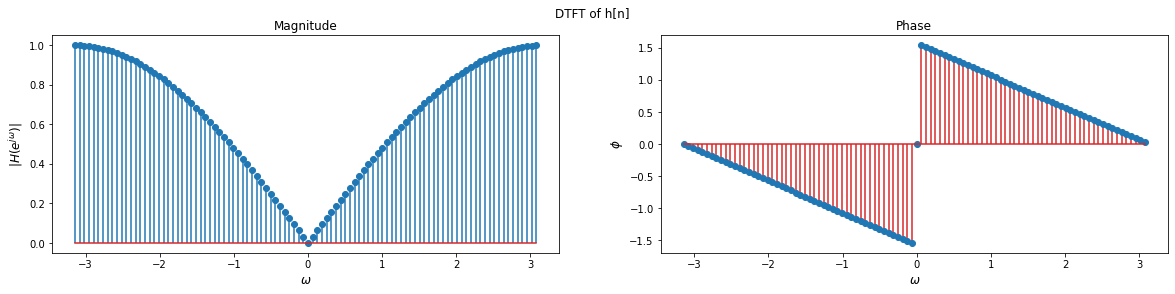

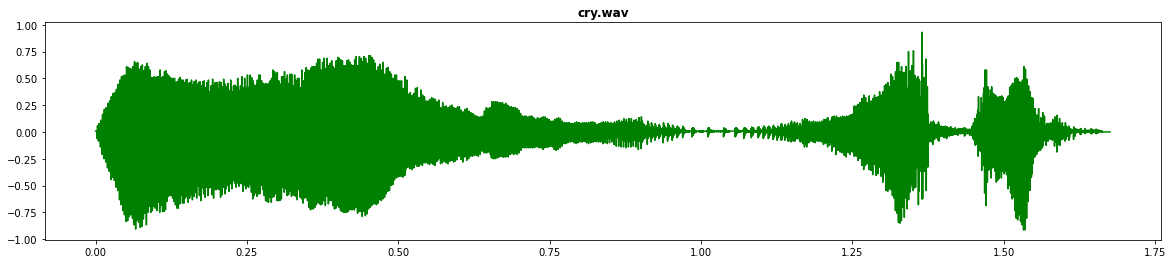

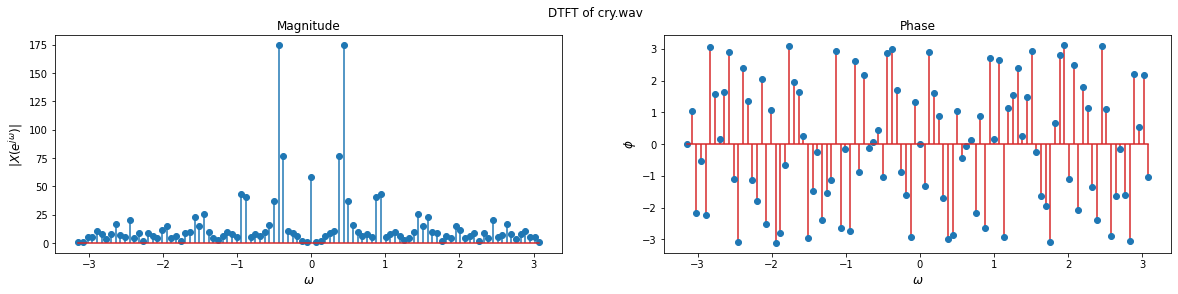

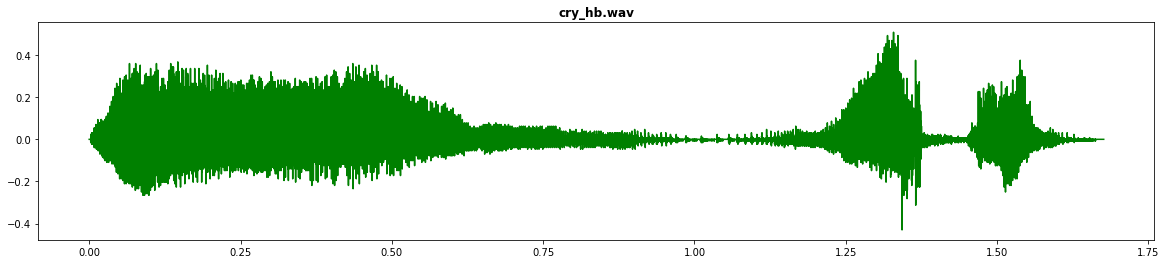

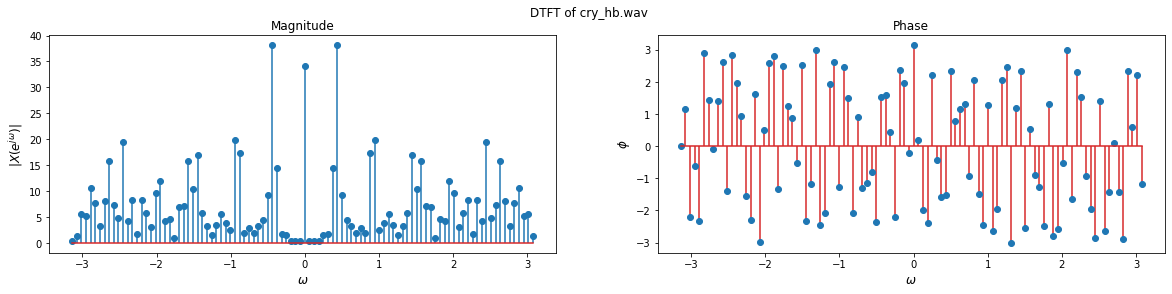

In [23]:
# hb = h[n] = 0.5δ[n] − 0.5δ[n − 1]
impulse_plot(nb,hb)
#Operating on Cry File
file = 'cry.wav'
#Getting the convolved wave file
op = audio_convolve(file, hb, normalisation=True, o=file[:-4] + "_hb.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATIONS :-')
print('1 : As can be seen th magnitude is reduced for the lower frequencies and the higher frequency components almost remain same.')
print('2 : The phase is also altered, the phase values are nullified by the impulse response phase spectra.')
print('3 : As majority of the signal is in low frequency component, this can heard with a lighter intensity.')

x[n]:  [-0.0078125 -0.0078125 -0.0078125 ... -0.0078125 -0.0078125 -0.0078125]
h[n]:  [0.5 0.5 0.  0. ]
y[n] = x[n]*h[n]:  [-0.00390625 -0.0078125  -0.0078125  ... -0.00390625  0.
  0.        ]
OBSERVATIONS :-
1 : As can be seen th magnitude is almost same for the lower frequencies but the higher frequency components are diminished.
2 : The phase is also altered, the phase values are nullified by the impulse response phase spectra.
3 : This can be heard with reduced intensity of sound  lower from original signal .


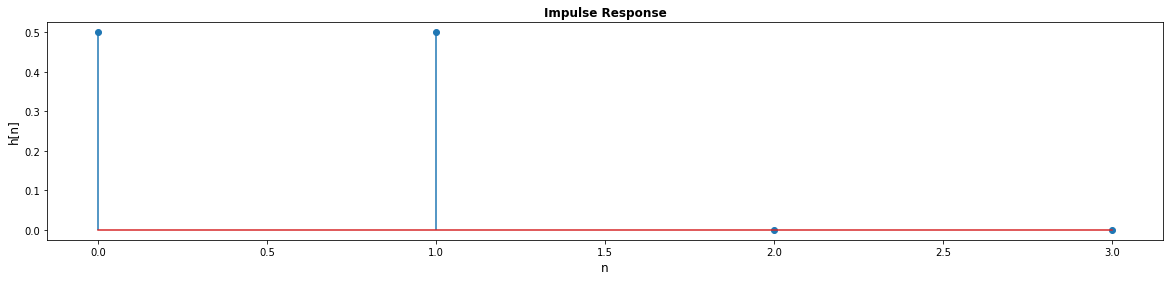

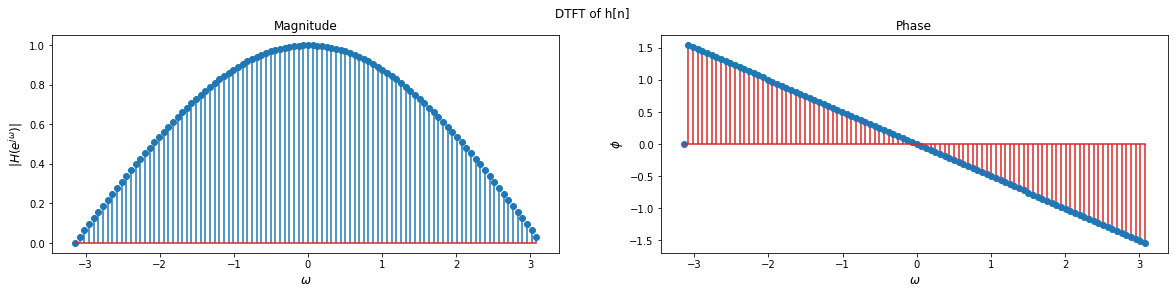

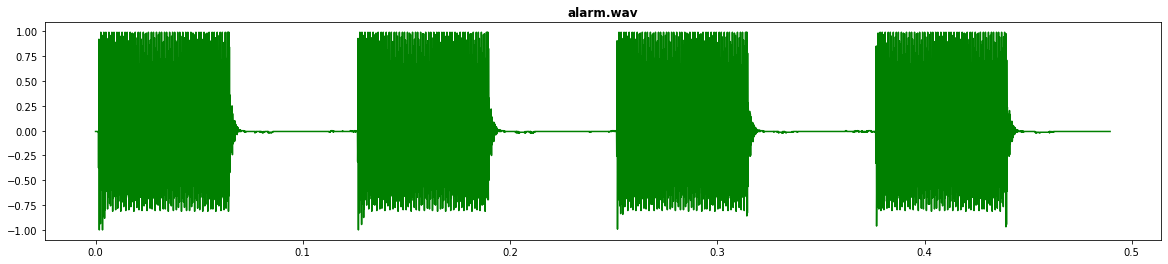

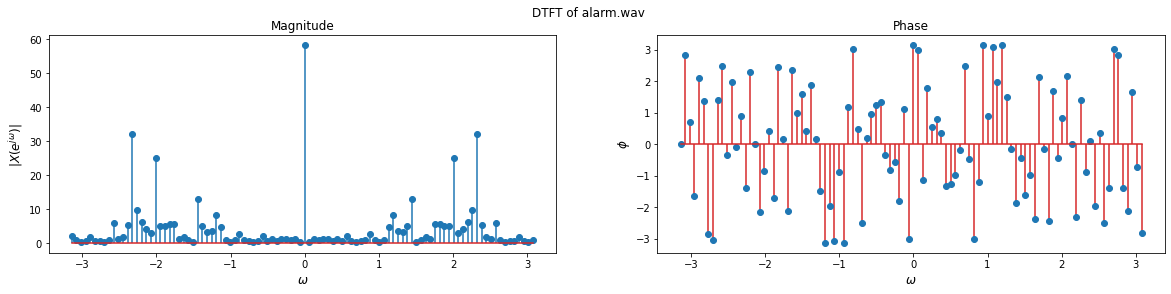

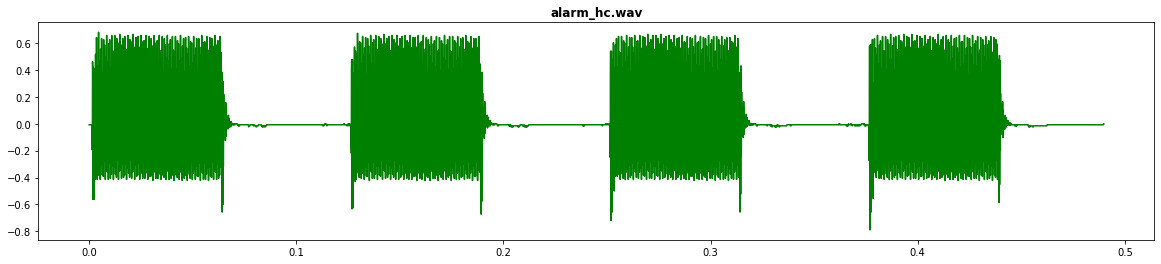

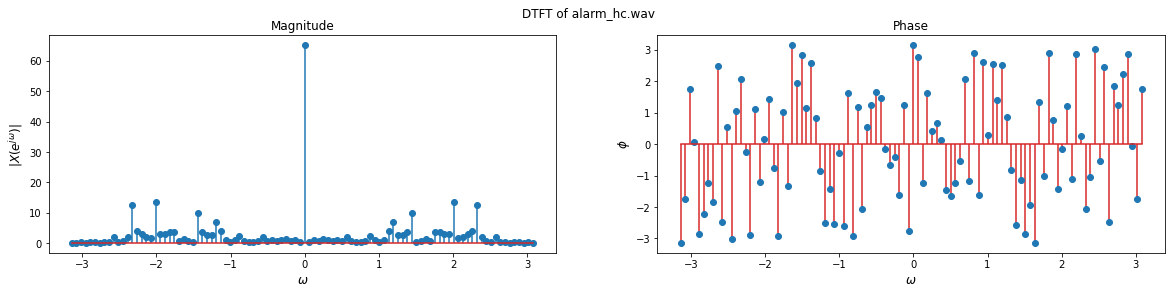

In [24]:
# hc = h[n] = 0.5δ[n] + 0.5δ[n − 1]
impulse_plot(nc,hc)
#Operating on Alarm File
file = 'alarm.wav'
#Getting the convolved wave file
op = audio_convolve(file, hc, normalisation=True, o=file[:-4] + "_hc.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATIONS :-')
print('1 : As can be seen th magnitude is almost same for the lower frequencies but the higher frequency components are diminished.')
print('2 : The phase is also altered, the phase values are nullified by the impulse response phase spectra.')
print('3 : This can be heard with reduced intensity of sound  lower from original signal .')

x[n]:  [0.0078125 0.0078125 0.0078125 ... 0.        0.        0.       ]
h[n]:  [0.5 0.5 0.  0. ]
y[n] = x[n]*h[n]:  [0.00390625 0.0078125  0.0078125  ... 0.         0.         0.        ]
OBSERVATIONS :-
1 : As can be seen th magnitude is almost same for the lower frequencies but the higher frequency components are diminished.
2 : The phase is also altered, the phase values are nullified by the impulse response phase spectra.
3 : But as majority of the signal is in low frequency component, this can hardly be distinguished with similar intensity.


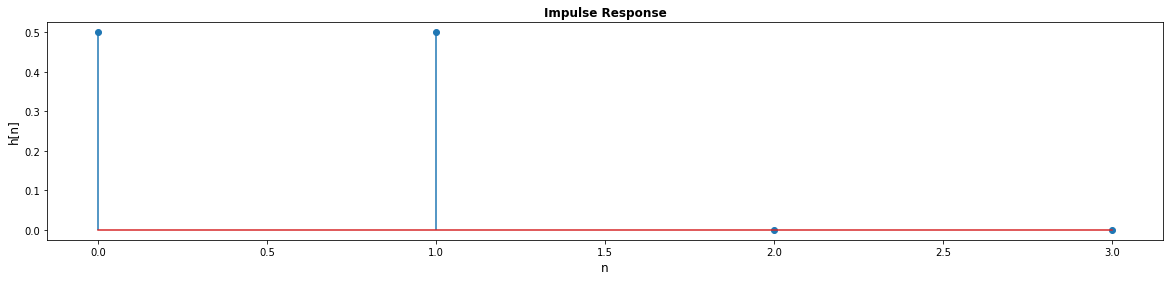

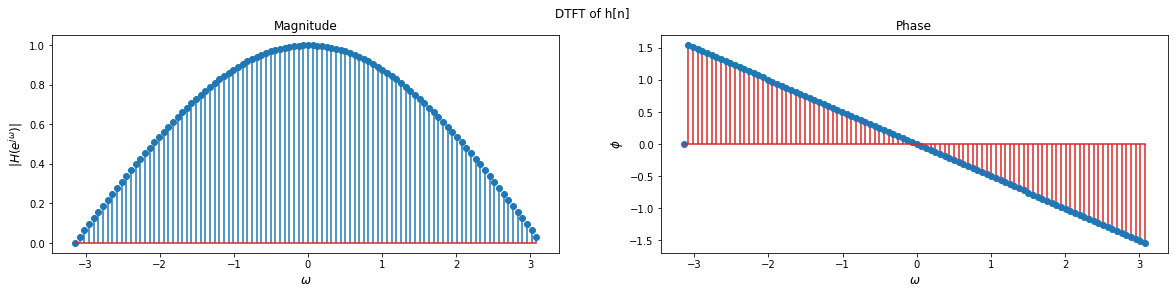

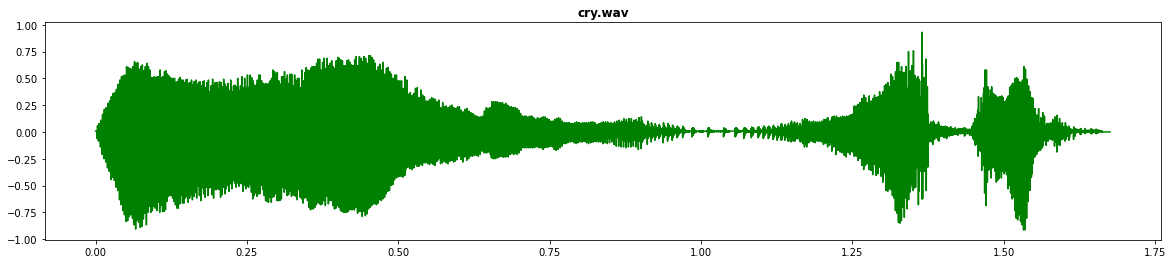

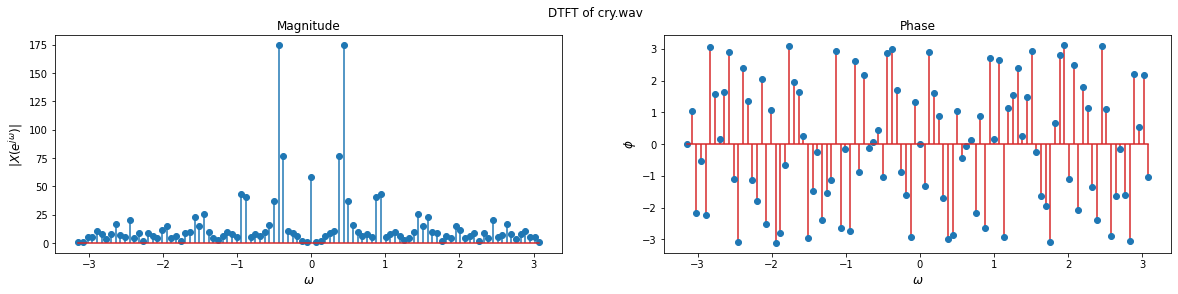

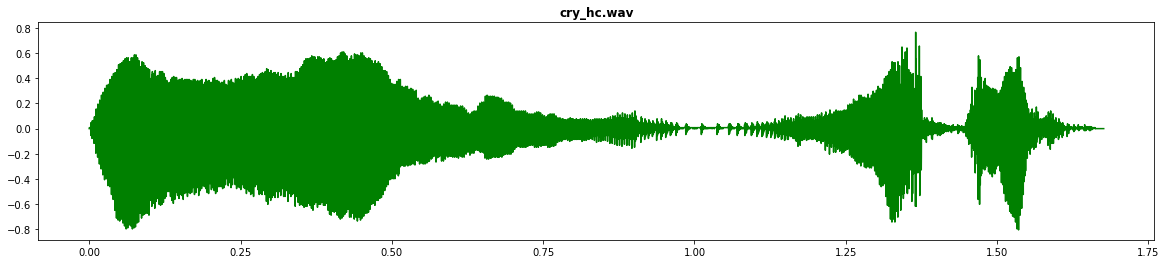

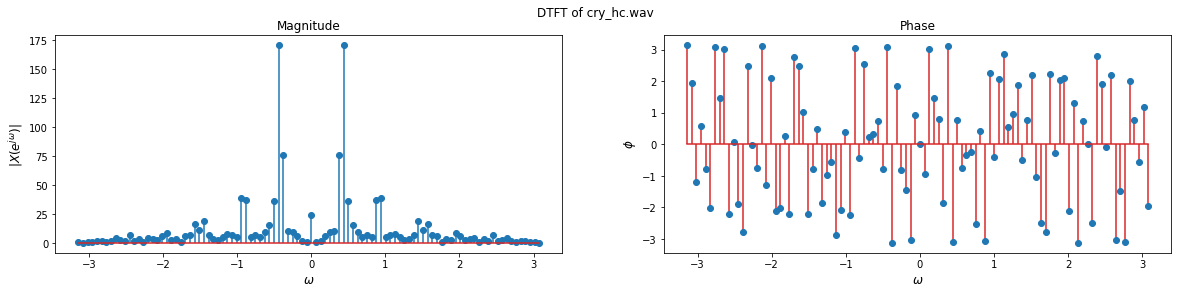

In [25]:
# hc = h[n] = 0.5δ[n] + 0.5δ[n − 1]
impulse_plot(nc,hc)
#Operating on Cry File
file = 'cry.wav'
#Getting the convolved wave file
op = audio_convolve(file, hc, normalisation=True, o=file[:-4] + "_hc.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATIONS :-')
print('1 : As can be seen th magnitude is almost same for the lower frequencies but the higher frequency components are diminished.')
print('2 : The phase is also altered, the phase values are nullified by the impulse response phase spectra.')
print('3 : But as majority of the signal is in low frequency component, this can hardly be distinguished with similar intensity.')

x[n]:  [-0.0078125 -0.0078125 -0.0078125 ... -0.0078125 -0.0078125 -0.0078125]
h[n]:  [0.33 0.33 0.33 0.  ]
y[n] = x[n]*h[n]:  [-0.00257813 -0.00515625 -0.00773437 ... -0.00515625 -0.00257813
  0.        ]
OBSERVATIONS :-
1 : We observe the low frequency component remain same but the higher frequencies are very much opressed.
2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.
3 : This can be heard with reduced intensity of sound, much feeble from original signal .


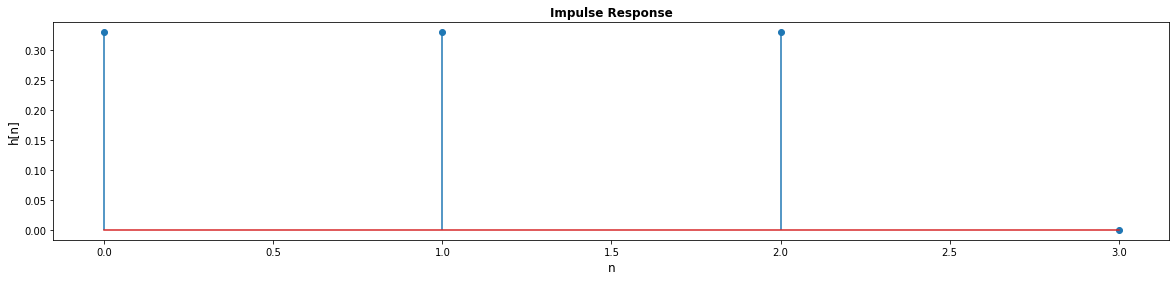

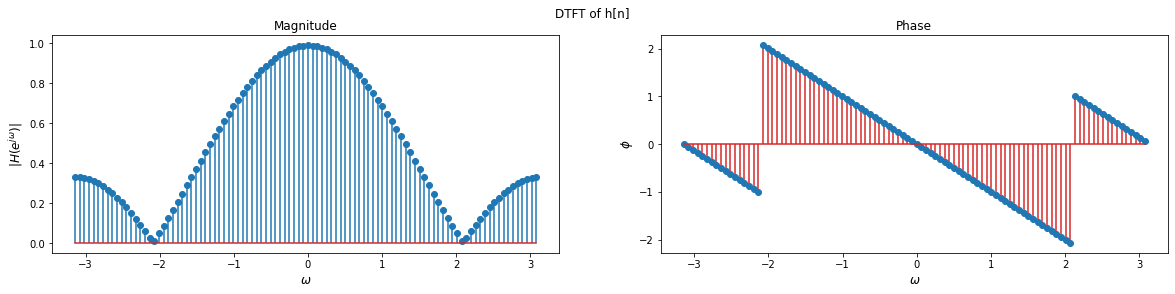

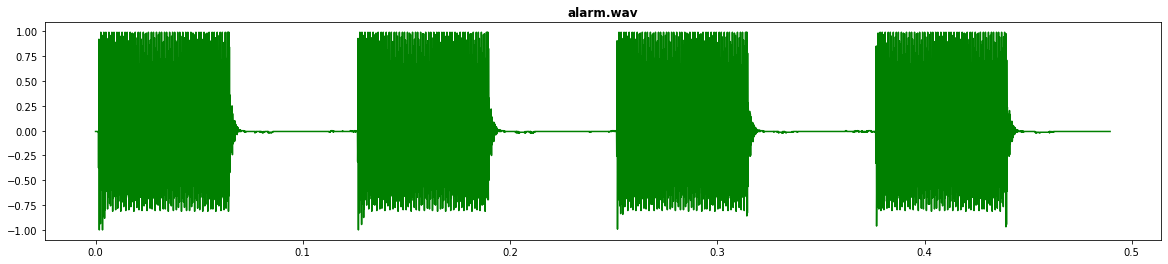

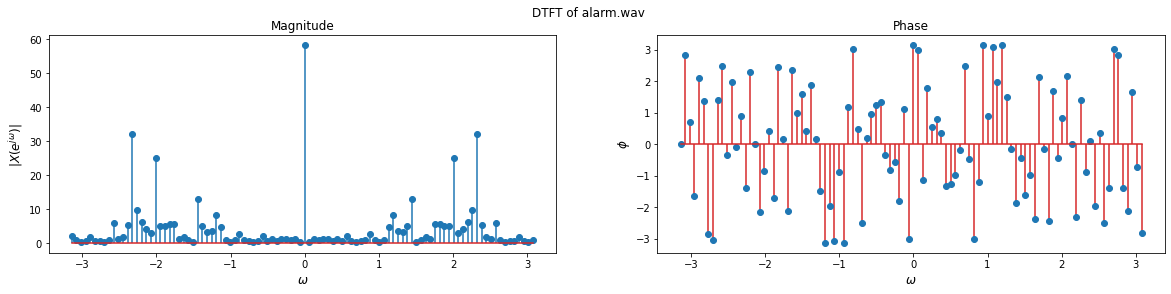

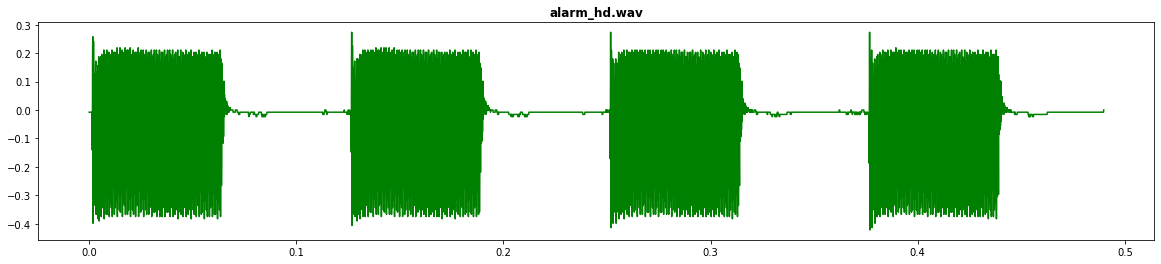

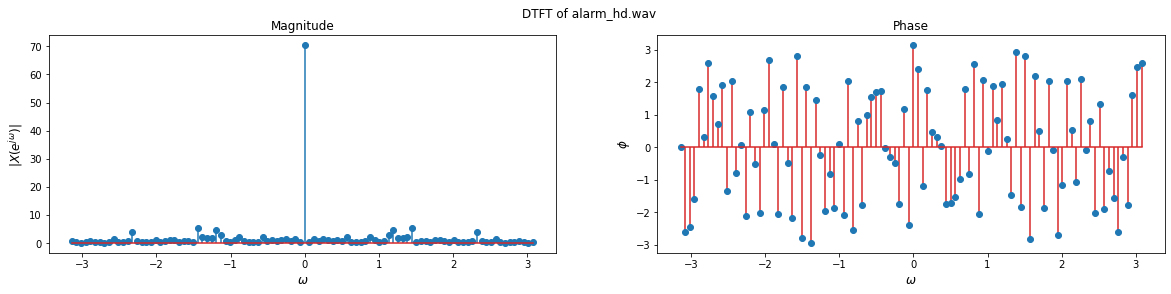

In [26]:
#hd = h[n] = 0.33δ[n] + 0.33δ[n − 1] + 0.33δ[n − 2]
impulse_plot(nd,hd)
#Operating on Alarm File
file = 'alarm.wav'
#Getting the convolved wave file
op = audio_convolve(file, hd, normalisation=True, o=file[:-4] + "_hd.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATIONS :-')
print('1 : We observe the low frequency component remain same but the higher frequencies are very much opressed.')
print('2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.')
print('3 : This can be heard with reduced intensity of sound, much feeble from original signal .')

x[n]:  [0.0078125 0.0078125 0.0078125 ... 0.        0.        0.       ]
h[n]:  [0.33 0.33 0.33 0.  ]
y[n] = x[n]*h[n]:  [0.00257813 0.00515625 0.00773437 ... 0.         0.         0.        ]
OBSERVATIONS :-
1 : We observe the low frequency component remain same but the higher frequencies are very much opressed.
2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.
3 : With majority signal component being in lower frequency, this can be heard with reduced intensity of sound from original signal .


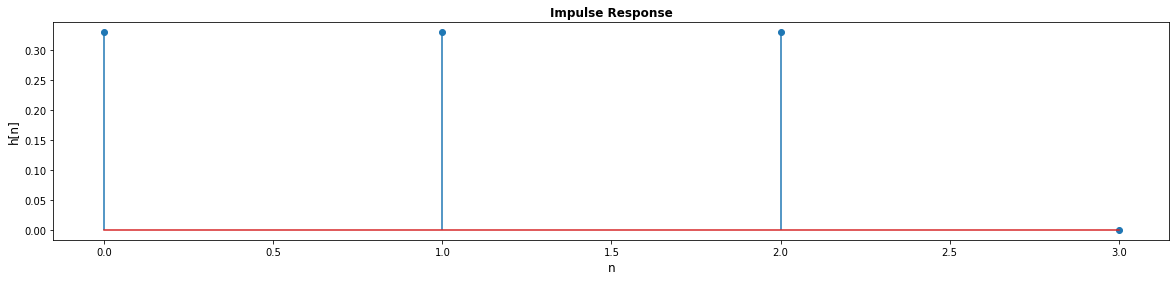

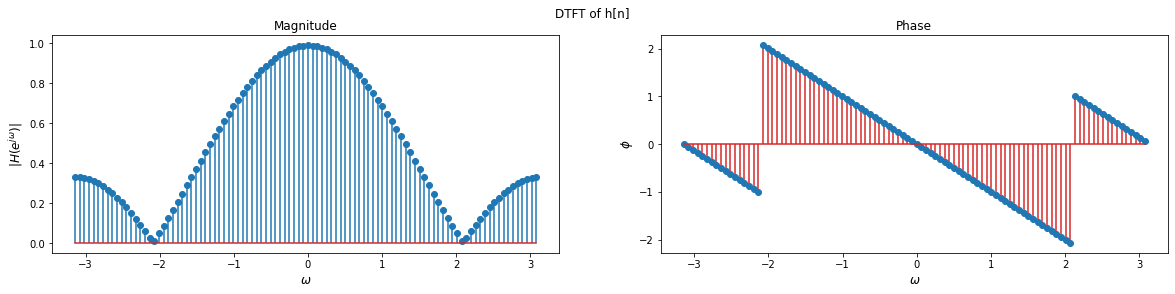

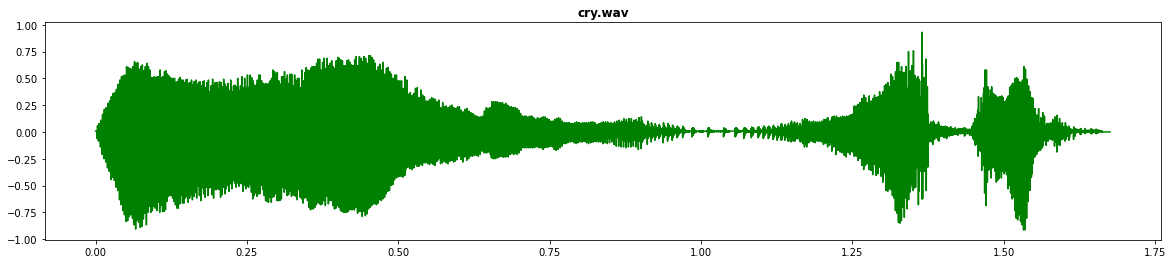

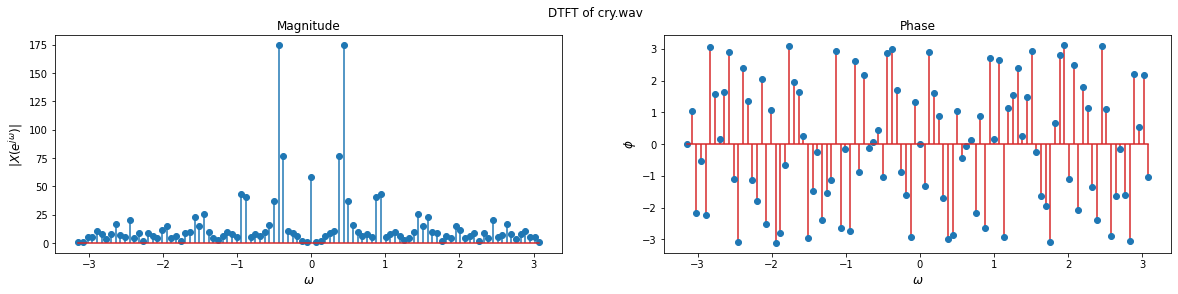

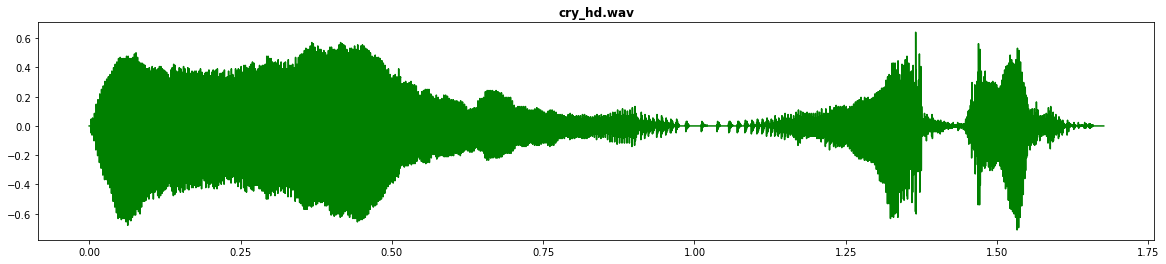

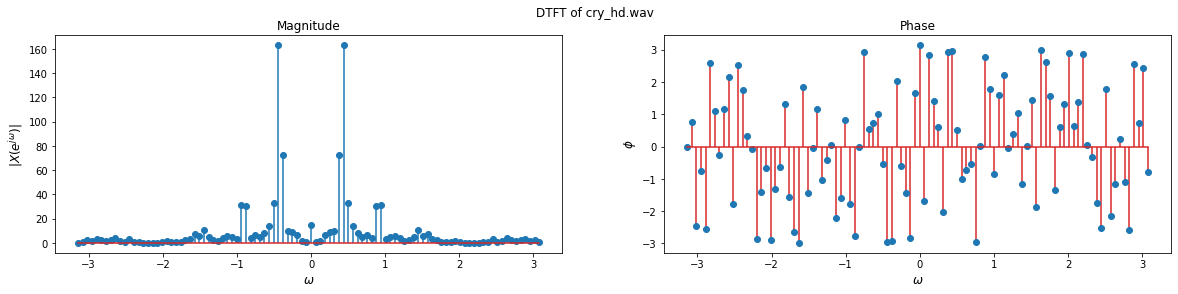

In [27]:
#hd = h[n] = 0.33δ[n] + 0.33δ[n − 1] + 0.33δ[n − 2]
impulse_plot(nd,hd)
#Operating on Cry File
file = 'cry.wav'
#Getting the convolved wave file
op = audio_convolve(file, hd, normalisation=True, o=file[:-4] + "_hd.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATIONS :-')
print('1 : We observe the low frequency component remain same but the higher frequencies are very much opressed.')
print('2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.')
print('3 : With majority signal component being in lower frequency, this can be heard with reduced intensity of sound from original signal .')

x[n]:  [-0.0078125 -0.0078125 -0.0078125 ... -0.0078125 -0.0078125 -0.0078125]
h[n]:  [-0.25  0.5  -0.25  0.  ]
y[n] = x[n]*h[n]:  [ 0.00195312 -0.00195312  0.         ... -0.00195312  0.00195312
  0.        ]
OBSERVATIONS :-
1 : We observe the high frequency component remain same but the lower frequencies are very much opressed.
2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.
3 : This can be heard with reduced intensity of sound, much feeble from original signal .


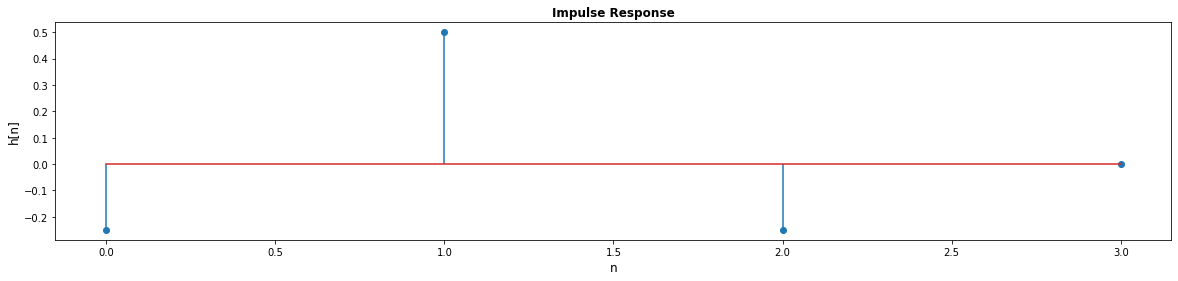

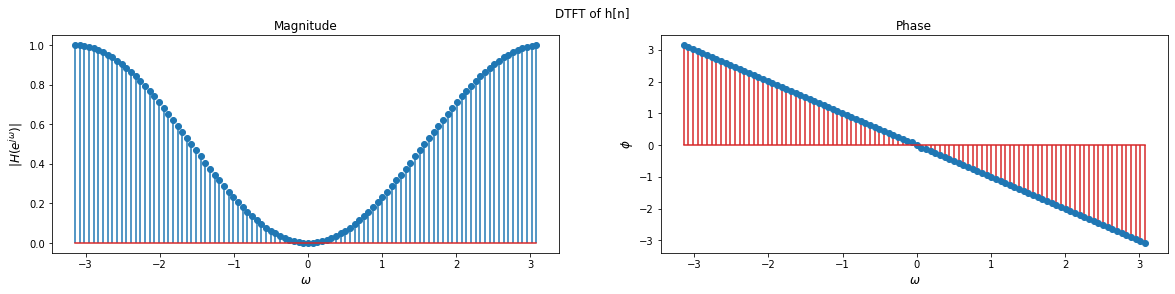

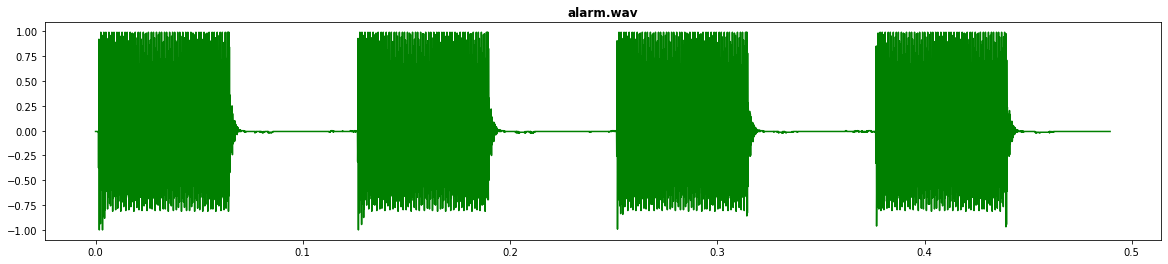

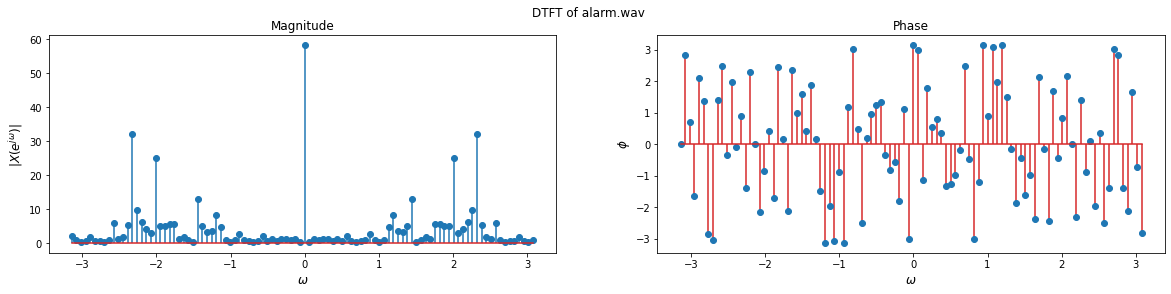

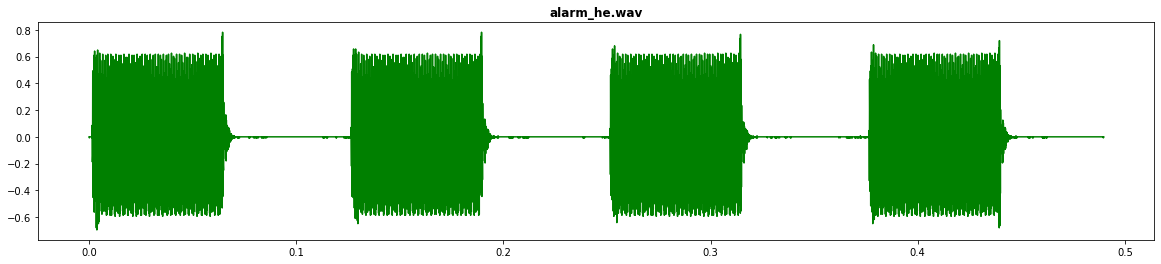

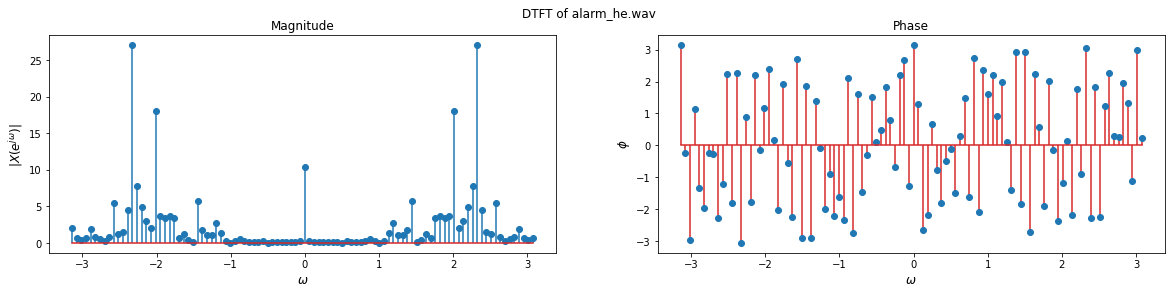

In [28]:
#he = h[n] = −0.25δ[n] + 0.50δ[n − 1] − 0.25δ[n − 2]
impulse_plot(ne,he)
#Operating on Alarm File
file = 'alarm.wav'
#Getting the convolved wave file
op = audio_convolve(file, he, normalisation=True, o=file[:-4] + "_he.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATIONS :-')
print('1 : We observe the high frequency component remain same but the lower frequencies are very much opressed.')
print('2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.')
print('3 : This can be heard with reduced intensity of sound, much feeble from original signal .')

x[n]:  [0.0078125 0.0078125 0.0078125 ... 0.        0.        0.       ]
h[n]:  [-0.25  0.5  -0.25  0.  ]
y[n] = x[n]*h[n]:  [-0.00195312  0.00195312  0.         ...  0.          0.
  0.        ]
OBSERVATIONS :-
1 : We observe the high frequency component remain same but the lower frequencies are very much opressed.
2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.
3 : With majority signal component in lower frequency, this can be heard with very much reduced intensity of sound, much feeble from original signal .


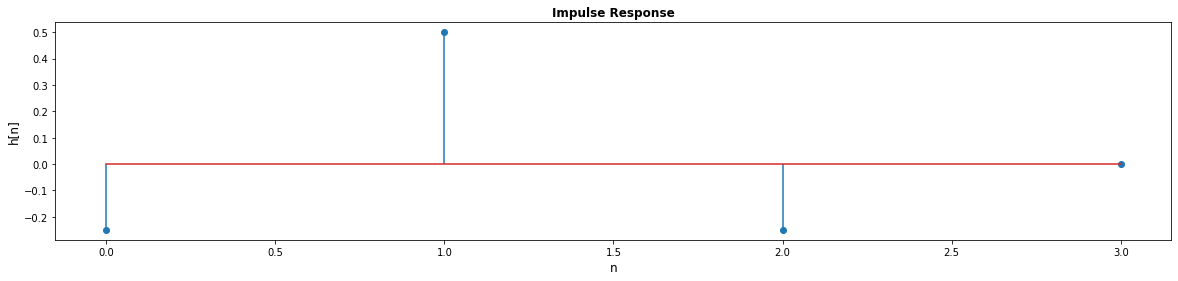

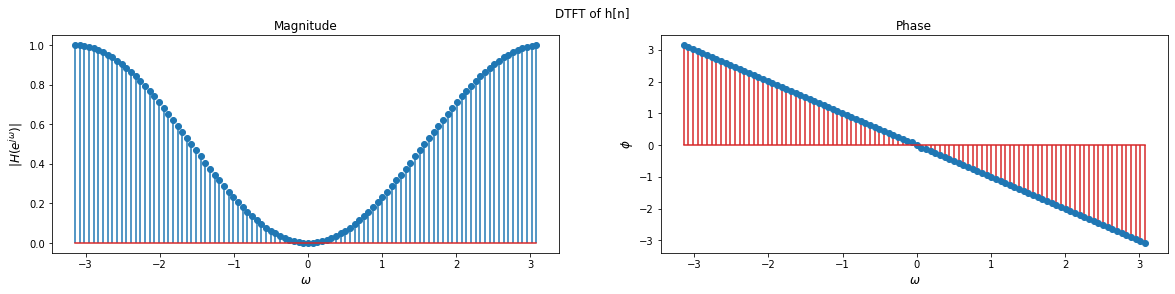

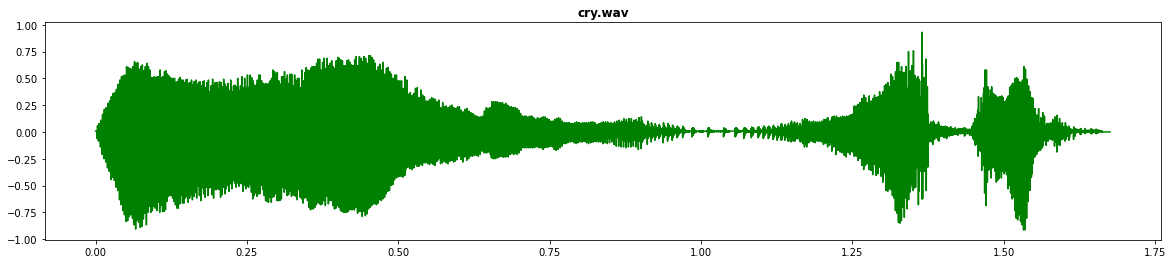

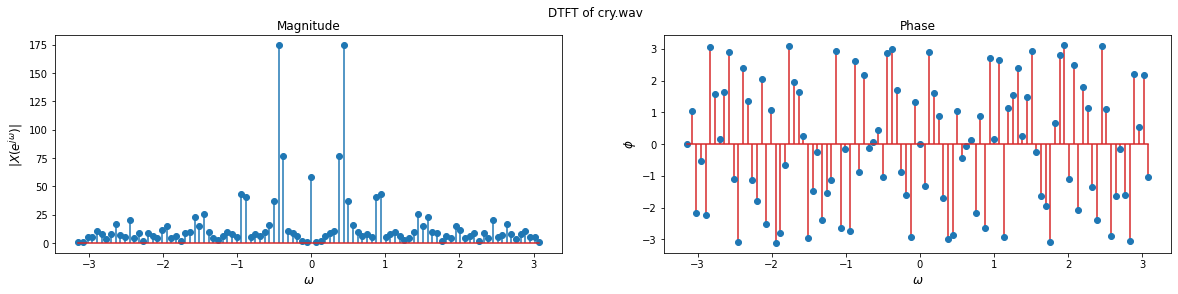

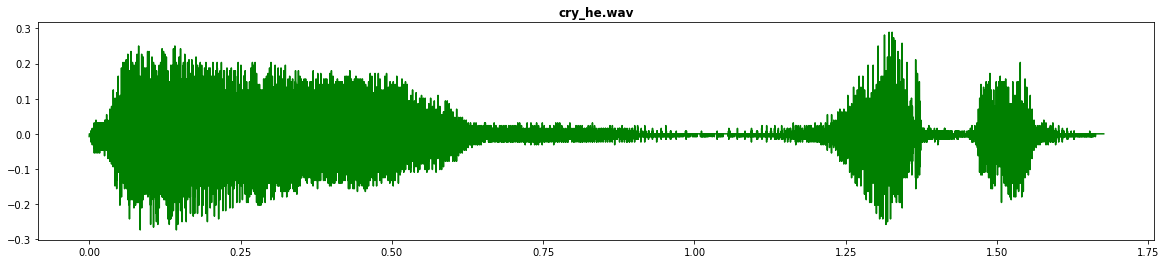

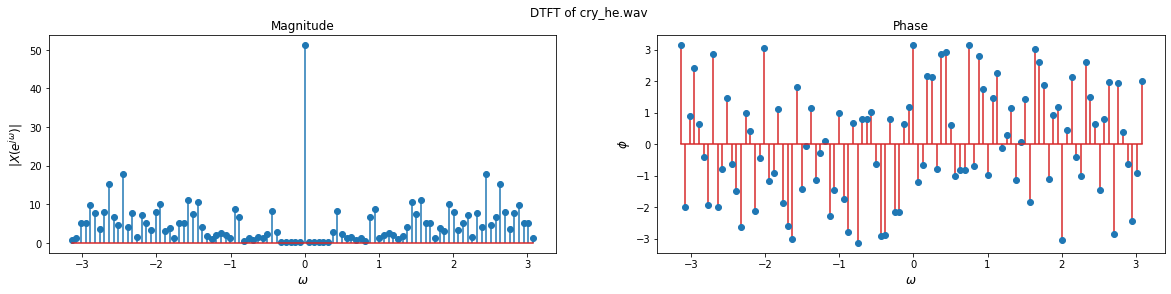

In [26]:
#he = h[n] = −0.25δ[n] + 0.50δ[n − 1] − 0.25δ[n − 2]
impulse_plot(ne,he)
#Operating on cry File
file = 'cry.wav'
#Getting the convolved wave file
op = audio_convolve(file, he, normalisation=True, o=file[:-4] + "_he.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATIONS :-')
print('1 : We observe the high frequency component remain same but the lower frequencies are very much opressed.')
print('2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.')
print('3 : With majority signal component in lower frequency, this can be heard with very much reduced intensity of sound, much feeble from original signal .')

x[n]:  [-0.0078125 -0.0078125 -0.0078125 ... -0.0078125 -0.0078125 -0.0078125]
h[n]:  [1 1 1 1 1 1 0 0 0 0]
y[n] = x[n]*h[n]:  [-0.0078125 -0.015625  -0.0234375 ...  0.         0.         0.       ]
OBSERVATIONS :-
1 : We observe the low frequency component amplified but the lower frequencies are very much opressed.
2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.
3 : This can be heard with similar intensity of sound, and has a different tone from original signal .


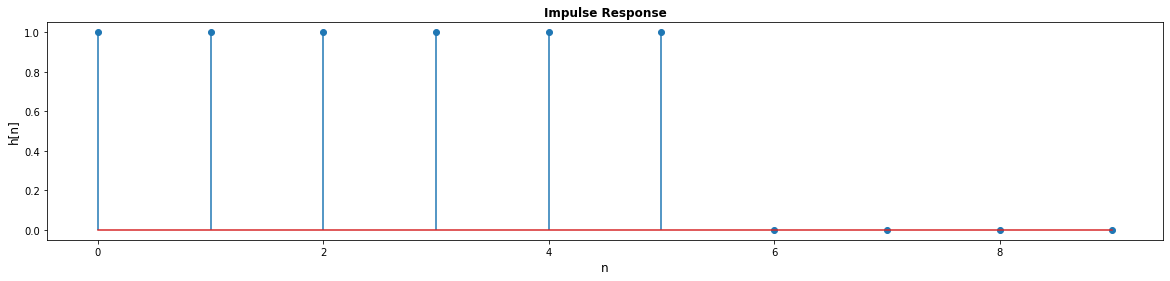

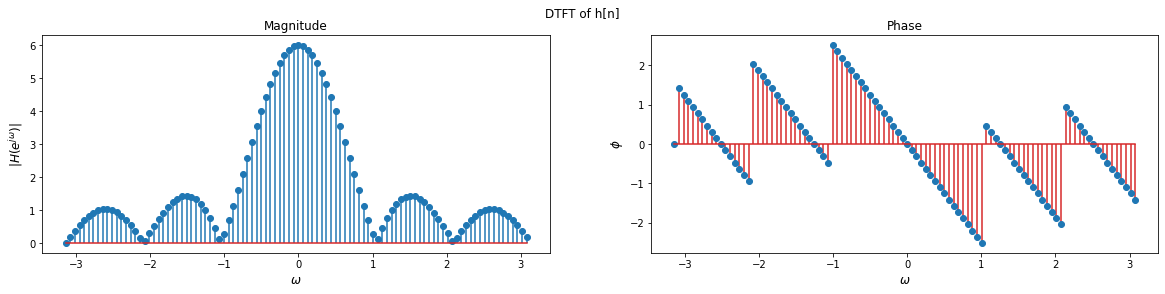

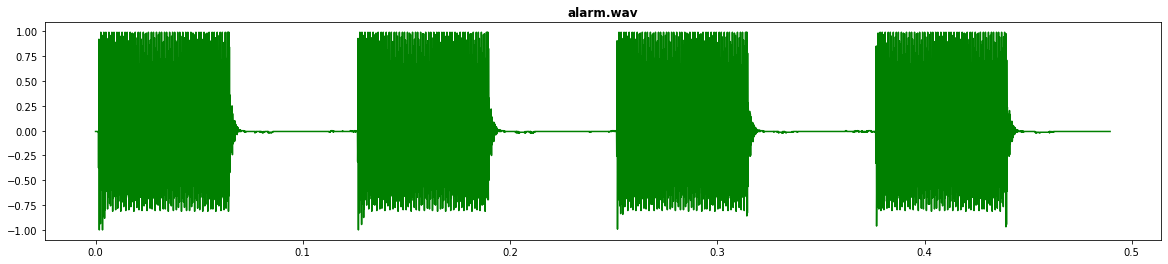

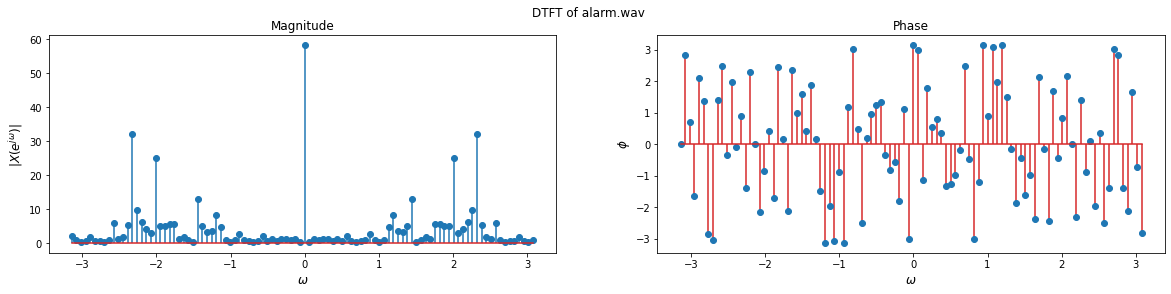

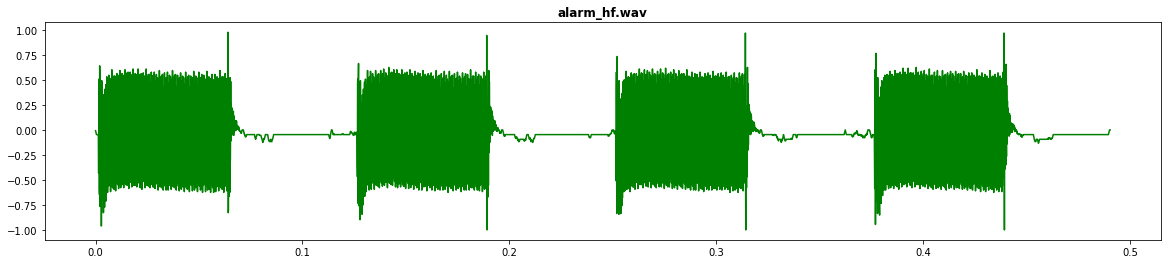

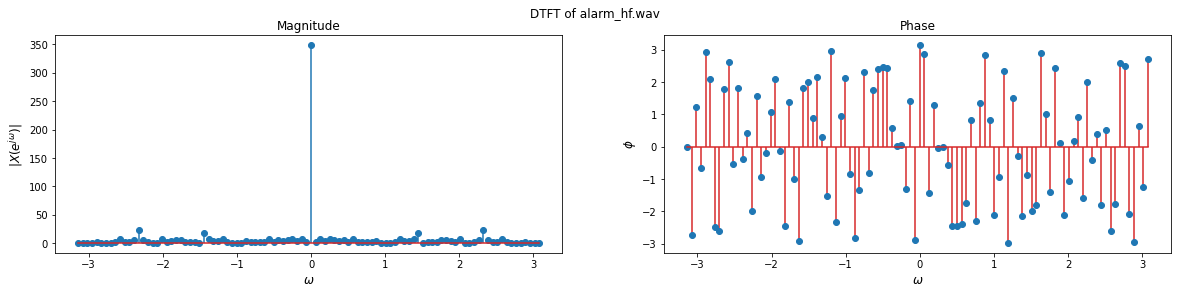

In [30]:
#hf = h[n] = (
# 1; 0 ≤ n ≤ 5
# 0; else
# )
impulse_plot(nf,hf)
#Operating on Alarm File
file = 'alarm.wav'
#Getting the convolved wave file
op = audio_convolve(file, hf, normalisation=True, o=file[:-4] + "_hf.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATIONS :-')
print('1 : We observe the low frequency component amplified but the lower frequencies are very much opressed.')
print('2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.')
print('3 : This can be heard with similar intensity of sound, and has a different tone from original signal .')

x[n]:  [0.0078125 0.0078125 0.0078125 ... 0.        0.        0.       ]
h[n]:  [1 1 1 1 1 1 0 0 0 0]
y[n] = x[n]*h[n]:  [0.0078125 0.015625  0.0234375 ... 0.        0.        0.       ]
OBSERVATIONS :-
1 : We observe the low frequency component amplified but the lower frequencies are very much opressed.
2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.
3 : This can be heard with similar intensity of sound and has a different tone from original signal with some added noise .


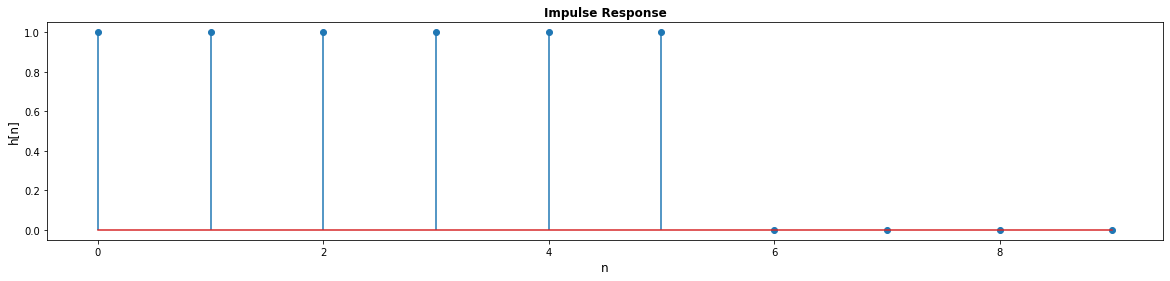

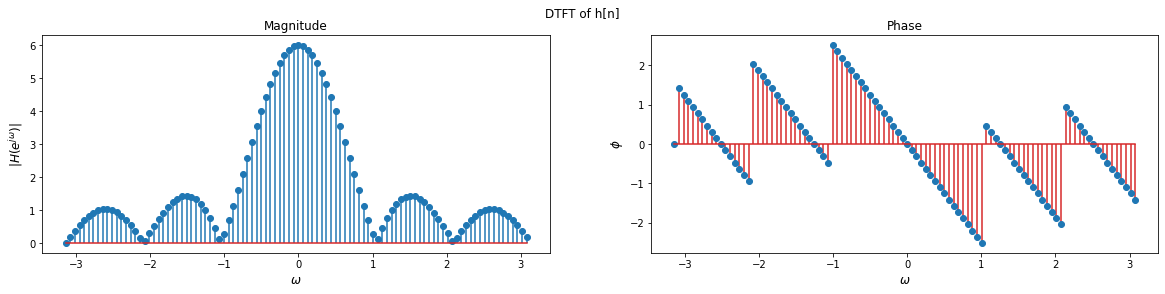

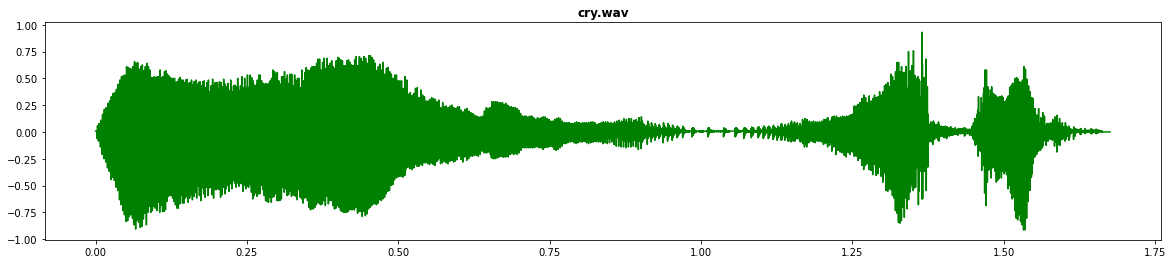

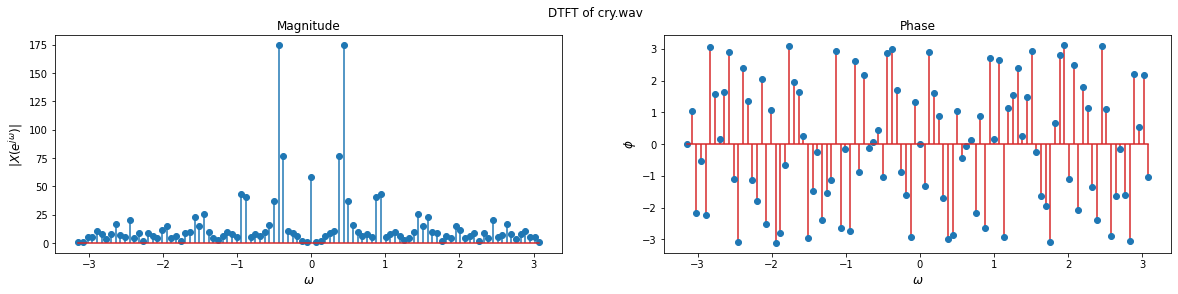

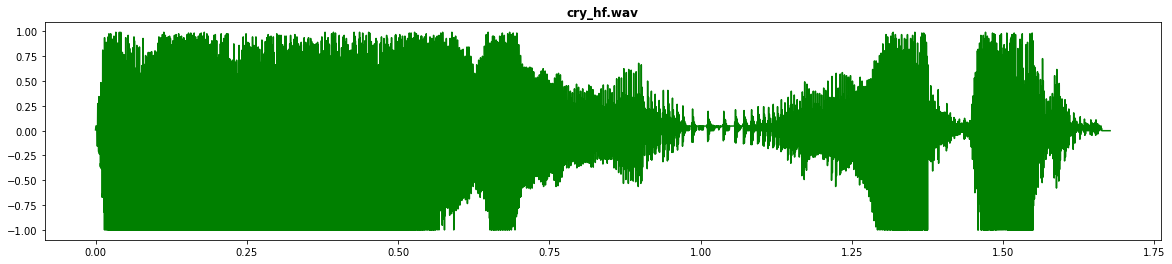

Exception ignored in: <function Wave_write.__del__ at 0x0000029E762C0CA0>
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python39\lib\wave.py", line 326, in __del__
    self.close()
  File "c:\users\asus\appdata\local\programs\python\python39\lib\wave.py", line 443, in close
    if self._file:
AttributeError: 'Wave_write' object has no attribute '_file'


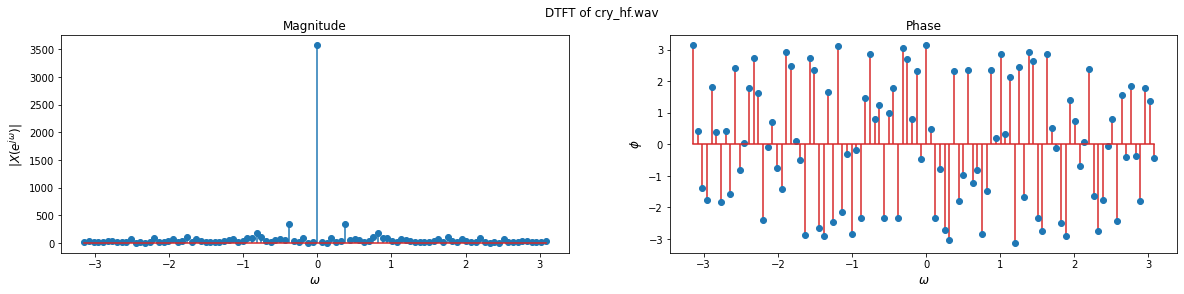

In [25]:
#hf = h[n] = (
# 1; 0 ≤ n ≤ 5
# 0; else
# )
impulse_plot(nf,hf)
#Operating on Cry File
file = 'cry.wav'
#Getting the convolved wave file
op = audio_convolve(file, hf, normalisation=True, o=file[:-4] + "_hf.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATIONS :-')
print('1 : We observe the low frequency component amplified but the lower frequencies are very much opressed.')
print('2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.')
print('3 : This can be heard with similar intensity of sound and has a different tone from original signal with some added noise .')

PermissionError: [Errno 13] Permission denied: 'alarm_hg.wav'

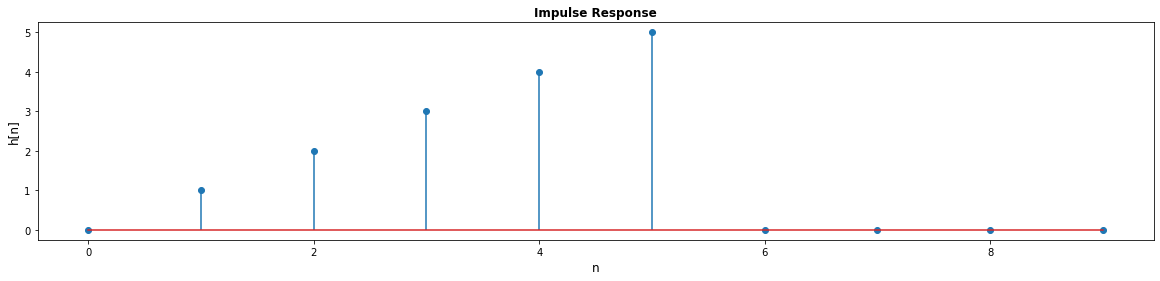

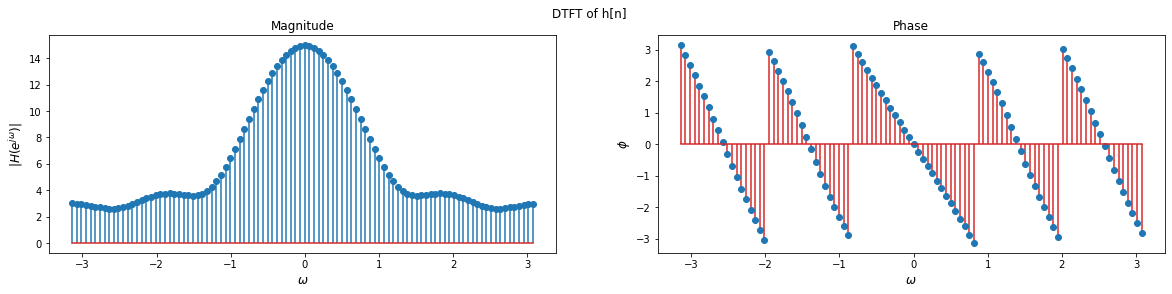

In [24]:
#hg = h[n] = (
# n; 0 ≤ n ≤ 5
# 0; else
# )
impulse_plot(ng,hg)
#Operating on Alarm File
file = 'alarm.wav'
#Getting the convolved wave file
op = audio_convolve(file, hg, normalisation=True, o=file[:-4] + "_hg.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATIONS :-')
print('1 : We observe the low and high frequency component amplified but the lower frequencies are very much amplified comparitively.')
print('2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.')
print('3 : This can be heard with greater intensity of sound and has a different tone from original signal with larger buzz.')

x[n]:  [0.0078125 0.0078125 0.0078125 ... 0.        0.        0.       ]
h[n]:  [0 1 2 3 4 5 0 0 0 0]
y[n] = x[n]*h[n]:  [0.        0.0078125 0.0234375 ... 0.        0.        0.       ]
OBSERVATIONS :-
1 : We observe the low and high frequency component amplified but the lower frequencies are very much amplified comparitively.
2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.
3 : This can be heard with greater intensity of sound and has a completely different tone from original signal with larger buzz.and added noise.


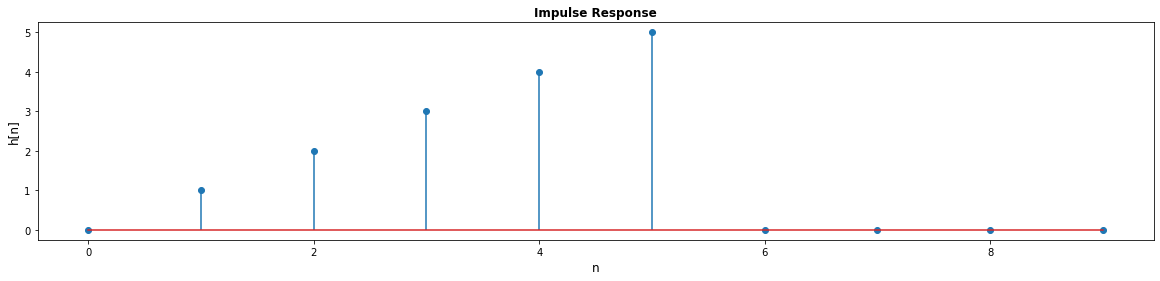

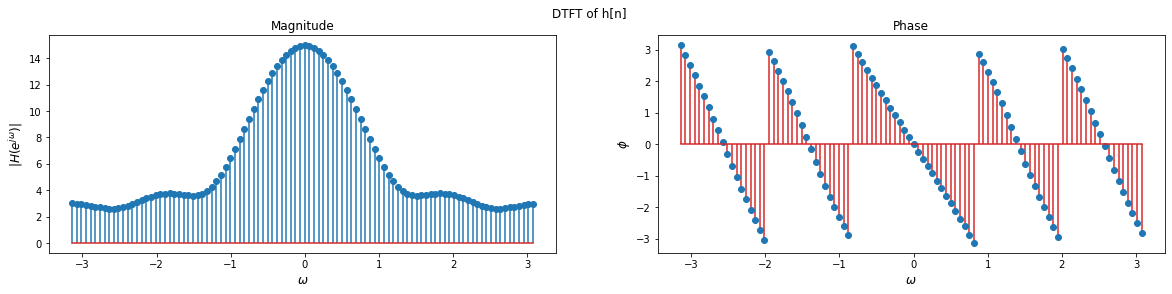

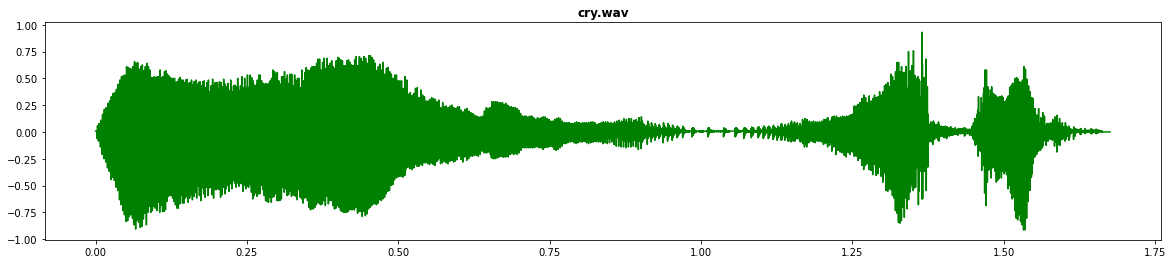

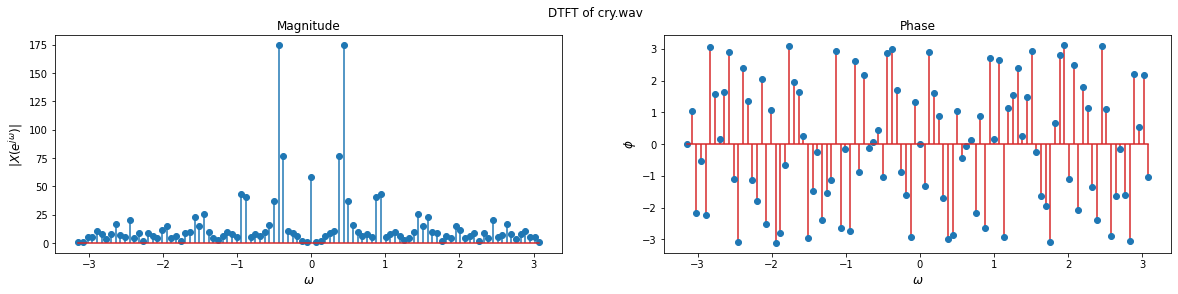

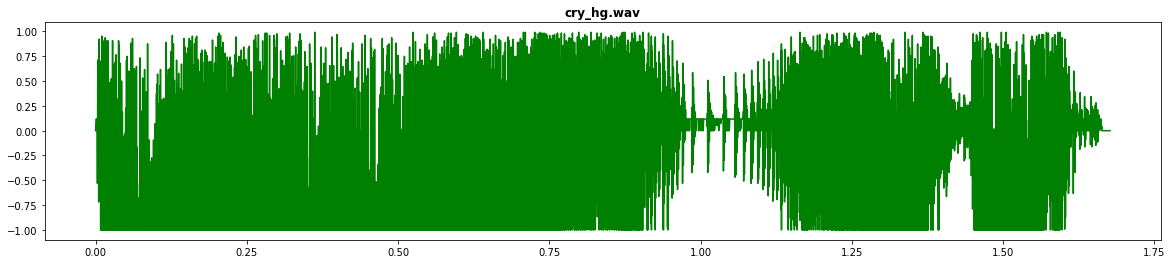

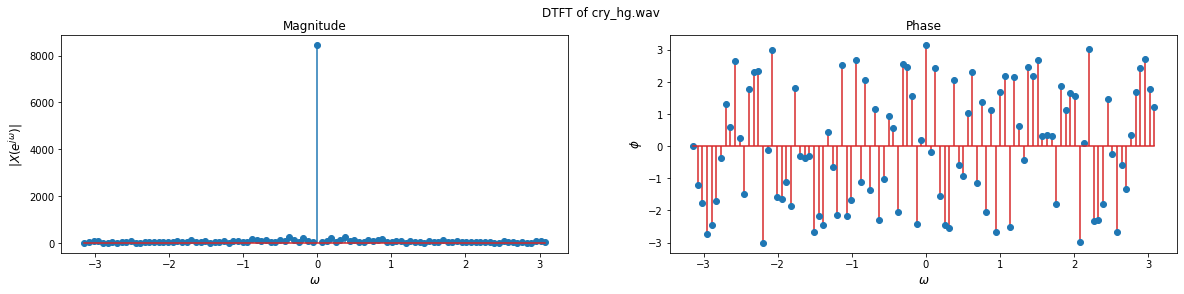

In [22]:
#hg = h[n] = (
# n; 0 ≤ n ≤ 5
# 0; else
# )
impulse_plot(ng,hg)
#Operating on Cry File
file = 'cry.wav'
#Getting the convolved wave file
op = audio_convolve(file, hg, normalisation=True, o=file[:-4] + "_hg.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATIONS :-')
print('1 : We observe the low and high frequency component amplified but the lower frequencies are very much amplified comparitively.')
print('2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.')
print('3 : This can be heard with greater intensity of sound and has a completely different tone from original signal with larger buzz and added noise.')

PermissionError: [Errno 13] Permission denied: 'alarm_hh.wav'

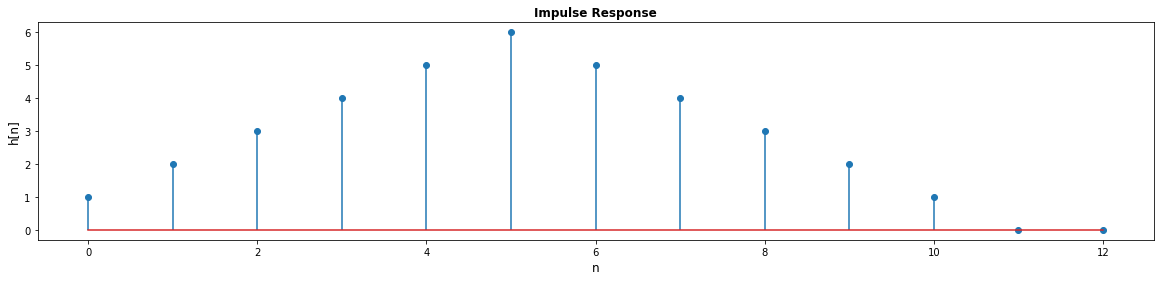

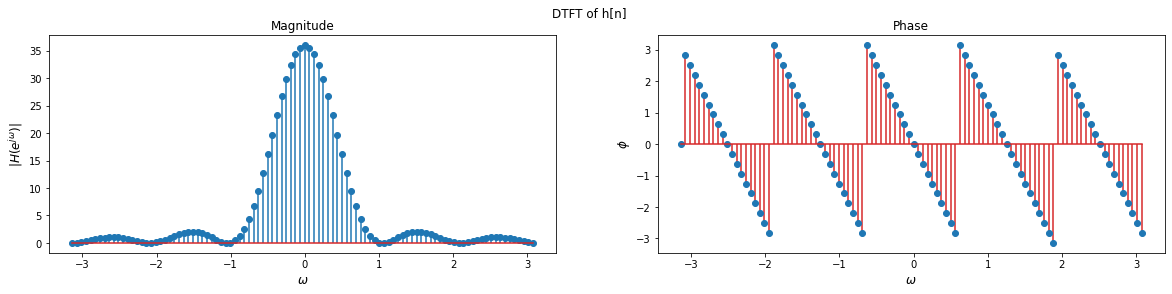

In [21]:
#hh = h[n] = n + 1; 0 ≤ n ≤ 5; h[n] = h[10 − n]; 5 < n ≤ 10; h[n] = 0; for all other n
impulse_plot(nh,hh)
#Operating on Alarm File
file = 'alarm.wav'
#Getting the convolved wave file
op = audio_convolve(file, hh, normalisation=True, o=file[:-4] + "_hh.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATIONS :-')
print('1 : We observe the high frequency component slightly amplified and some diminished but the lower frequencies are very hugely amplified comparitively.')
print('2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.')
print('3 : This can be heard with greater intensity of sound and has a different tone from original signal.')

x[n]:  [0.0078125 0.0078125 0.0078125 ... 0.        0.        0.       ]
h[n]:  [1. 2. 3. 4. 5. 6. 5. 4. 3. 2. 1. 0. 0.]
y[n] = x[n]*h[n]:  [0.0078125 0.0234375 0.046875  ... 0.        0.        0.       ]
OBSERVATIONS :-
1 : We observe the high frequency component slightly amplified and some diminished but the lower frequencies are very hugely amplified comparitively.
2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.
3 : This can be heard with greater intensity of sound and has a completely different tone from original signal with much added noise.


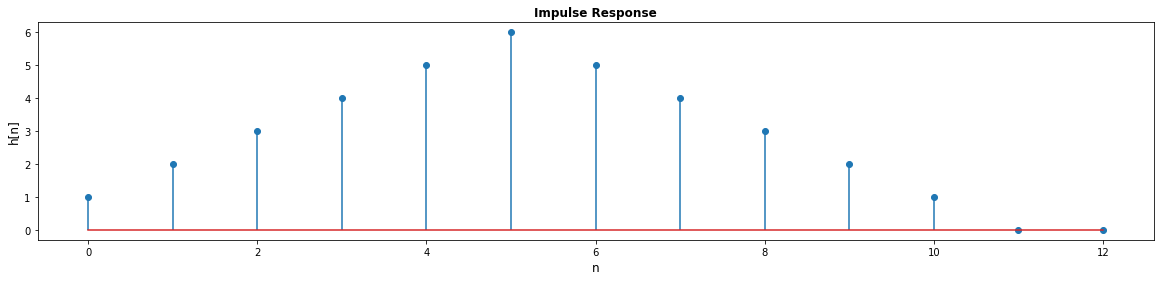

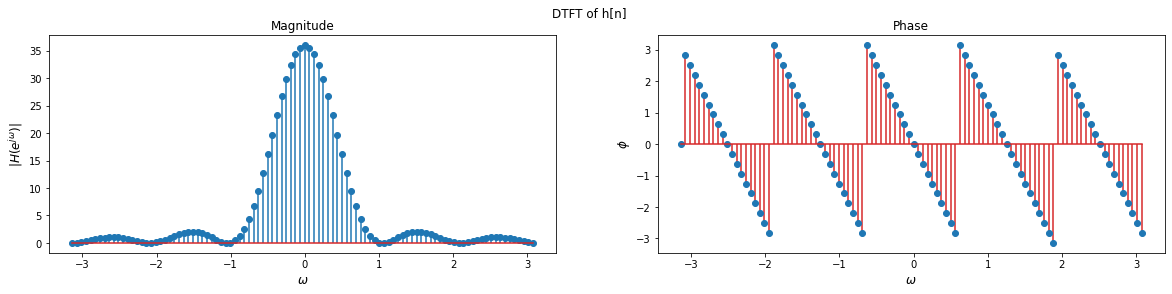

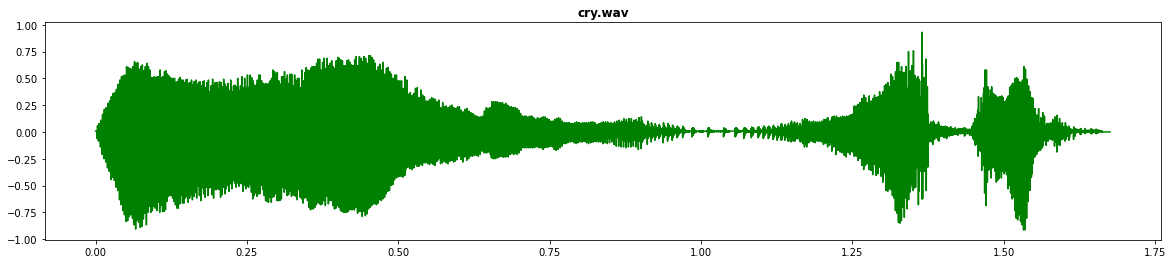

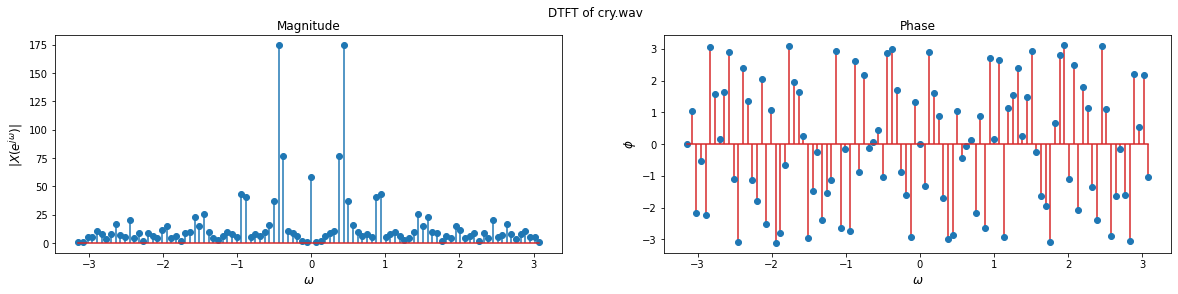

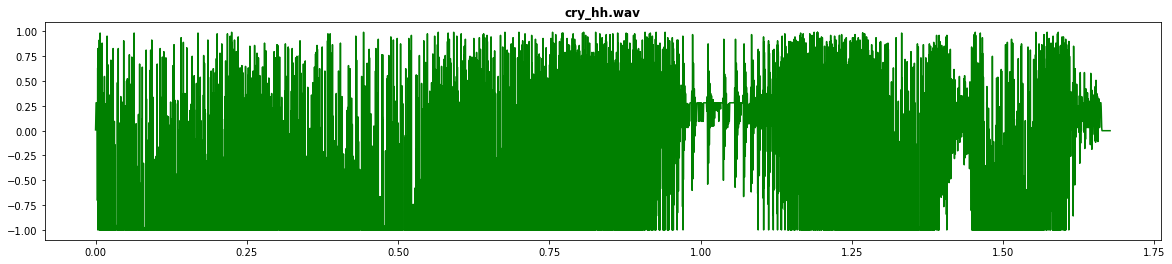

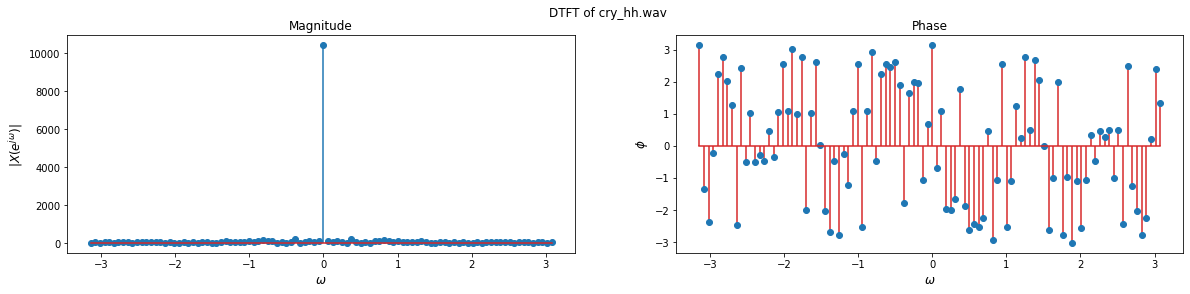

In [35]:
#hh = h[n] = n + 1; 0 ≤ n ≤ 5; h[n] = h[10 − n]; 5 < n ≤ 10; h[n] = 0; for all other n
impulse_plot(nh,hh)
#Operating on Cry File
file = 'cry.wav'
#Getting the convolved wave file
op = audio_convolve(file, hh, normalisation=True, o=file[:-4] + "_hh.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATIONS :-')
print('1 : We observe the high frequency component slightly amplified and some diminished but the lower frequencies are very hugely amplified comparitively.')
print('2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.')
print('3 : This can be heard with greater intensity of sound and has a completely different tone from original signal with much added noise.')

PermissionError: [Errno 13] Permission denied: 'alarm_hi1.wav'

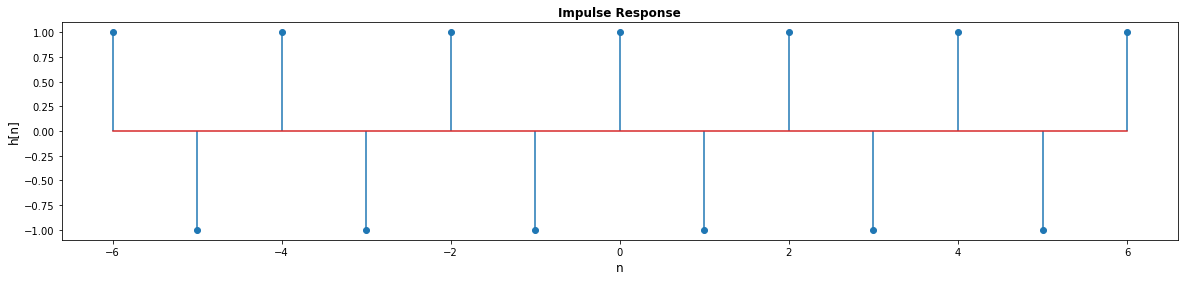

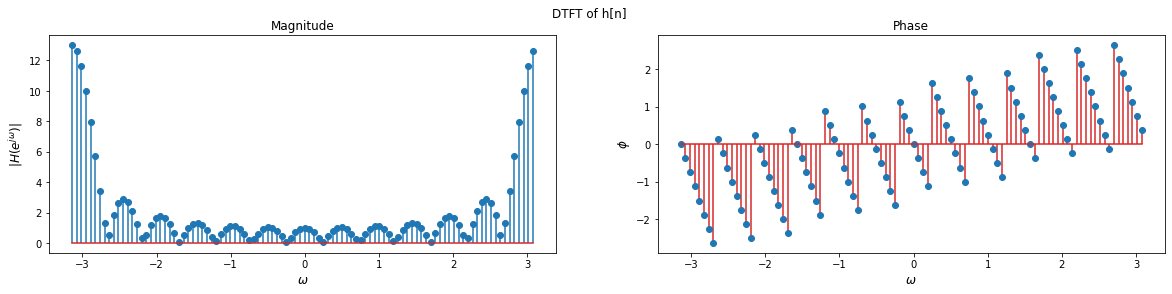

In [28]:
#hi = h[n] = cos(πn);
#N=6
impulse_plot(ni1,hi1)
#Operating on Alarm File
file = 'alarm.wav'
#Getting the convolved wave file
op = audio_convolve(file, hi1, normalisation=True, o=file[:-4] + "_hi1.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATION :-')
print('1 : We observe the low frequency component remain same but the higher frequencies are very much supressed.')
print('2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.')
print('3 : This can be heard with greater intensity of sound and has a completely different tone from original signal with much added noise.')

PermissionError: [Errno 13] Permission denied: 'cry_hi1.wav'

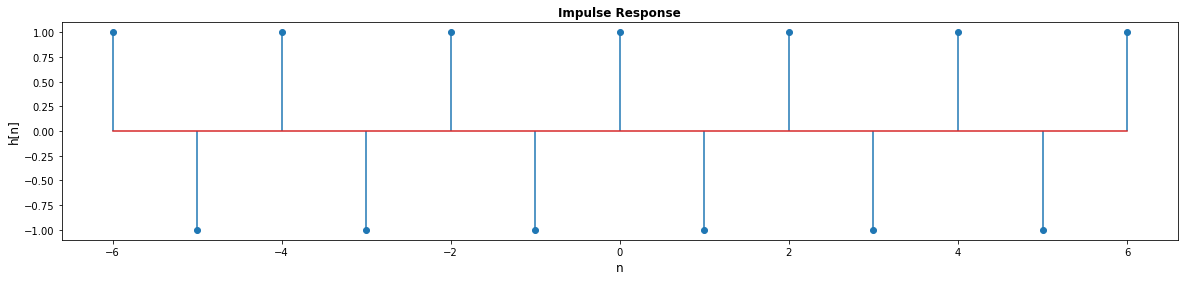

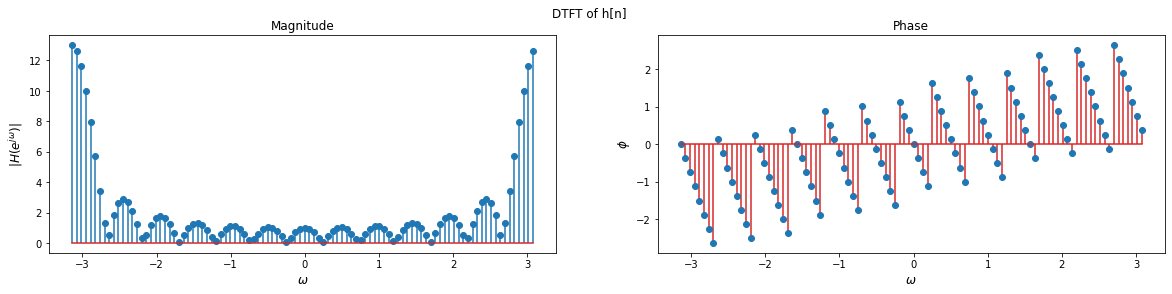

In [30]:
#hi = h[n] = cos(πn);
#N=6
impulse_plot(ni1,hi1)
#Operating on Cry File
file = 'cry.wav'
#Getting the convolved wave file
op = audio_convolve(file, hi1, normalisation=True, o=file[:-4] + "_hi1.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATION :-')
print('1 : We observe the high frequency component remain same but few lower frequencies are amplified.')
print('2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.')
print('3 : This can be heard with greater intensity of sound and has a feeble original tone.')

x[n]:  [-0.0078125 -0.0078125 -0.0078125 ... -0.0078125 -0.0078125 -0.0078125]
h[n]:  [ 1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.
  1. -1.  1. -1.  1. -1.  1.]
y[n] = x[n]*h[n]:  [-0.0078125  0.        -0.0078125 ... -0.0078125  0.        -0.0078125]
OBSERVATION :-
1 : We observe the low frequency component remain same but the higher frequencies are supressed.
2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.


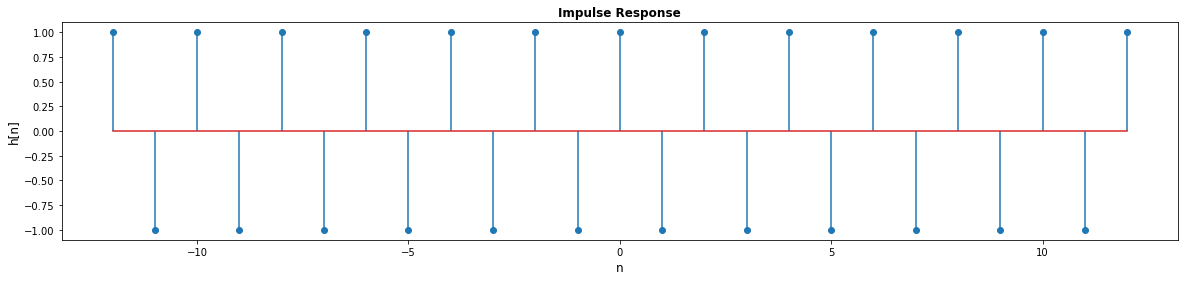

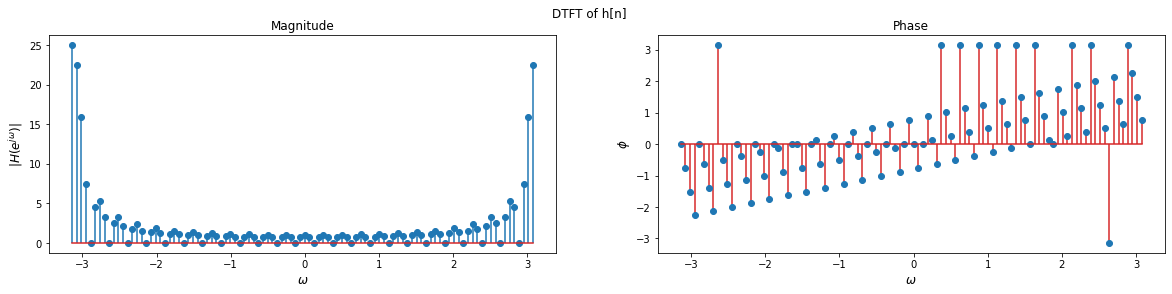

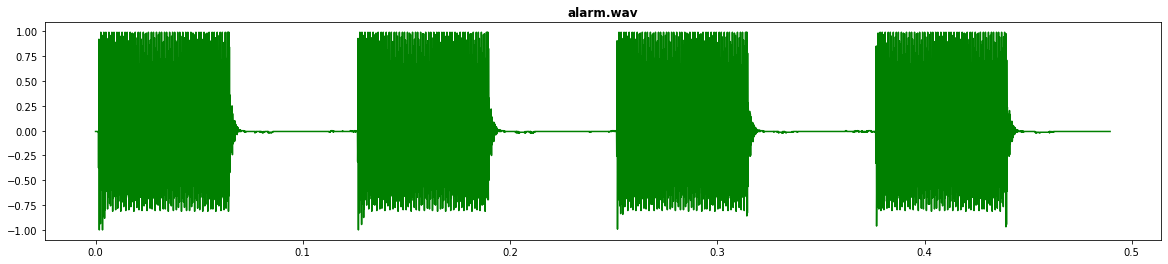

Exception ignored in: <function Wave_write.__del__ at 0x0000029E762C0CA0>
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python39\lib\wave.py", line 326, in __del__
    self.close()
  File "c:\users\asus\appdata\local\programs\python\python39\lib\wave.py", line 443, in close
    if self._file:
AttributeError: 'Wave_write' object has no attribute '_file'


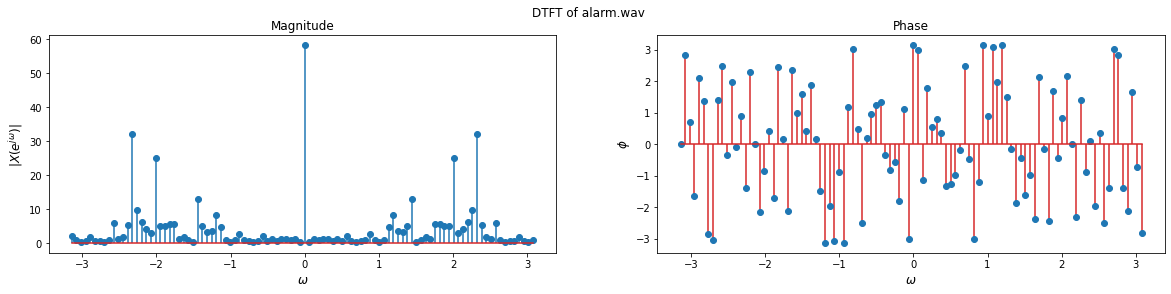

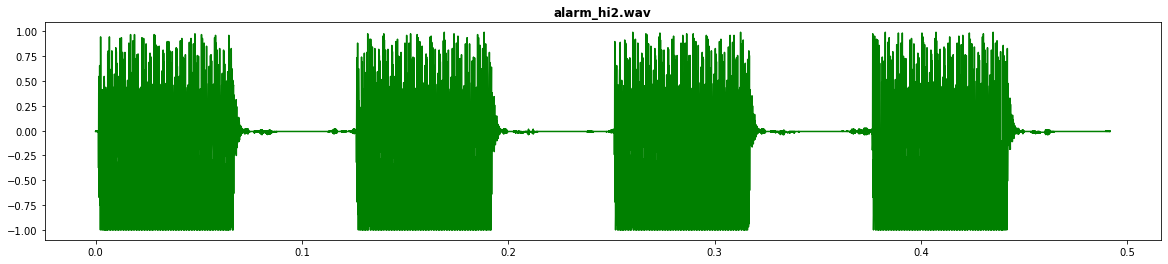

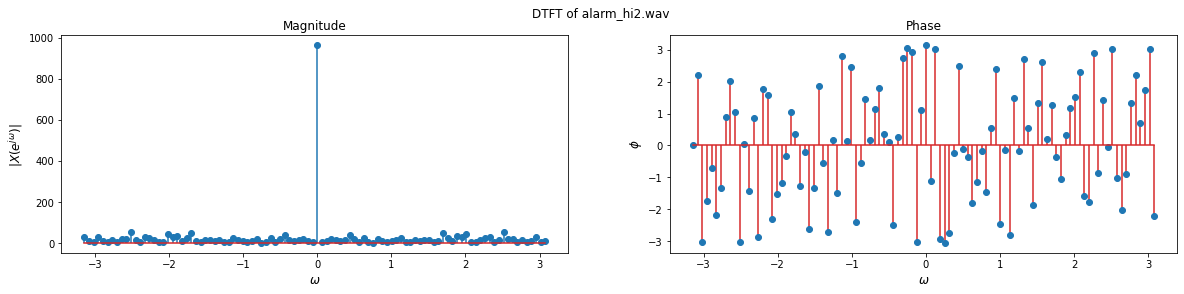

In [31]:
#N=12
impulse_plot(ni2,hi2)
#Operating on Alarm File
file = 'alarm.wav'
#Getting the convolved wave file
op = audio_convolve(file, hi2, normalisation=True, o=file[:-4] + "_hi2.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATION :-')
print('1 : We observe the low frequency component remain same but the higher frequencies are supressed.')
print('2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.')
print('3 : This can be heard with greater intensity of sound and has a completely different tone from original signal with much added noise.')

x[n]:  [0.0078125 0.0078125 0.0078125 ... 0.        0.        0.       ]
h[n]:  [ 1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.
  1. -1.  1. -1.  1. -1.  1.]
y[n] = x[n]*h[n]:  [0.0078125 0.        0.0078125 ... 0.        0.        0.       ]
OBSERVATION :-
1 : We observe the lower frequency components are amplified and the higher frequencies are lightly supressed.
2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.


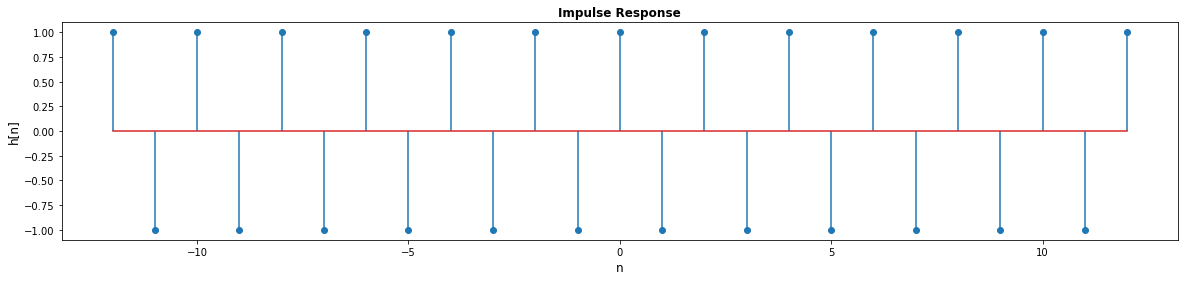

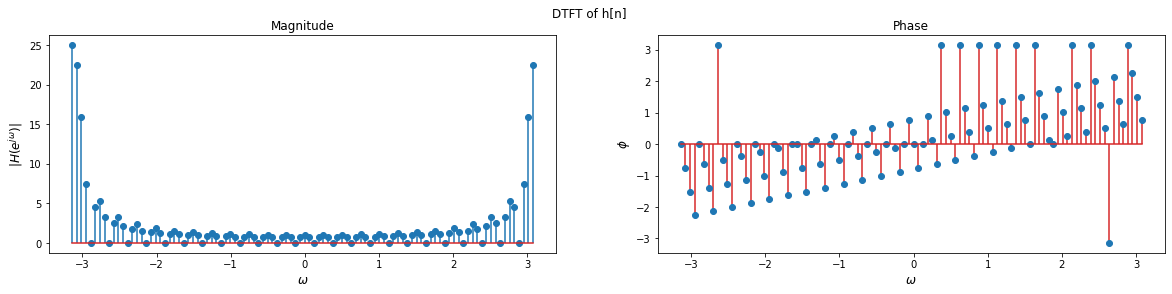

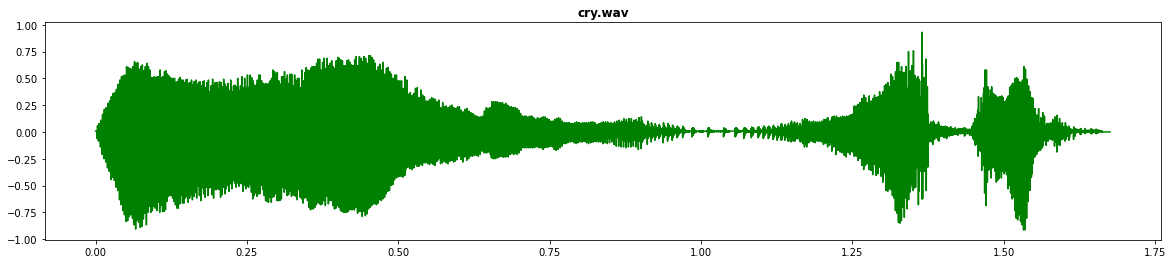

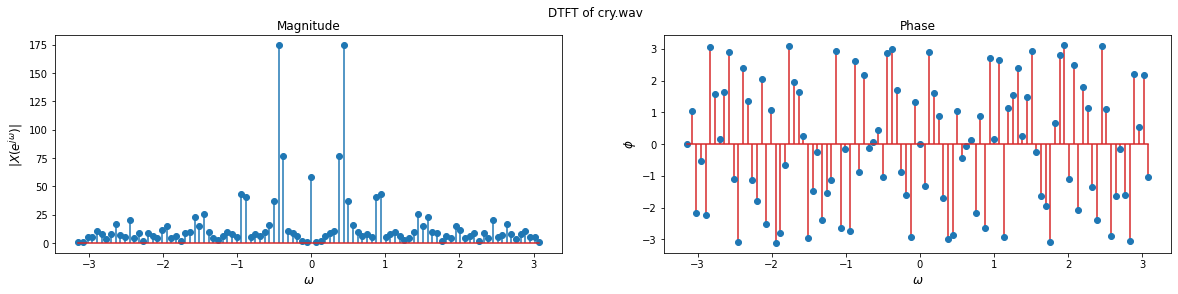

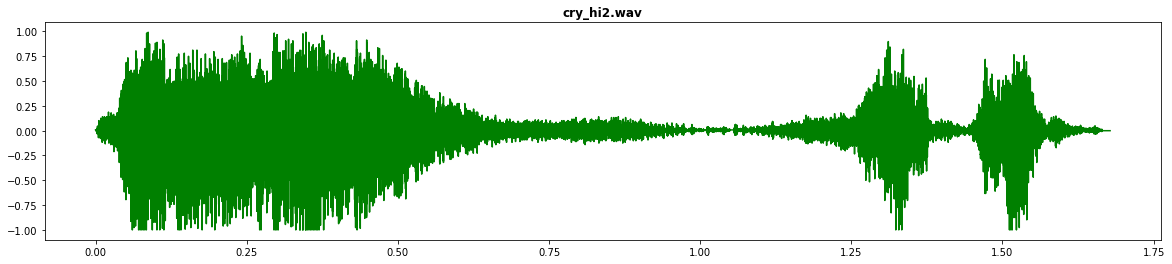

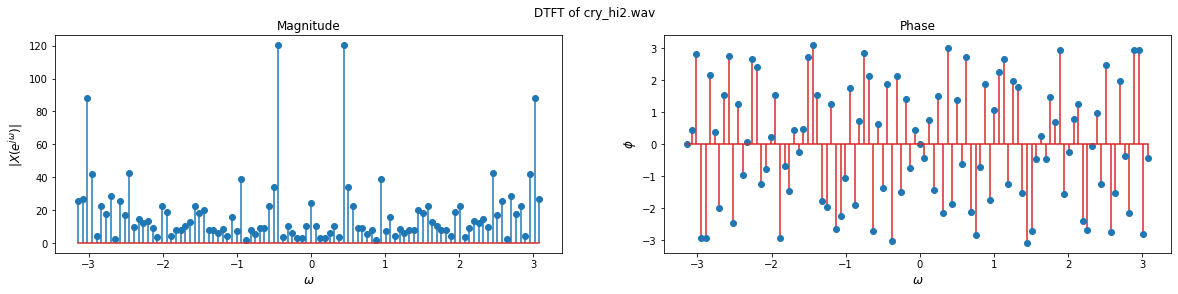

In [32]:
#N=12
impulse_plot(ni2,hi2)
#Operating on Cry File
file = 'cry.wav'
#Getting the convolved wave file
op = audio_convolve(file, hi2, normalisation=True, o=file[:-4] + "_hi2.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATION :-')
print('1 : We observe the lower frequency components are amplified and the higher frequencies are lightly supressed.')
print('2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.')
print('3 : This can be heard with reduced intensity of sound, much feeble from original signal .')

x[n]:  [-0.0078125 -0.0078125 -0.0078125 ... -0.0078125 -0.0078125 -0.0078125]
h[n]:  [ 1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.
  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.
  1.]
y[n] = x[n]*h[n]:  [-0.0078125  0.        -0.0078125 ... -0.0078125  0.        -0.0078125]
OBSERVATION :-
1 : We observe the low frequency component remain same but the higher frequencies are supressed.
2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.


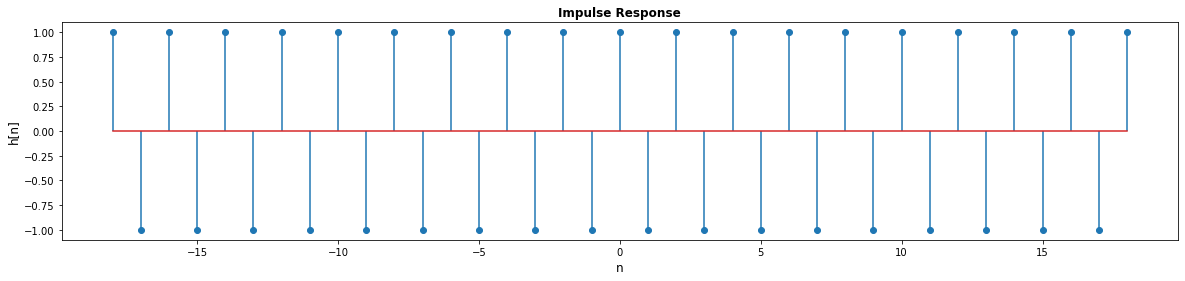

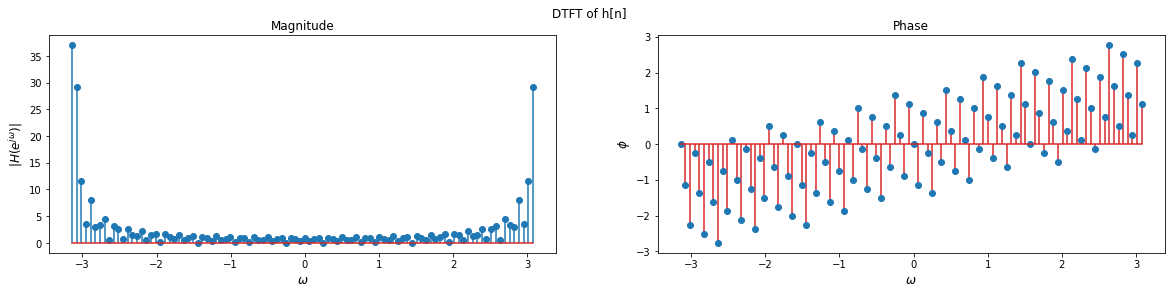

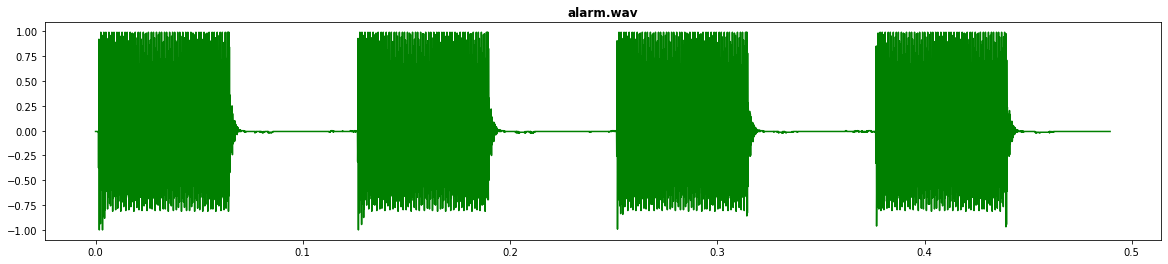

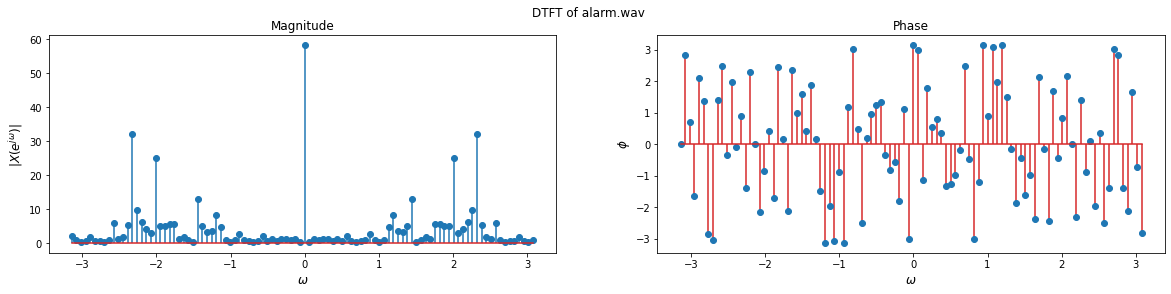

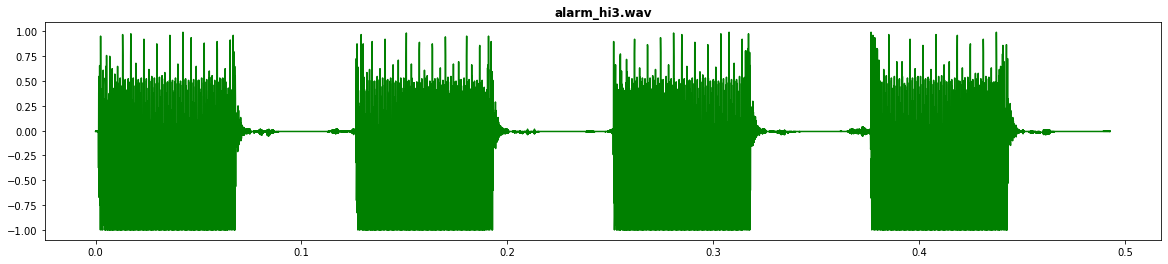

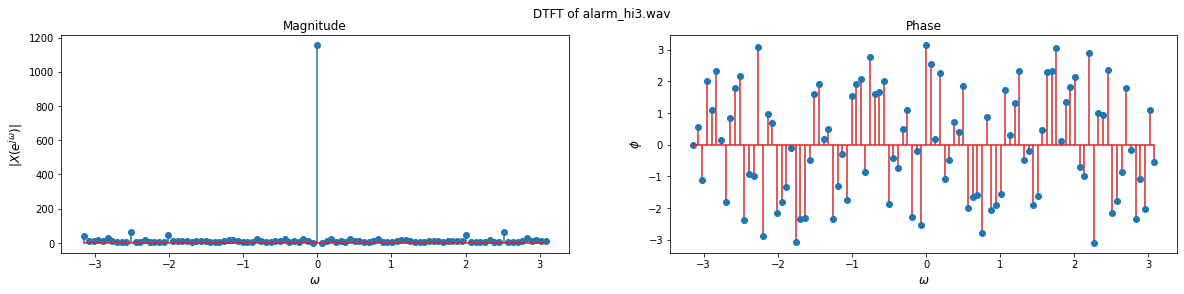

In [33]:
#N=18
impulse_plot(ni3,hi3)
#Operating on Alarm File
file = 'alarm.wav'
#Getting the convolved wave file
op = audio_convolve(file, hi3, normalisation=True, o=file[:-4] + "_hi3.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATION :-')
print('1 : We observe the low frequency component remain same but the higher frequencies are supressed.')
print('2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.')
print('3 : This can be heard with greater intensity of sound and has a completely different tone from original signal with much added noise.')

PermissionError: [Errno 13] Permission denied: 'cry_hi3.wav'

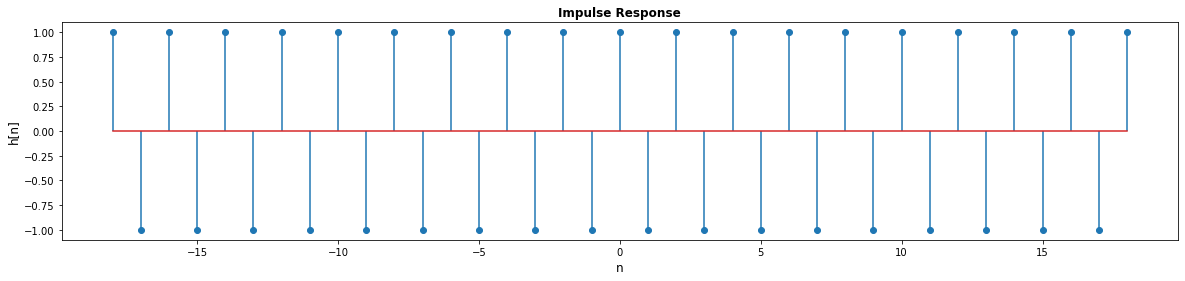

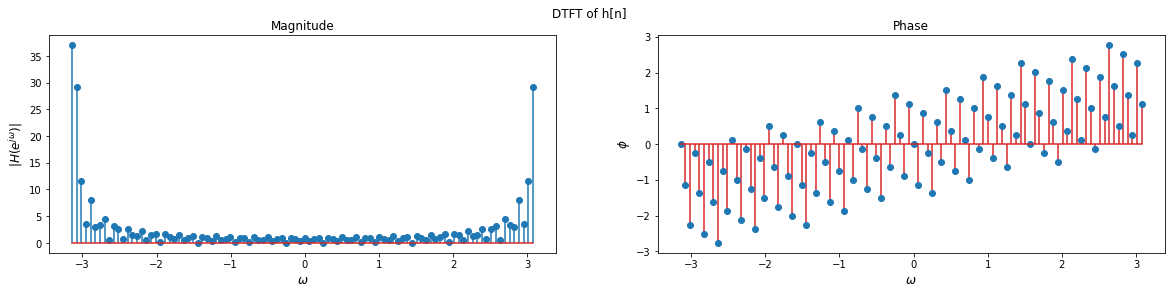

In [35]:
#N=18
impulse_plot(ni3,hi3)
#Operating on Cry File
file = 'cry.wav'
#Getting the convolved wave file
op = audio_convolve(file, hi3, normalisation=True, o=file[:-4] + "_hi3.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATION :-')
print('1 : We observe the lower frequency components are amplified and the higher frequencies are supressed.')
print('2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.')
print('3 : This can be heard with greater intensity of sound and has a completely different tone from original signal with much added noise.')

Exception ignored in: <function Wave_write.__del__ at 0x0000029E762C0CA0>
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python39\lib\wave.py", line 326, in __del__
    self.close()
  File "c:\users\asus\appdata\local\programs\python\python39\lib\wave.py", line 443, in close
    if self._file:
AttributeError: 'Wave_write' object has no attribute '_file'


PermissionError: [Errno 13] Permission denied: 'alarm_hj1.wav'

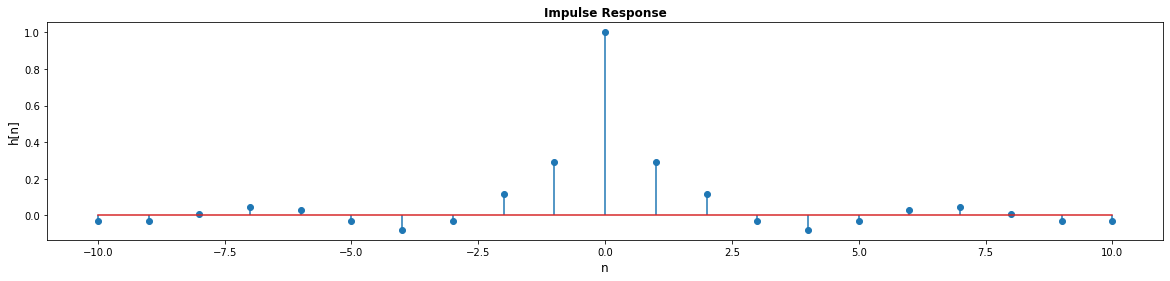

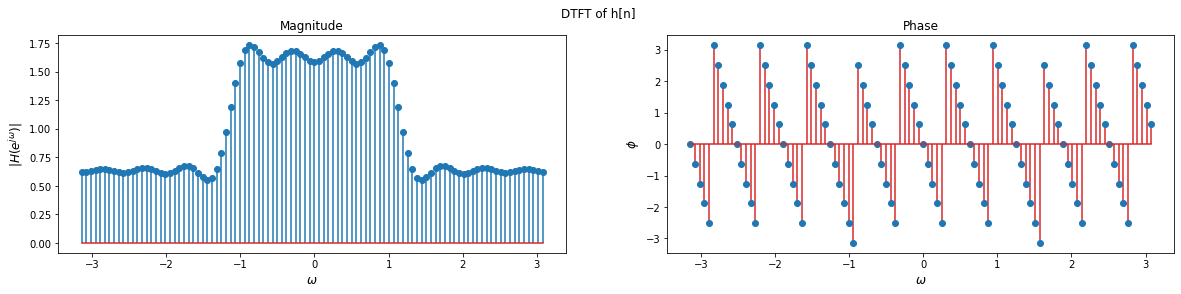

In [37]:
#h[n] = sin(ω0n)/πn ; −M ≤ n ≤ M. Ensure that h[0] = 1. Experiment with two different values each of ω0, M.
#w=20,M=10
impulse_plot(nj1,hj1)
#Operating on Alarm File
file = 'alarm.wav'
#Getting the convolved wave file
op = audio_convolve(file, hj1, normalisation=True, o=file[:-4] + "_hj1.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATION :-')
print('1 : We observe the low frequency component remain same but the higher frequencies are lightly supressed.')
print('2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.')
print('3 : This can be heard with almost same intensity of sound, much feeble from original signal .')

x[n]:  [0.0078125 0.0078125 0.0078125 ... 0.        0.        0.       ]
h[n]:  [-0.02779792 -0.02833498  0.00873065  0.04457428  0.03080238 -0.03223624
 -0.07909115 -0.03234141  0.11858844  0.2905995   1.          0.2905995
  0.11858844 -0.03234141 -0.07909115 -0.03223624  0.03080238  0.04457428
  0.00873065 -0.02833498 -0.02779792]
y[n] = x[n]*h[n]:  [-0.00021717 -0.00043854 -0.00037033 ...  0.          0.
  0.        ]
OBSERVATION :-
1 : We observe the high frequency component almost remain same but the lower frequencies are supressed.
2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.


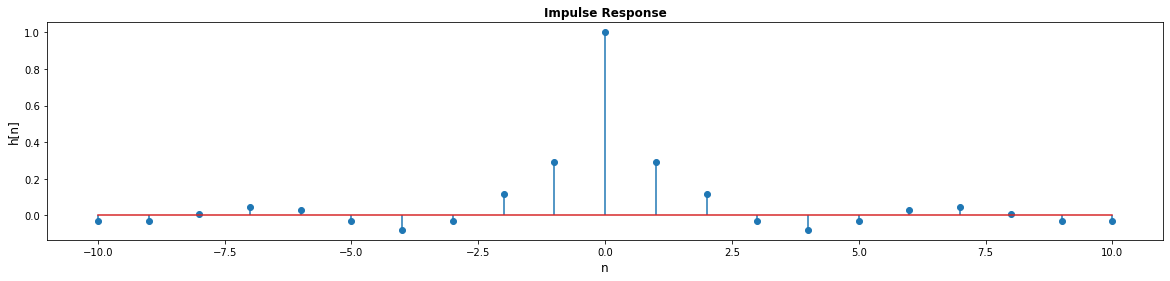

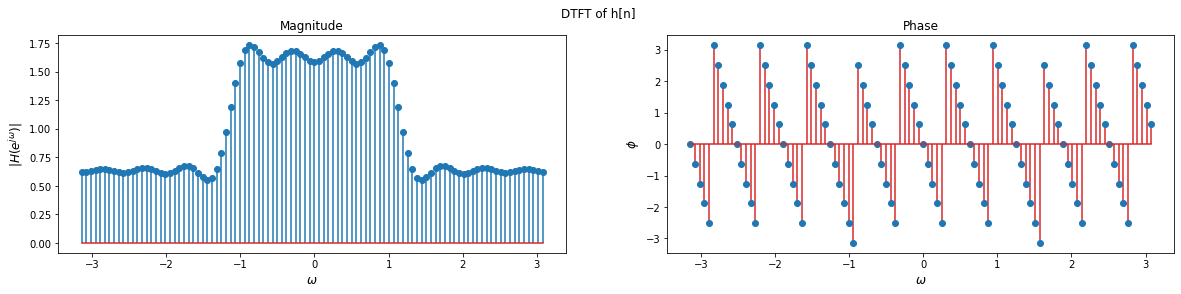

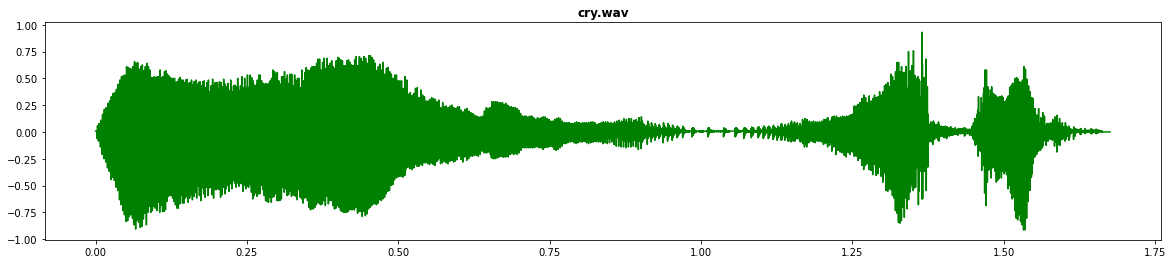

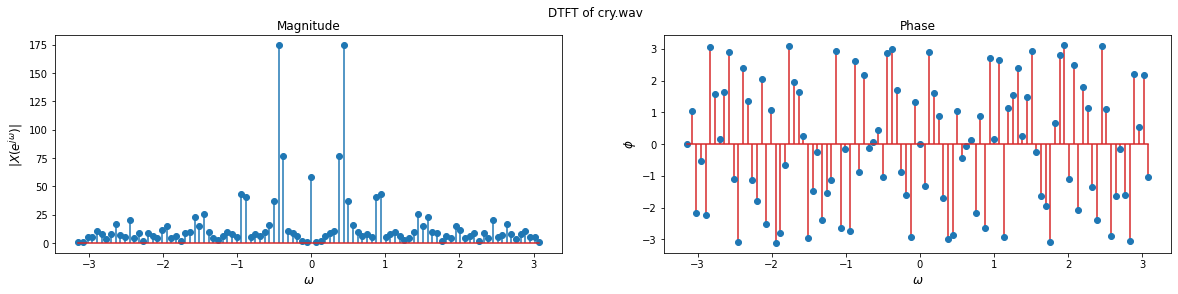

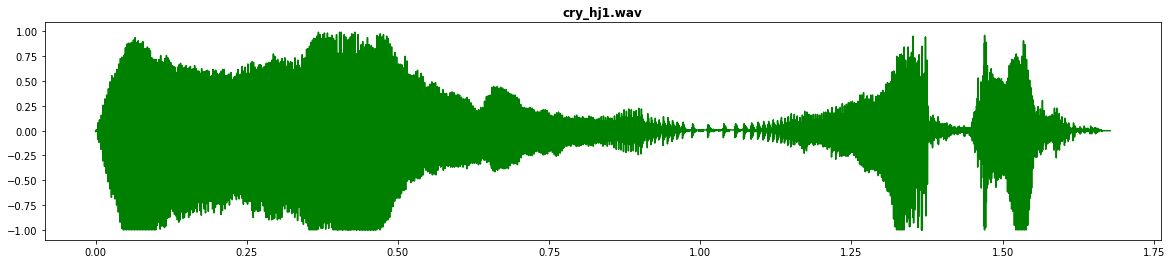

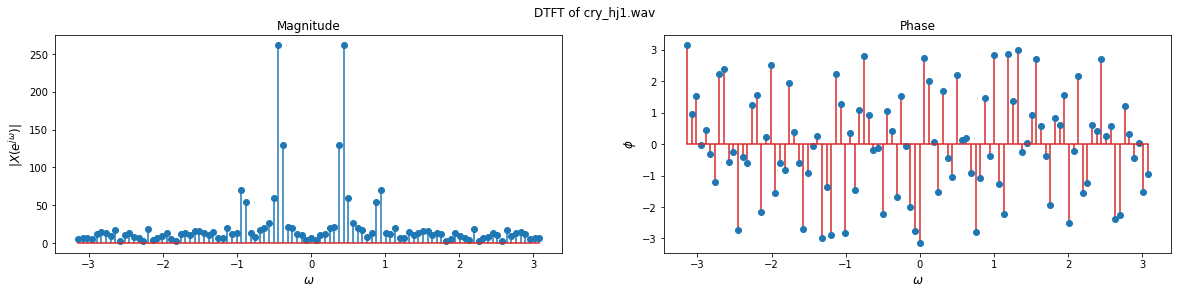

In [38]:
#h[n] = sin(ω0n)/πn ; −M ≤ n ≤ M. Ensure that h[0] = 1. Experiment with two different values each of ω0, M.

#w=20,M=10
impulse_plot(nj1,hj1)
#Operating on cry File
file = 'cry.wav'
#Getting the convolved wave file
op = audio_convolve(file, hj1, normalisation=True, o=file[:-4] + "_hj1.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATION :-')
print('1 : We observe the high frequency component almost remain same but the lower frequencies are supressed.')
print('2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.')
print('3 : This can be heard with almost same intensity of sound, much feeble from original signal and some added noise.')

x[n]:  [-0.0078125 -0.0078125 -0.0078125 ... -0.0078125 -0.0078125 -0.0078125]
h[n]:  [-0.00595586  0.00817018  0.01343188  0.002548   -0.01253249 -0.0135428
  0.00221681  0.01695735  0.01217649 -0.00851788 -0.02121548 -0.0088174
  0.01672938  0.02507871  0.00255802 -0.02779792 -0.02833498  0.00873065
  0.04457428  0.03080238 -0.03223624 -0.07909115 -0.03234141  0.11858844
  0.2905995   1.          0.2905995   0.11858844 -0.03234141 -0.07909115
 -0.03223624  0.03080238  0.04457428  0.00873065 -0.02833498 -0.02779792
  0.00255802  0.02507871  0.01672938 -0.0088174  -0.02121548 -0.00851788
  0.01217649  0.01695735  0.00221681 -0.0135428  -0.01253249  0.002548
  0.01343188  0.00817018 -0.00595586]
y[n] = x[n]*h[n]:  [ 4.65301219e-05 -1.72993735e-05 -1.22235952e-04 ... -1.22235952e-04
 -1.72993735e-05  4.65301219e-05]


Exception ignored in: <function Wave_write.__del__ at 0x0000029E762C0CA0>
Traceback (most recent call last):
  File "c:\users\asus\appdata\local\programs\python\python39\lib\wave.py", line 326, in __del__
    self.close()
  File "c:\users\asus\appdata\local\programs\python\python39\lib\wave.py", line 443, in close
    if self._file:
AttributeError: 'Wave_write' object has no attribute '_file'


OBSERVATION :-
1 : We observe the low frequency component remain same but the higher frequencies are lightly supressed.
2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.


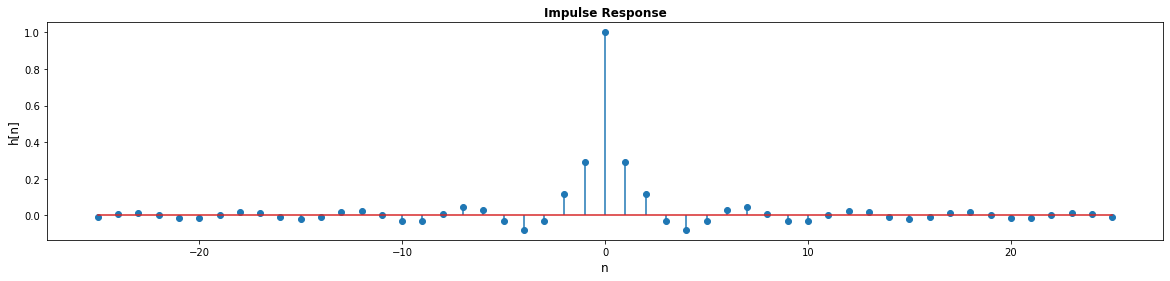

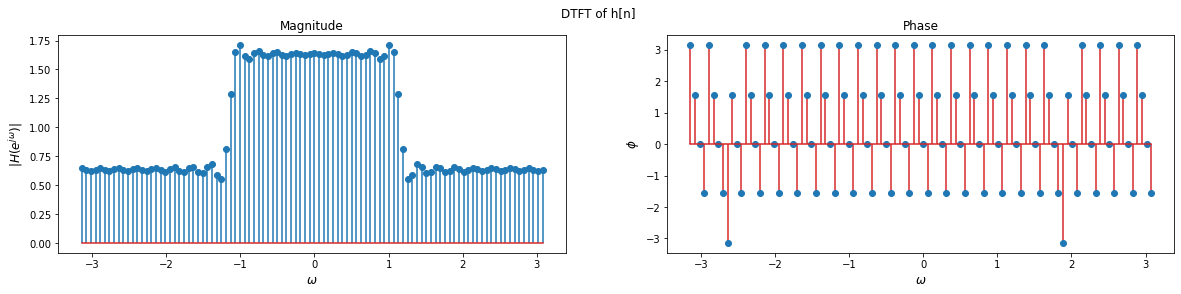

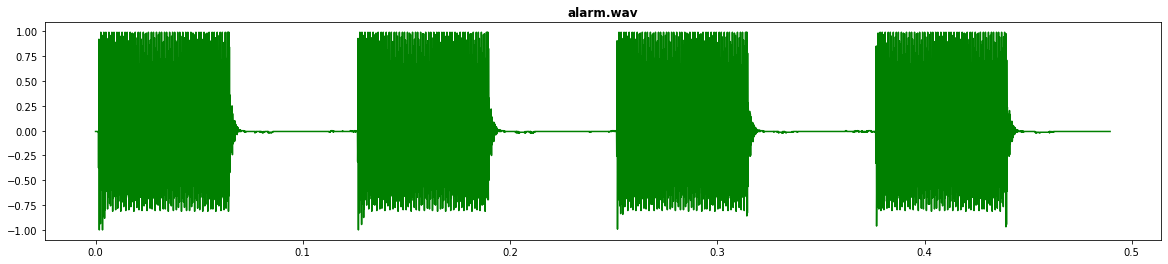

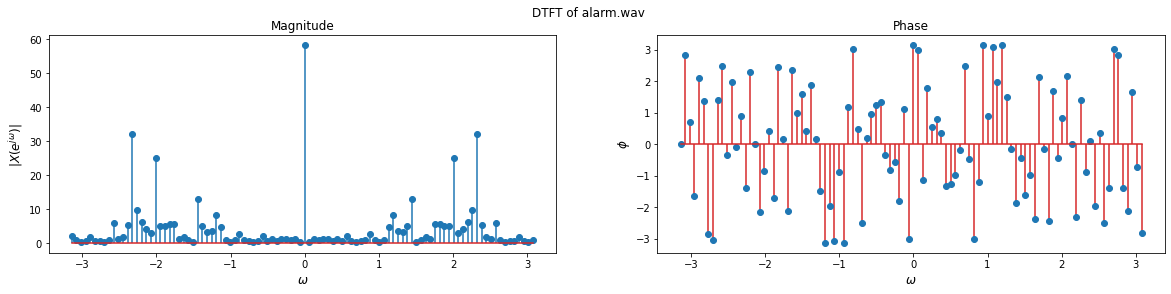

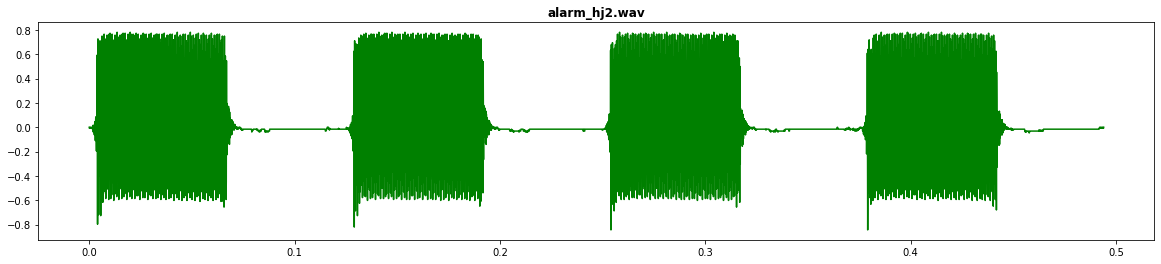

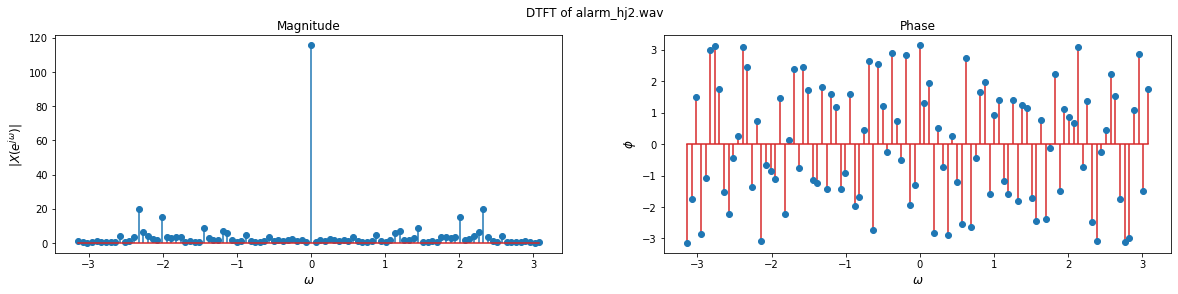

In [39]:
#w=20,M=25
impulse_plot(nj2,hj2)
#Operating on Alarm File
file = 'alarm.wav'
#Getting the convolved wave file
op = audio_convolve(file, hj2, normalisation=True, o=file[:-4] + "_hj2.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATION :-')
print('1 : We observe the low frequency component remain same but the higher frequencies are lightly supressed.')
print('2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.')
print('3 : This can be heard with almost same intensity of sound, much feeble from original signal .')

x[n]:  [0.0078125 0.0078125 0.0078125 ... 0.        0.        0.       ]
h[n]:  [-0.00595586  0.00817018  0.01343188  0.002548   -0.01253249 -0.0135428
  0.00221681  0.01695735  0.01217649 -0.00851788 -0.02121548 -0.0088174
  0.01672938  0.02507871  0.00255802 -0.02779792 -0.02833498  0.00873065
  0.04457428  0.03080238 -0.03223624 -0.07909115 -0.03234141  0.11858844
  0.2905995   1.          0.2905995   0.11858844 -0.03234141 -0.07909115
 -0.03223624  0.03080238  0.04457428  0.00873065 -0.02833498 -0.02779792
  0.00255802  0.02507871  0.01672938 -0.0088174  -0.02121548 -0.00851788
  0.01217649  0.01695735  0.00221681 -0.0135428  -0.01253249  0.002548
  0.01343188  0.00817018 -0.00595586]
y[n] = x[n]*h[n]:  [-4.65301219e-05  1.72993735e-05  1.22235952e-04 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
OBSERVATION :-
1 : We observe the low frequency component remain same but the higher frequencies are amplified.
2 : The phase is also altered, the phase values are modified by the 

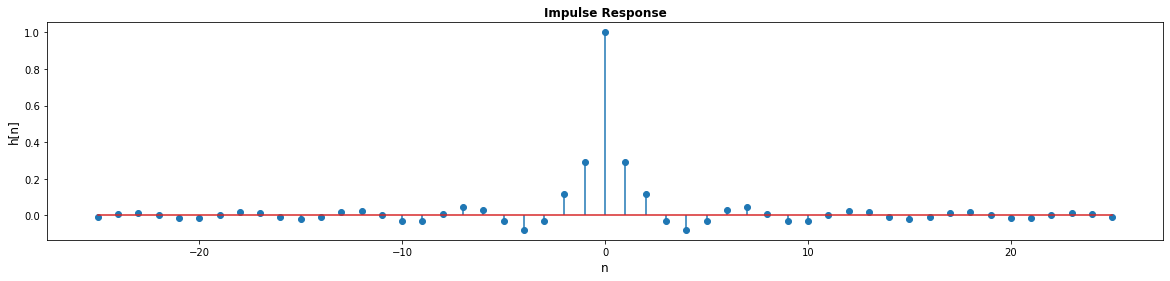

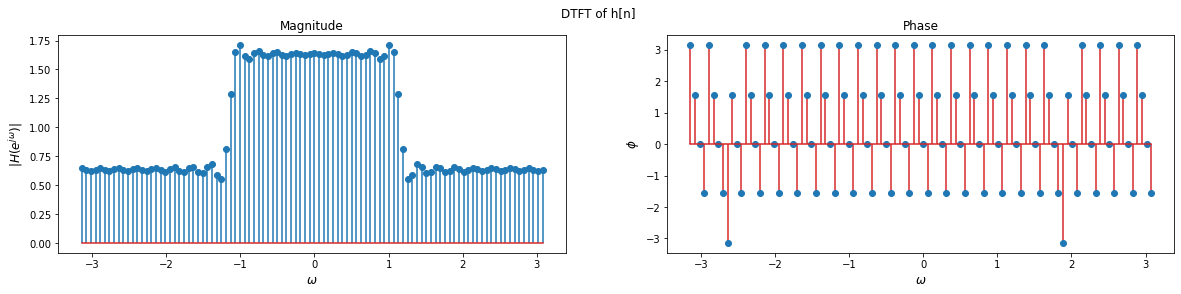

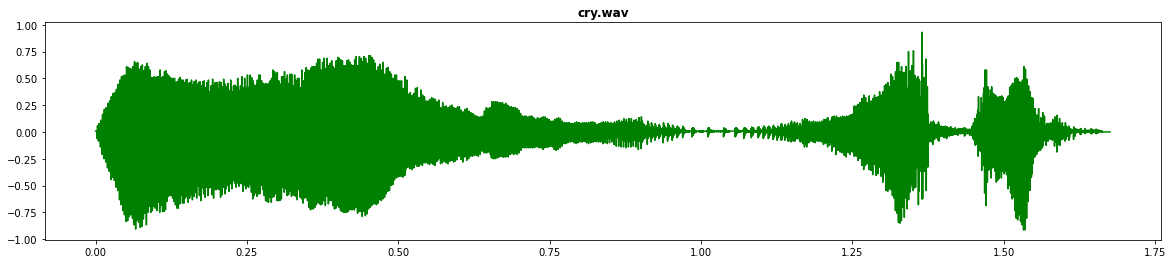

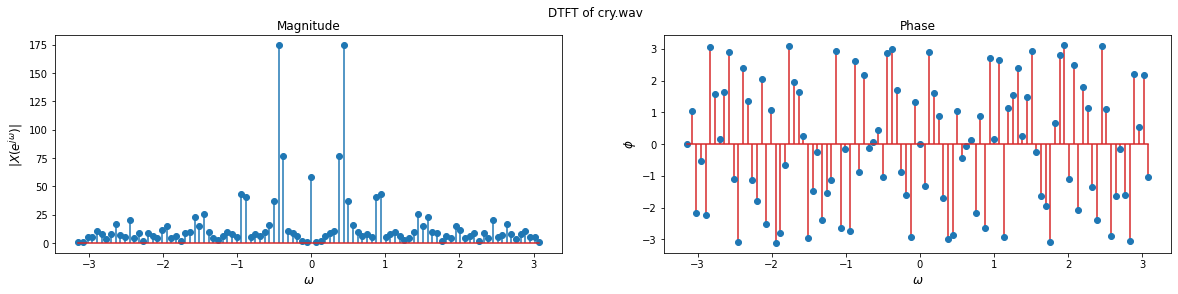

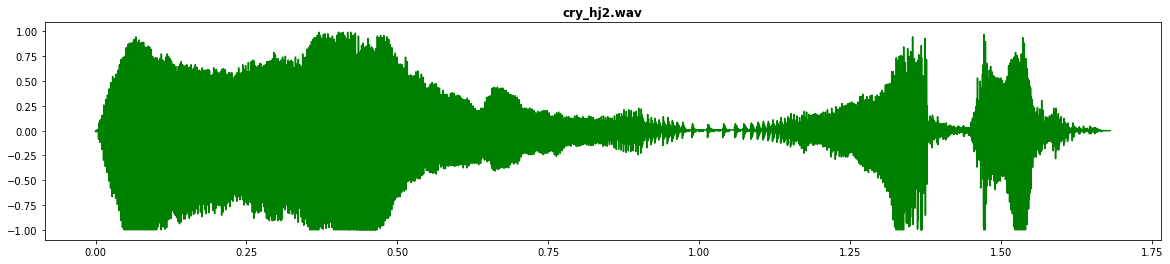

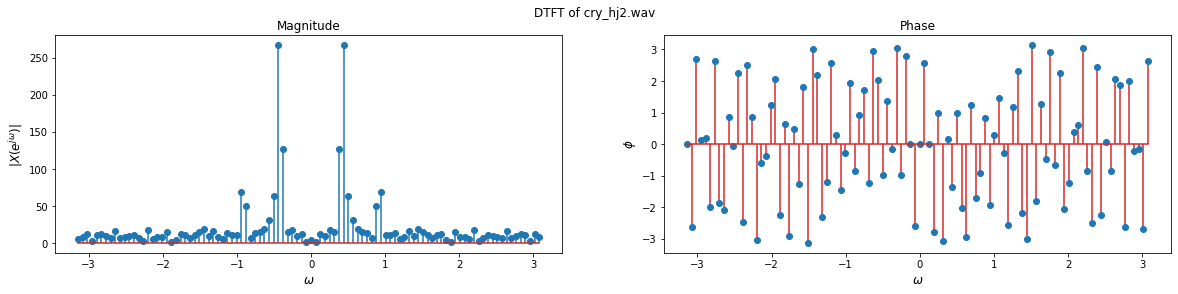

In [40]:
#w=20,M=25
impulse_plot(nj2,hj2)
#Operating on Cry File
file = 'cry.wav'
#Getting the convolved wave file
op = audio_convolve(file, hj2, normalisation=True, o=file[:-4] + "_hj2.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATION :-')
print('1 : We observe the low frequency component remain same but the higher frequencies are amplified.')
print('2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.')
print('3 : This can be heard with almost same intensity of sound, much feeble from original signal and some added noise .')

x[n]:  [-0.0078125 -0.0078125 -0.0078125 ... -0.0078125 -0.0078125 -0.0078125]
h[n]:  [-0.01488964 -0.02416622 -0.03385701 -0.0436054  -0.05303869 -0.06178573
 -0.06949479 -0.07585074 -0.08059059 -0.08351651  1.         -0.08351651
 -0.08059059 -0.07585074 -0.06949479 -0.06178573 -0.05303869 -0.0436054
 -0.03385701 -0.02416622 -0.01488964]
y[n] = x[n]*h[n]:  [0.00011633 0.00030512 0.00056963 ... 0.00056963 0.00030512 0.00011633]
OBSERVATION :-
1 : We observe the low frequency component remain same but the higher frequencies are amplified.
2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.


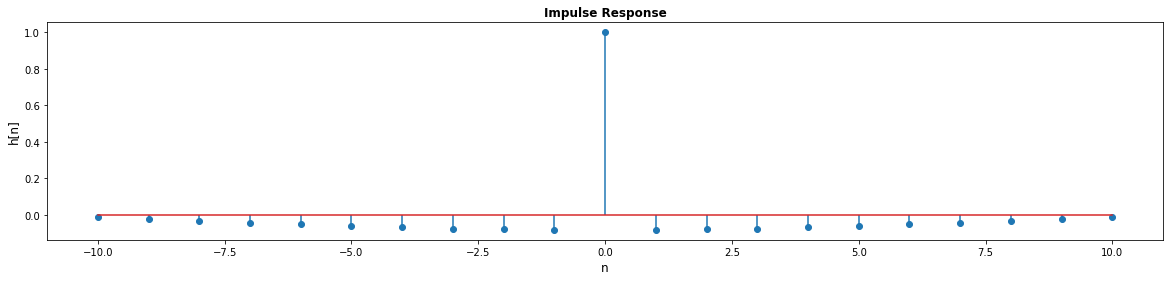

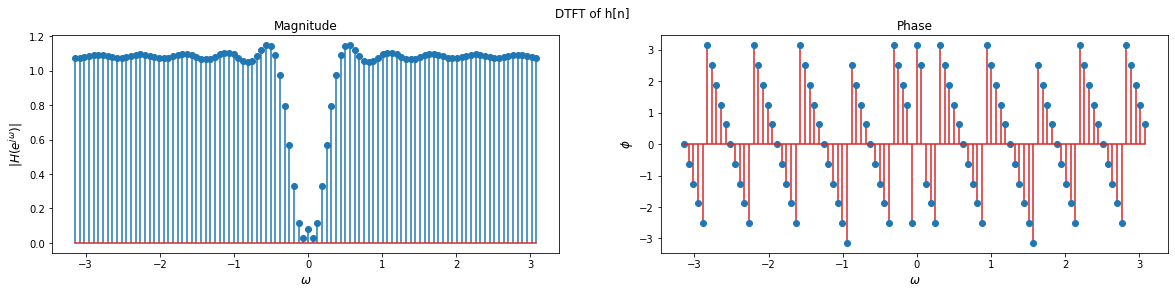

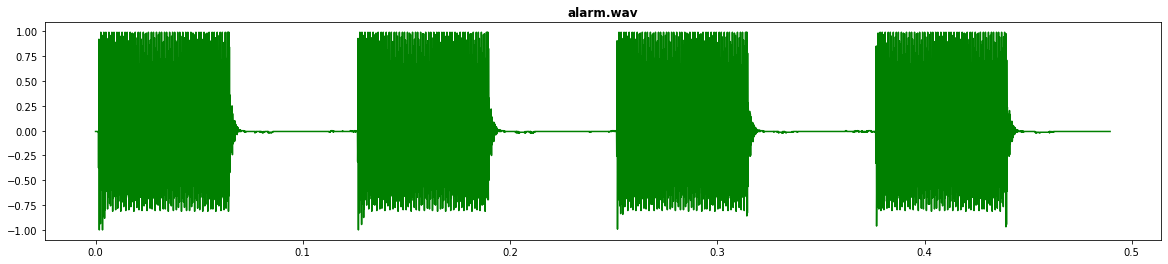

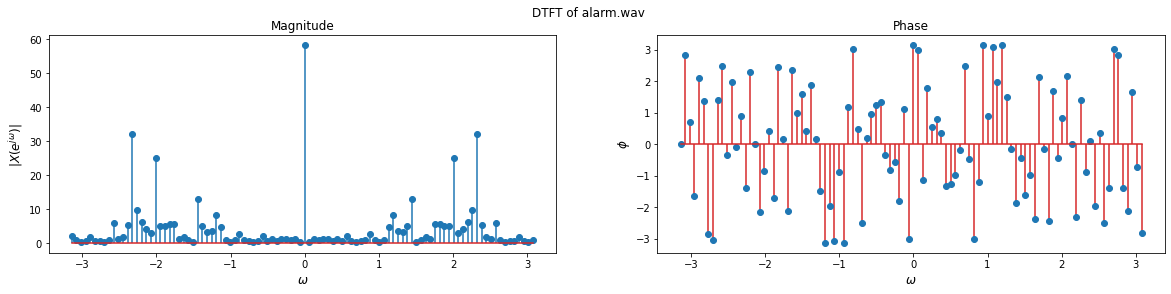

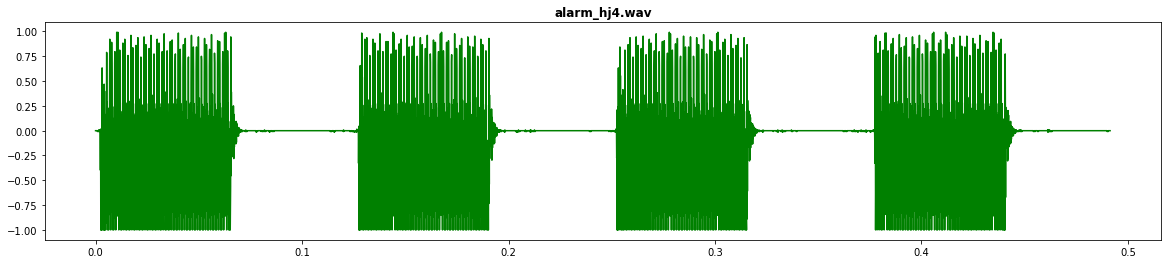

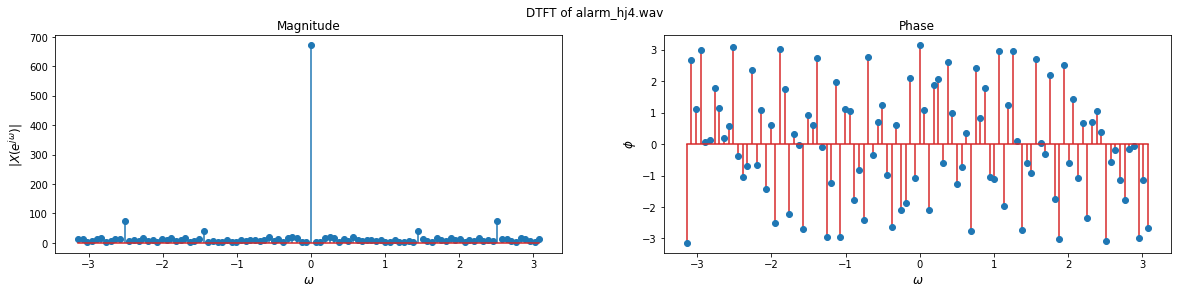

In [41]:
#w=50,M=10
impulse_plot(nj4,hj4)
#Operating on Alarm File
file = 'alarm.wav'
#Getting the convolved wave file
op = audio_convolve(file, hj4, normalisation=True, o=file[:-4] + "_hj4.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATION :-')
print('1 : We observe the low frequency component remain same but the higher frequencies are amplified.')
print('2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.')
print('3 : This can be heard with greater intensity of sound and has a completely different tone from original signal .')

x[n]:  [0.0078125 0.0078125 0.0078125 ... 0.        0.        0.       ]
h[n]:  [-0.01488964 -0.02416622 -0.03385701 -0.0436054  -0.05303869 -0.06178573
 -0.06949479 -0.07585074 -0.08059059 -0.08351651  1.         -0.08351651
 -0.08059059 -0.07585074 -0.06949479 -0.06178573 -0.05303869 -0.0436054
 -0.03385701 -0.02416622 -0.01488964]
y[n] = x[n]*h[n]:  [-0.00011633 -0.00030512 -0.00056963 ...  0.          0.
  0.        ]
OBSERVATION :-
1 : We observe that both low frequency components and high frequency componentents are almost remain same.
2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.


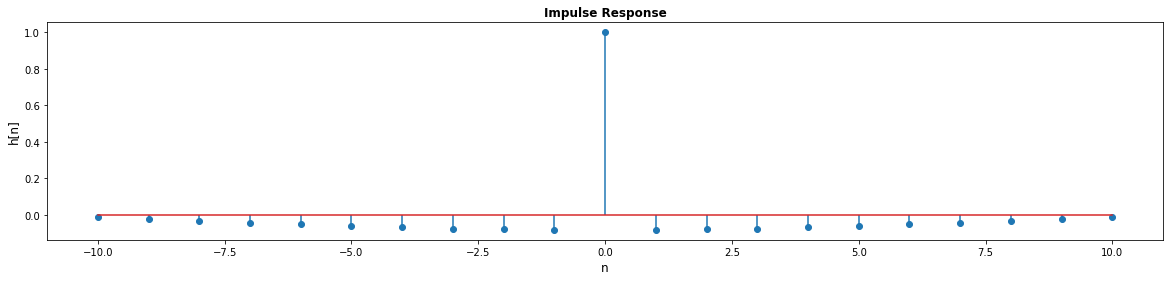

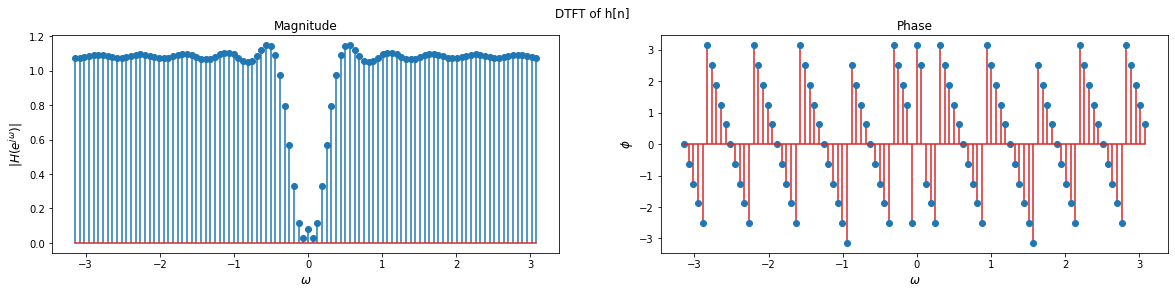

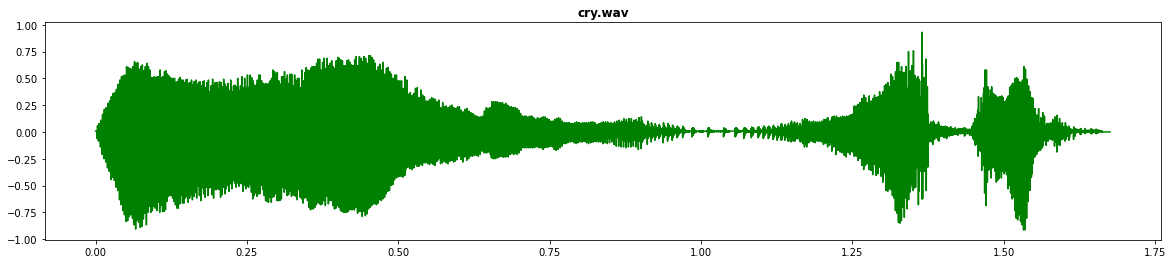

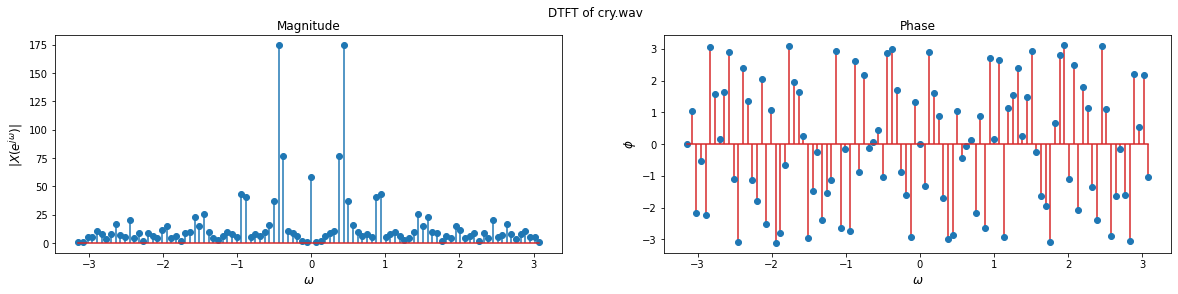

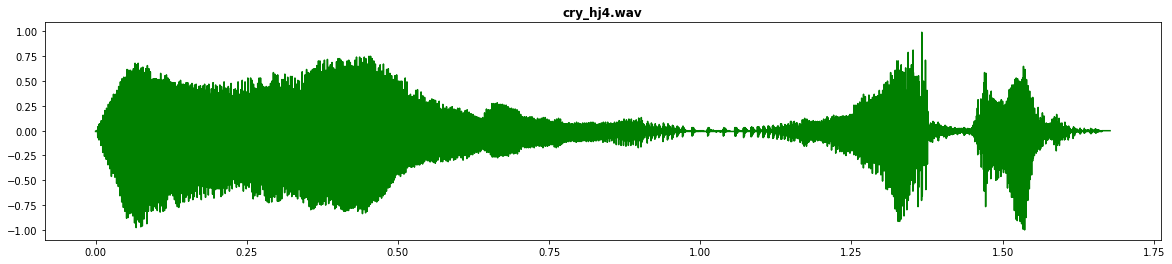

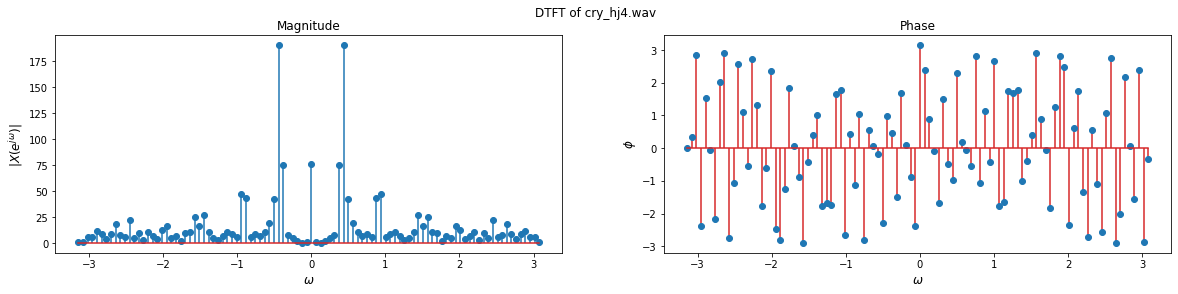

In [42]:
#w=50,M=10
impulse_plot(nj4,hj4)
#Operating on Cry File
file = 'cry.wav'
#Getting the convolved wave file
op = audio_convolve(file, hj4, normalisation=True, o=file[:-4] + "_hj4.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATION :-')
print('1 : We observe that both low frequency components and high frequency componentents are almost remain same.')
print('2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.')
print('3 : This can be heard with almost same intensity of sound, much feeble from original signal .')

x[n]:  [-0.0078125 -0.0078125 -0.0078125 ... -0.0078125 -0.0078125 -0.0078125]
h[n]:  [-0.00441224 -0.00117083  0.00243804  0.0061964   0.00985785  0.0131602
  0.01583952  0.01764504  0.01835389  0.01778496  0.01581094  0.01236794
  0.007462    0.00117198 -0.00635127 -0.01488964 -0.02416622 -0.03385701
 -0.0436054  -0.05303869 -0.06178573 -0.06949479 -0.07585074 -0.08059059
 -0.08351651  1.         -0.08351651 -0.08059059 -0.07585074 -0.06949479
 -0.06178573 -0.05303869 -0.0436054  -0.03385701 -0.02416622 -0.01488964
 -0.00635127  0.00117198  0.007462    0.01236794  0.01581094  0.01778496
  0.01835389  0.01764504  0.01583952  0.0131602   0.00985785  0.0061964
  0.00243804 -0.00117083 -0.00441224]
y[n] = x[n]*h[n]:  [3.44706084e-05 4.36177285e-05 2.45705321e-05 ... 2.45705321e-05
 4.36177285e-05 3.44706084e-05]
OBSERVATION :-
1 : We observe the low frequency components are lightly amplified and the higher frequencies are supressed.
2 : The phase is also altered, the phase values are mod

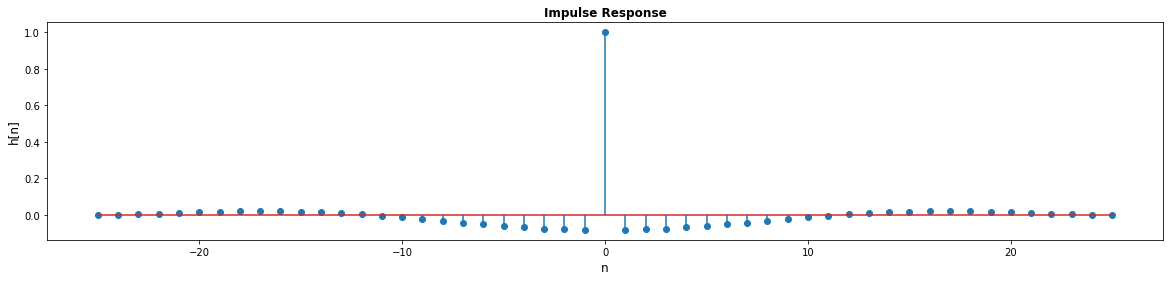

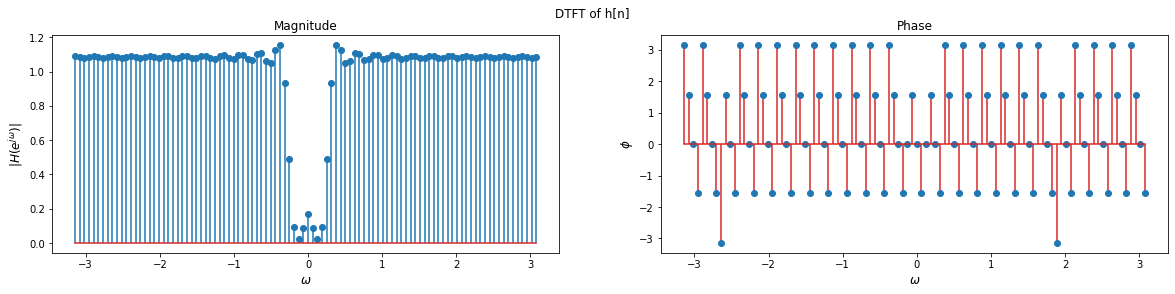

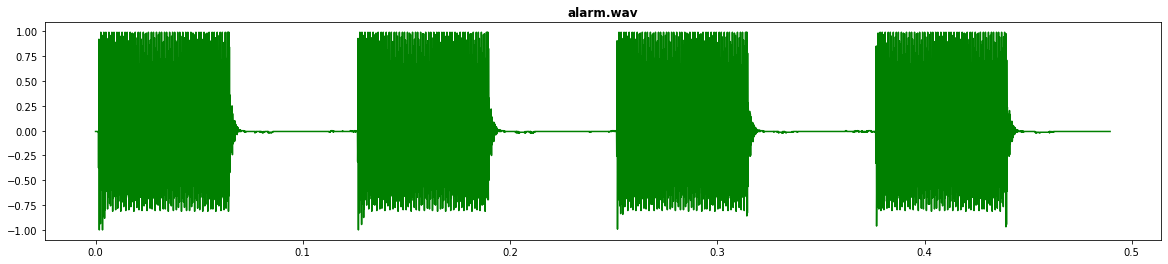

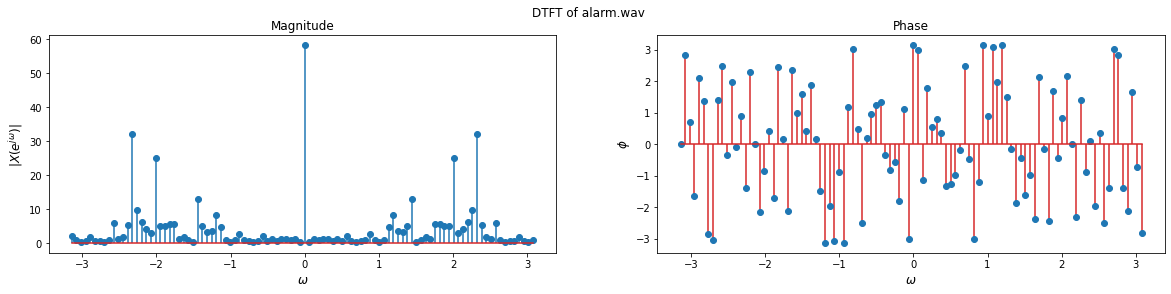

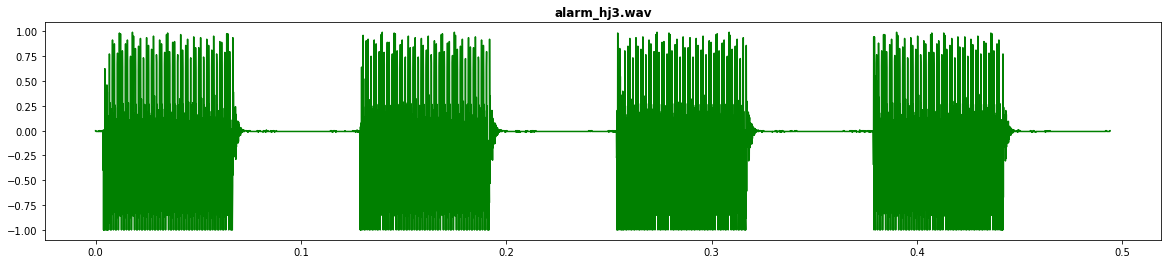

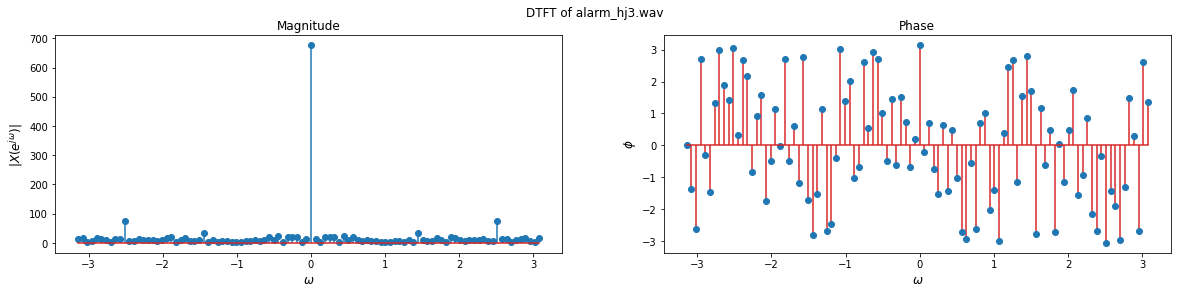

In [43]:
#w=50,M=25
impulse_plot(nj3,hj3)
#Operating on Alarm File
file = 'alarm.wav'
#Getting the convolved wave file
op = audio_convolve(file, hj3, normalisation=True, o=file[:-4] + "_hj3.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATION :-')
print('1 : We observe the low frequency components are lightly amplified and the higher frequencies are supressed.')
print('2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.')
print('3 : This can be heard with greater intensity of sound and has a completely different tone from original signal with some buzz.')

x[n]:  [0.0078125 0.0078125 0.0078125 ... 0.        0.        0.       ]
h[n]:  [-0.00441224 -0.00117083  0.00243804  0.0061964   0.00985785  0.0131602
  0.01583952  0.01764504  0.01835389  0.01778496  0.01581094  0.01236794
  0.007462    0.00117198 -0.00635127 -0.01488964 -0.02416622 -0.03385701
 -0.0436054  -0.05303869 -0.06178573 -0.06949479 -0.07585074 -0.08059059
 -0.08351651  1.         -0.08351651 -0.08059059 -0.07585074 -0.06949479
 -0.06178573 -0.05303869 -0.0436054  -0.03385701 -0.02416622 -0.01488964
 -0.00635127  0.00117198  0.007462    0.01236794  0.01581094  0.01778496
  0.01835389  0.01764504  0.01583952  0.0131602   0.00985785  0.0061964
  0.00243804 -0.00117083 -0.00441224]
y[n] = x[n]*h[n]:  [-3.44706084e-05 -4.36177285e-05 -2.45705321e-05 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
OBSERVATION :-
1 : We observe that both lower and higher frequencies are almost remains same.
2 : The phase is also altered, the phase values are modified by the impulse response

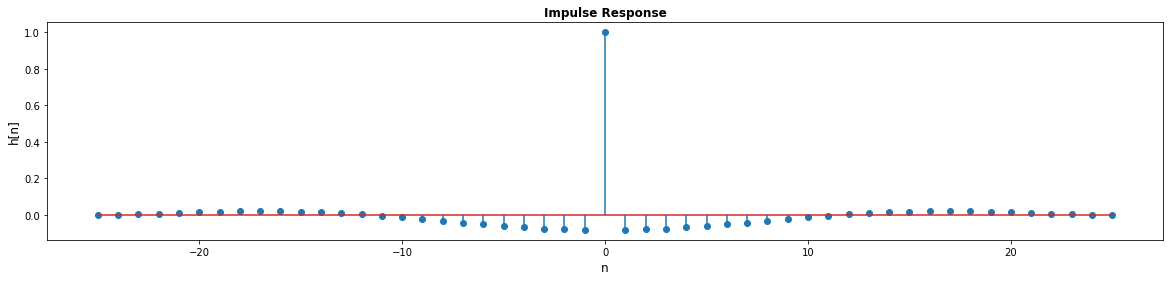

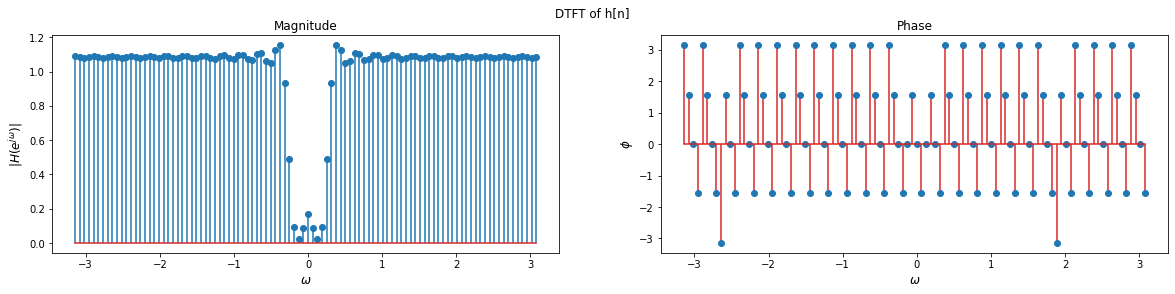

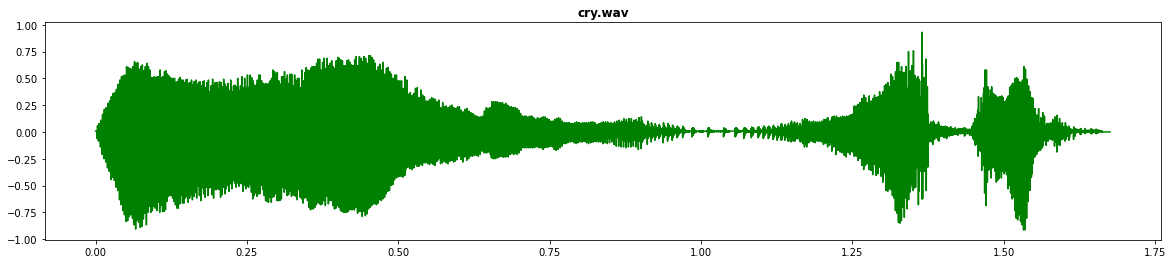

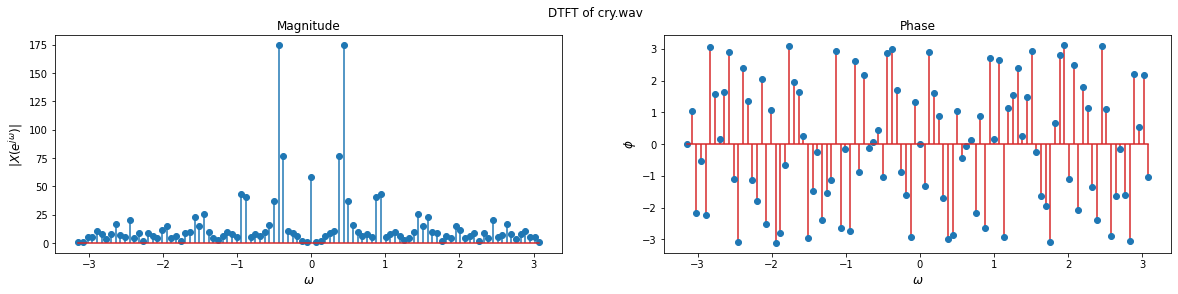

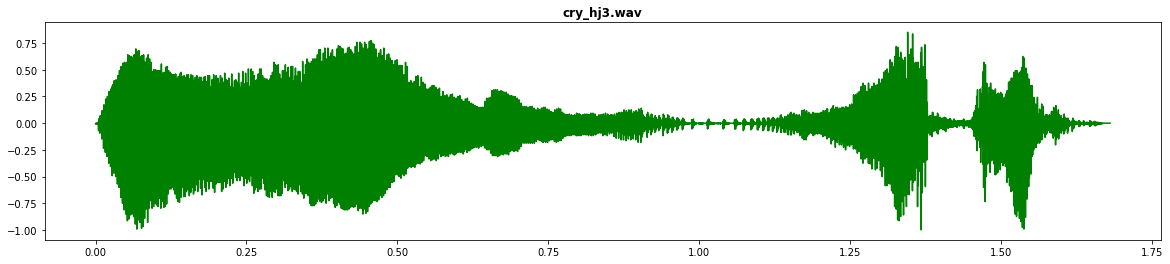

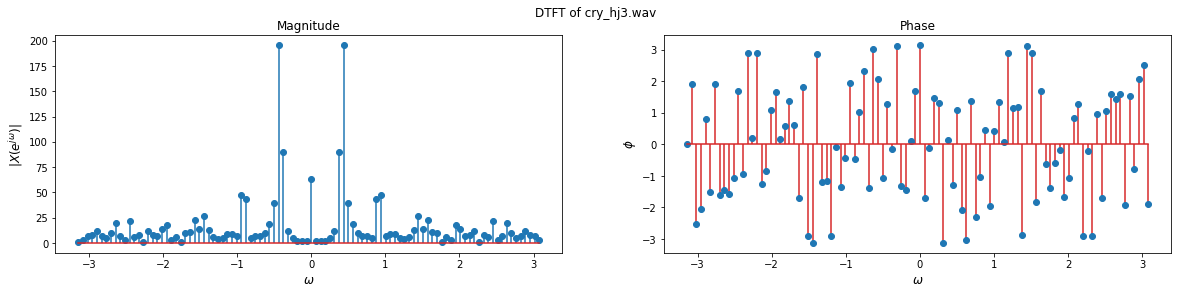

In [44]:
#w=50,M=25
impulse_plot(nj3,hj3)
#Operating on Cry File
file = 'cry.wav'
#Getting the convolved wave file
op = audio_convolve(file, hj3, normalisation=True, o=file[:-4] + "_hj3.wav")
#Original wave file
play(file)#Playing the original wave file
analyise_wav_file(file, normalise=True)#Analysing the wavefile
#Operated wave file
play(op)#Playing the convolved wave file
analyise_wav_file(op, normalise=True)#Analysing the wavefile
print('OBSERVATION :-')
print('1 : We observe that both lower and higher frequencies are almost remains same.')
print('2 : The phase is also altered, the phase values are modified by the impulse response phase spectra.')
print('3 : This can be heard with almost same intensity of sound, much feeble from original signal .')